# initializing notebook

In [40]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [42]:
sns.set_theme(style="whitegrid")

In [43]:
step_length = 1.0                # meters per grid‐move/step
base_speed = 1.5                 # m/s
time_per_step = step_length / base_speed    # seconds per simulation step

In [314]:
step_length / base_speed

0.6666666666666666

In [44]:
time_per_step

0.6666666666666666

In [312]:
print("Expected max time_s:", 90 * (1.0 / 1.5))  # Should print 60.0

Expected max time_s: 60.0


In [39]:
# to save it later
download_dir = Path.home() / "Downloads" / "evacuation_plots"
download_dir.mkdir(parents=True, exist_ok=True)

In [45]:
def load_report_data(folder_name, step_length=step_length, time_per_step=time_per_step):
    path = Path("reports/no_landslide") / folder_name
    files = list(path.glob("*.csv"))
    dfs = []

    for file in files:
        try:
            df = pd.read_csv(file)
            if df.empty or 'evacuated' not in df.columns:
                print(f"⚠️ Skipping empty or invalid file: {file.name}")
                continue

            df['evacuated'] = df['evacuated'].astype(bool)
            df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce')
            df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
            df['steps'] = pd.to_numeric(df['steps'], errors='coerce')

            df['distance_m'] = df['distance'] * step_length
            df['time_s'] = df['time_spent'] * time_per_step
            df['velocity_m_s'] = np.where(df['time_s'] > 0, df['distance_m'] / df['time_s'], 0)

            dfs.append(df)
        except Exception as e:
            print(f"❌ Error reading {file.name}: {e}")
            continue

    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        print(f"🚫 No valid data found in folder: {folder_name}")
        return pd.DataFrame()


In [46]:
report_folders = ["minuto_1", "minuto_3", "minuto_5", "final_simulacao"]

In [47]:
report_dfs = {folder: load_report_data(folder) for folder in report_folders}

In [93]:
def count_csv_files(folder_name):
    path = Path("reports/no_landslide") / folder_name
    files = list(path.glob("*.csv"))
    print(f"{len(files)} CSV files found in '{folder_name}' folder.")

# Example usage
count_csv_files("all_done")

100 CSV files found in 'all_done' folder.


# Analysis

## No landslide cenario

### 1 minute of simulation

In [49]:
df_minute_1 = load_report_data("minuto_1", step_length, time_per_step)

In [50]:
df_minute_1.shape

(48000, 15)

In [51]:
df_minute_1.head(3)

agent_id mobility_type   start_pos  start_time  end_time   distance  steps  \
0         0       NON_PWD   (107, 17)           0        90  81.939002     75   
1         1       NON_PWD   (201, 37)           0        90  93.230896     76   
2         2       NON_PWD  (181, 131)           0        90  66.098411     67   

   evacuated  impacted_by_landslide  stuck   final_pos  time_spent  \
0      False                  False  False    (74, 92)          90   
1      False                  False  False   (125, 91)          90   
2      False                  False  False  (116, 143)          90   

   distance_m  time_s  velocity_m_s  
0   81.939002    60.0      1.365650  
1   93.230896    60.0      1.553848  
2   66.098411    60.0      1.101640

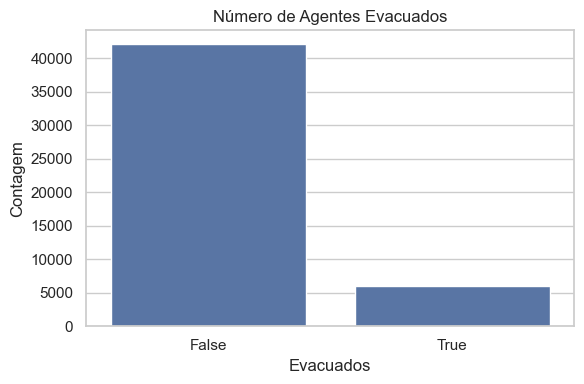

In [52]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

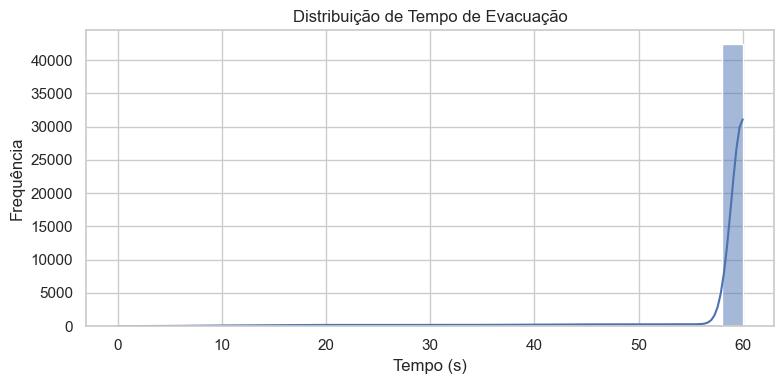

In [107]:
# 4) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_minute_1, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

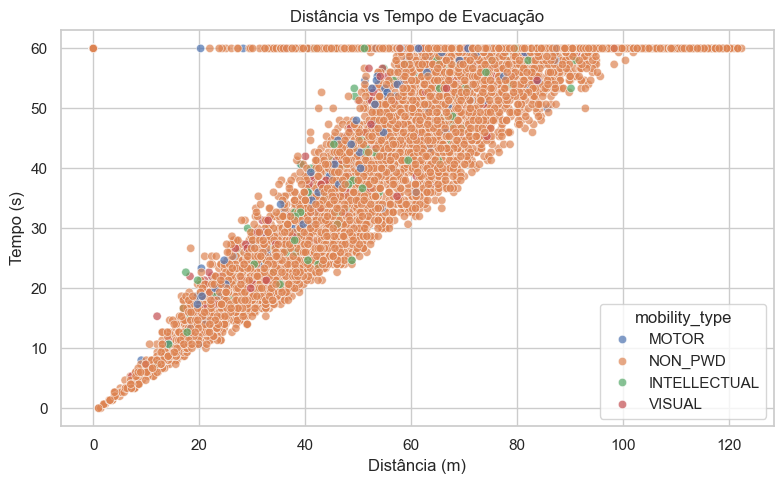

In [109]:
# 5) Distance vs. Time (scatter)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_minute_1, x='distance_m', y='time_s', hue='mobility_type', alpha=0.7, ax=ax)
ax.set(title="Distância vs Tempo de Evacuação", xlabel="Distância (m)", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "scatter_dist_vs_time.png")
plt.close(fig)

### End of simulation

In [53]:
df_all_done = load_report_data("final_simulacao", step_length, time_per_step)

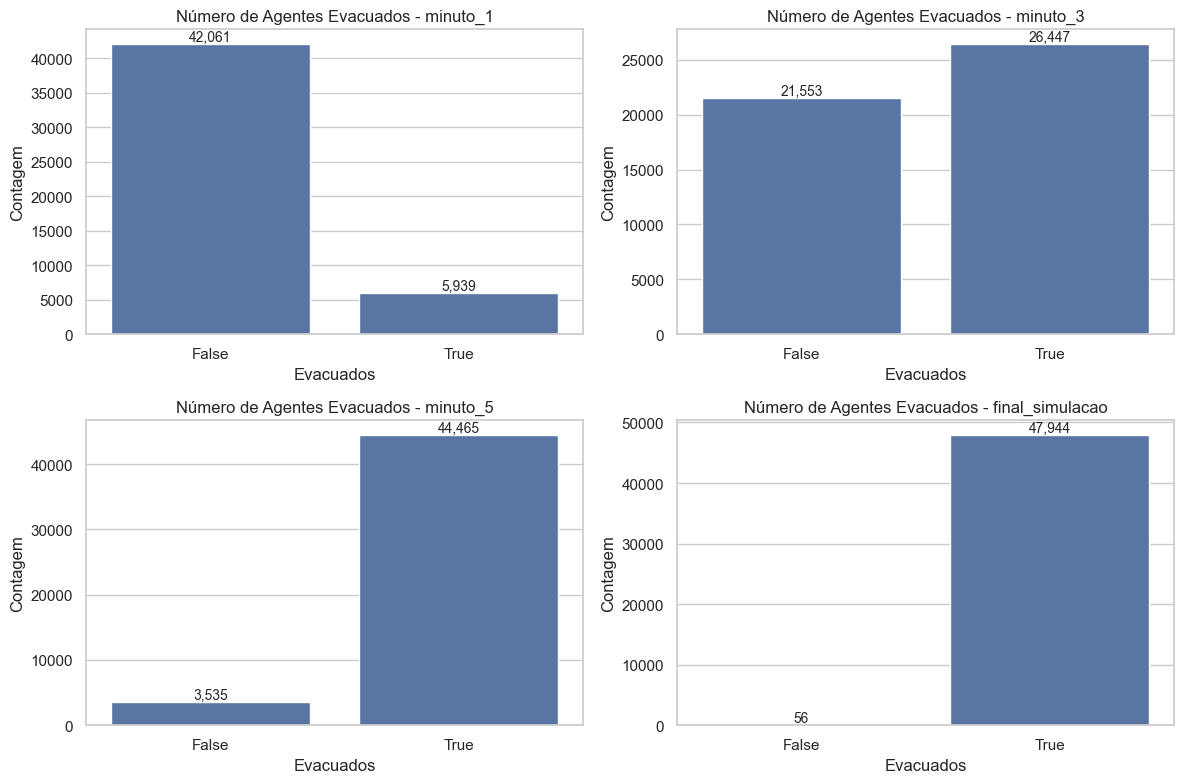

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    sns.countplot(data=df, x='evacuated', order=[False, True], ax=ax)

    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f"{count:,}", 
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10)

    ax.set(title=f"Número de Agentes Evacuados - {folder}", xlabel="Evacuados", ylabel="Contagem")

fig.tight_layout()
fig.savefig(download_dir / "grid_evacuated_count_LINEAR.png")
plt.show()
plt.close(fig)


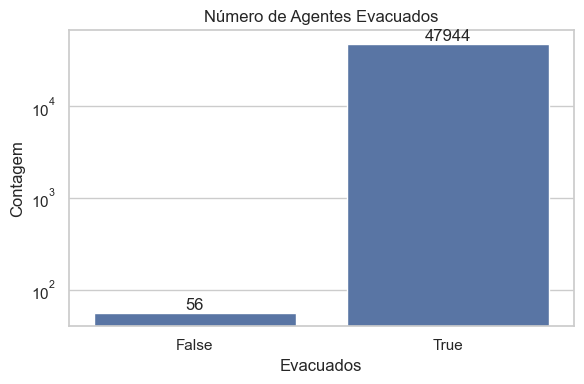

In [135]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6, 4))

# Bar plot with both True and False
sns.countplot(data=df_all_done, x='evacuated', order=[False, True], ax=ax)

# Show bar values above each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Apply log scale to y-axis to make tiny bars visible
ax.set_yscale("log")

# Titles (same as before)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")

# Save and show
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count_logscale.png")
plt.show()
plt.close(fig)

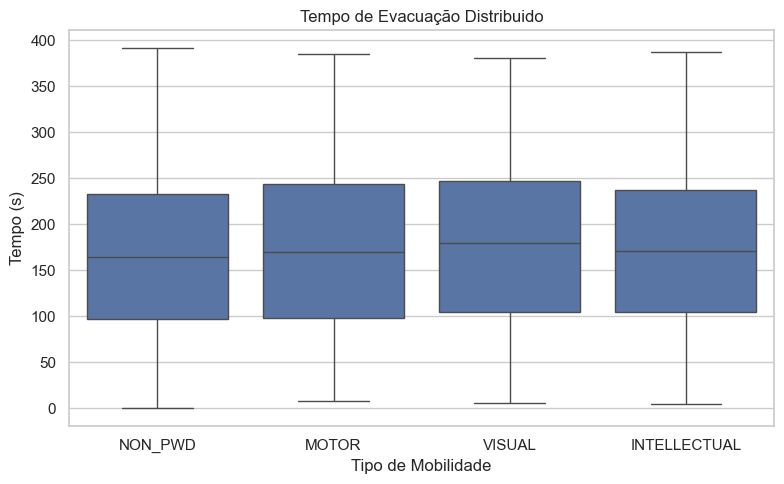

In [112]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

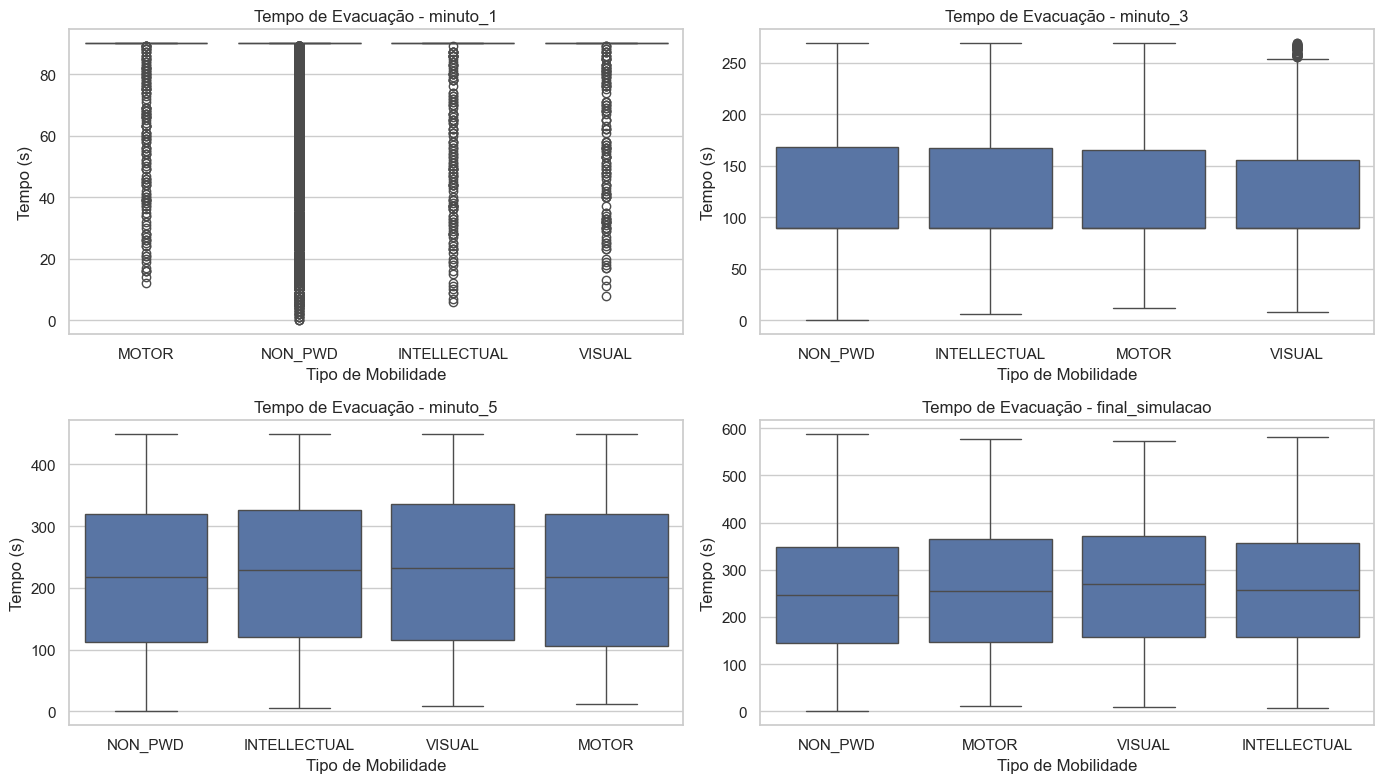

In [173]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'mobility_type' in df.columns and 'time_s' in df.columns and not df.empty:
        sns.boxplot(data=df, x='mobility_type', y='time_s', ax=ax)
        ax.set(title=f"Tempo de Evacuação - {folder}", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(title=f"Tempo de Evacuação - {folder}")

fig.tight_layout()
fig.savefig(download_dir / "grid_boxplot_time.png")
plt.show()
plt.close(fig)

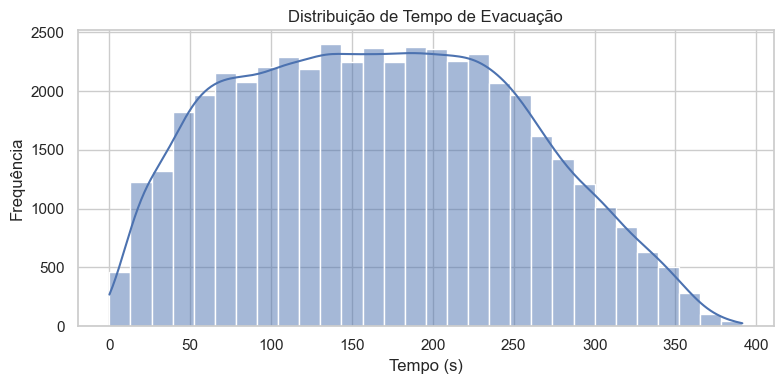

In [113]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

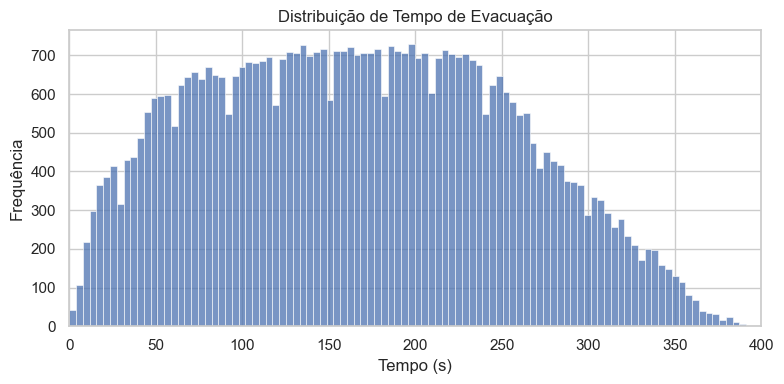

In [64]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(df[df["evacuated"] == True], x="time_s", bins=100)
plt.xlim(0, 400)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

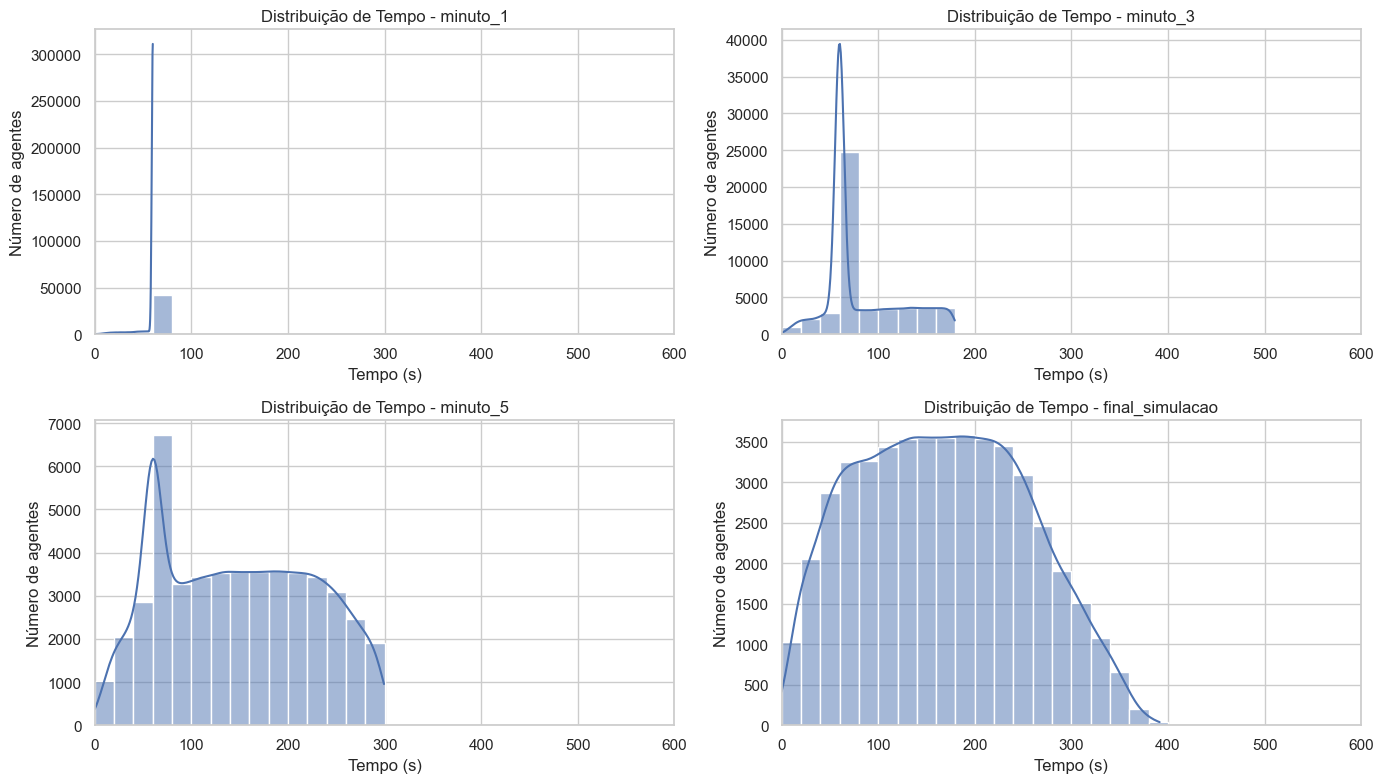

In [61]:
# X-axis (time_s) = how long agents took to evacuate
# Y-axis (frequência) = how many agents had that evacuation time (binned)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'time_s' in df.columns and not df['time_s'].dropna().empty:
        sns.histplot(data=df, x='time_s', bins=30, binrange=(0,600), kde=True, ax=ax)
        ax.set_xlim(0, 600)
        ax.set(title=f"Distribuição de Tempo - {folder}", xlabel="Tempo (s)", ylabel="Número de agentes")
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(title=f"Distribuição de Tempo - {folder}")

fig.tight_layout()
fig.savefig(download_dir / "grid_hist_time.png")
plt.show()
plt.close(fig)


In [59]:
df['time_s'].value_counts(bins=30).sort_index()

(-0.392, 13.044]       460
(13.044, 26.089]      1231
(26.089, 39.133]      1319
(39.133, 52.178]      1823
(52.178, 65.222]      1969
(65.222, 78.267]      2155
(78.267, 91.311]      2074
(91.311, 104.356]     2207
(104.356, 117.4]      2291
(117.4, 130.444]      2192
(130.444, 143.489]    2397
(143.489, 156.533]    2246
(156.533, 169.578]    2366
(169.578, 182.622]    2251
(182.622, 195.667]    2376
(195.667, 208.711]    2360
(208.711, 221.756]    2255
(221.756, 234.8]      2314
(234.8, 247.844]      2070
(247.844, 260.889]    1969
(260.889, 273.933]    1618
(273.933, 286.978]    1424
(286.978, 300.022]    1212
(300.022, 313.067]    1013
(313.067, 326.111]     846
(326.111, 339.156]     634
(339.156, 352.2]       502
(352.2, 365.244]       279
(365.244, 378.289]     102
(378.289, 391.333]      45
Name: count, dtype: int64

In [57]:
evacs = df[df["evacuated"] == True]
print(evacs["time_s"].describe())


count    47944.000000
mean       167.537738
std         86.394151
min          0.000000
25%         97.333333
50%        165.333333
75%        233.333333
max        391.333333
Name: time_s, dtype: float64


In [58]:
print(evacs["time_s"].value_counts(bins=10).sort_index())


(-0.392, 39.133]      3010
(39.133, 78.267]      5906
(78.267, 117.4]       6572
(117.4, 156.533]      6820
(156.533, 195.667]    6993
(195.667, 234.8]      6929
(234.8, 273.933]      5657
(273.933, 313.067]    3649
(313.067, 352.2]      1982
(352.2, 391.333]       426
Name: count, dtype: int64


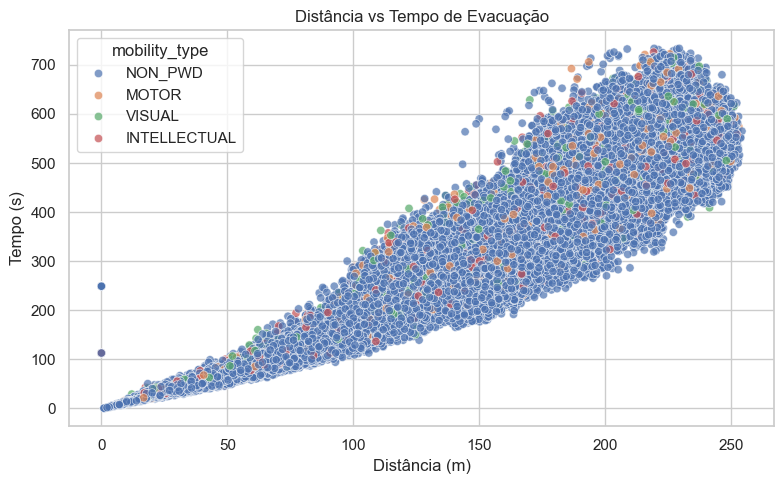

In [172]:
# 5) Distance vs. Time (scatter)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_all_done, x='distance_m', y='time_s', hue='mobility_type', alpha=0.7, ax=ax)
ax.set(title="Distância vs Tempo de Evacuação", xlabel="Distância (m)", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "scatter_dist_vs_time.png")
plt.close(fig)

In [340]:
from pathlib import Path
import pandas as pd

# CONFIGURAÇÕES - AJUSTE PARA SEU CENÁRIO
report_folders = ["minuto_1", "minuto_3", "minuto_5", "final_simulacao"]
base_path = Path("reports/no_landslide")  # <<<< MUDE AQUI

# Configurações da simulação (mantenha iguais)
step_length = 1.0
base_speed = 1.5
time_per_step = step_length / base_speed

print("=== DESCOBRINDO TEMPO TOTAL DA SIMULAÇÃO ===")
print(f"Analisando pasta: {base_path}")
print()

# Função para descobrir o tempo máximo em cada momento
def discover_max_time(folder_path):
    """Descobre o tempo máximo real da simulação analisando os dados"""
    try:
        # Pegar o arquivo mais recente
        all_csvs = list(folder_path.glob("*.csv"))
        if not all_csvs:
            return None, "Nenhum arquivo CSV encontrado"
        
        latest_file = min(all_csvs, key=lambda x: x.stat().st_mtime)
        df = pd.read_csv(latest_file)
        
        # Converter dados
        df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce')
        
        # Para descobrir o tempo total, precisamos analisar os agentes evacuados
        # pois eles têm o tempo completo até a evacuação
        evacuated_agents = df[df['evacuated'] == True]
        
        if len(evacuated_agents) > 0:
            max_time_ticks = evacuated_agents['time_spent'].max()
            max_time_seconds = max_time_ticks * time_per_step
            
            return max_time_seconds, f"Baseado em {len(evacuated_agents)} agentes evacuados"
        else:
            # Se ninguém foi evacuado, usar o máximo geral
            max_time_ticks = df['time_spent'].max()
            max_time_seconds = max_time_ticks * time_per_step
            
            return max_time_seconds, "Baseado no máximo geral (nenhum agente evacuado)"
            
    except Exception as e:
        return None, f"Erro: {e}"

# Descobrir os tempos para cada momento
discovered_times = {}
for folder in report_folders:
    folder_path = base_path / folder
    max_time, info = discover_max_time(folder_path)
    
    if max_time is not None:
        discovered_times[folder] = max_time
        print(f"{folder}:")
        print(f"  Tempo máximo descoberto: {max_time:.1f} segundos")
        print(f"  Info: {info}")
        print()
    else:
        print(f"{folder}: ERRO - {info}")
        print()

# Gerar o código que você deve usar no script principal
print("="*50)
print("CÓDIGO PARA USAR NO SEU SCRIPT PRINCIPAL:")
print("="*50)
print()
print("# Tempos descobertos automaticamente:")
print("simulation_elapsed_time = {")
for folder, time_val in discovered_times.items():
    print(f'    "{folder}": {time_val:.1f},')
print("}")
print()

# Validação - os tempos fazem sentido?
print("="*30)
print("VALIDAÇÃO:")
print("="*30)
expected_times = {
    "minuto_1": 60,
    "minuto_3": 180, 
    "minuto_5": 300
}

for folder, expected in expected_times.items():
    if folder in discovered_times:
        discovered = discovered_times[folder]
        if abs(discovered - expected) > 30:  # Margem de 30 segundos
            print(f"⚠️  {folder}: Esperado ~{expected}s, descoberto {discovered:.1f}s")
        else:
            print(f"✅ {folder}: OK ({discovered:.1f}s ≈ {expected}s)")
    else:
        print(f"❌ {folder}: Não foi possível descobrir o tempo")

if "final_simulacao" in discovered_times:
    final_time = discovered_times["final_simulacao"]
    print(f"✅ final_simulacao: {final_time:.1f}s (tempo total da simulação)")

=== DESCOBRINDO TEMPO TOTAL DA SIMULAÇÃO ===
Analisando pasta: reports/no_landslide

minuto_1:
  Tempo máximo descoberto: 59.3 segundos
  Info: Baseado em 59 agentes evacuados

minuto_3:
  Tempo máximo descoberto: 179.3 segundos
  Info: Baseado em 269 agentes evacuados

minuto_5:
  Tempo máximo descoberto: 299.3 segundos
  Info: Baseado em 446 agentes evacuados

final_simulacao:
  Tempo máximo descoberto: 344.7 segundos
  Info: Baseado em 479 agentes evacuados

CÓDIGO PARA USAR NO SEU SCRIPT PRINCIPAL:

# Tempos descobertos automaticamente:
simulation_elapsed_time = {
    "minuto_1": 59.3,
    "minuto_3": 179.3,
    "minuto_5": 299.3,
    "final_simulacao": 344.7,
}

VALIDAÇÃO:
✅ minuto_1: OK (59.3s ≈ 60s)
✅ minuto_3: OK (179.3s ≈ 180s)
✅ minuto_5: OK (299.3s ≈ 300s)
✅ final_simulacao: 344.7s (tempo total da simulação)


minuto_1: minute_1_report_20250531-211007.csv
minuto_3: minute_3_report_20250531-211532.csv
minuto_5: minute_5_report_20250531-211615.csv
final_simulacao: all_done_report_20250531-211616.csv

=== minuto_1 ===
Total de agentes: 480
Não evacuados: 421
time_spent (ticks) - min: 10.0, max: 90.0
time_s (segundos) - min: 6.7, max: 60.0
Tempo decorrido na simulação: 60 segundos
Eficiência média de movimento: 95.2%
⚠️  11 agentes com baixa eficiência de movimento (<30%)

=== minuto_3 ===
Total de agentes: 480
Não evacuados: 211
time_spent (ticks) - min: 10.0, max: 269.0
time_s (segundos) - min: 6.7, max: 179.3
Tempo decorrido na simulação: 180 segundos
Eficiência média de movimento: 46.6%
⚠️  49 agentes com baixa eficiência de movimento (<30%)

=== minuto_5 ===
Total de agentes: 480
Não evacuados: 34
time_spent (ticks) - min: 10.0, max: 449.0
time_s (segundos) - min: 6.7, max: 299.3
Tempo decorrido na simulação: 300 segundos
Eficiência média de movimento: 49.5%
⚠️  142 agentes com baixa eficiê

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/946118442.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


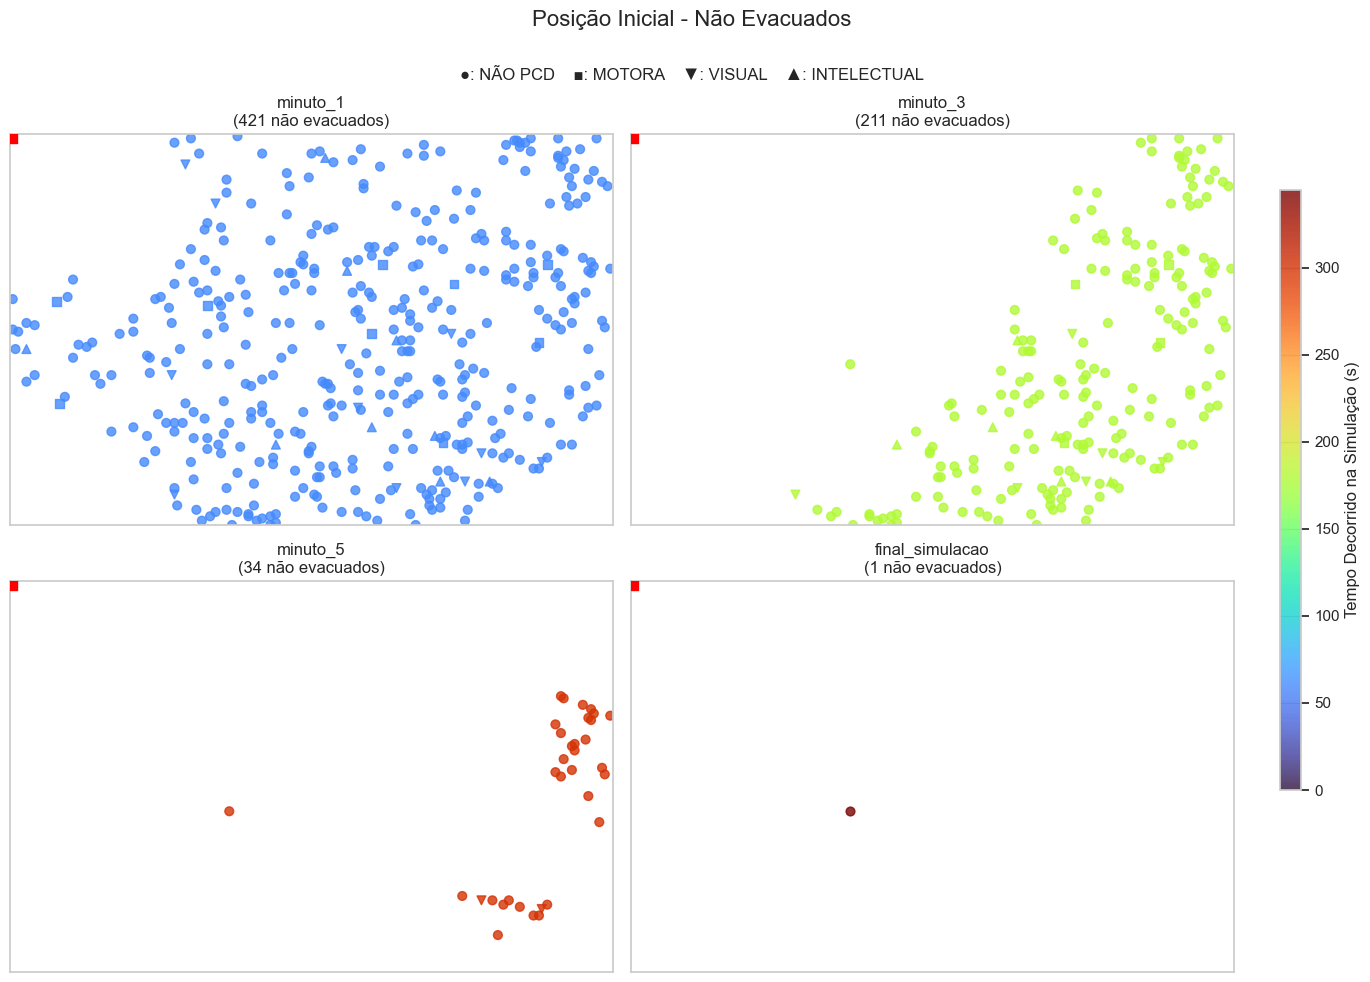


ANÁLISE DETALHADA

minuto_1:
  Agentes não evacuados: 421
  Time_spent (ticks): count    421.0
mean      90.0
std        0.0
min       90.0
25%       90.0
50%       90.0
75%       90.0
max       90.0
Name: time_spent, dtype: float64
  Time_s (segundos): count    421.0
mean      60.0
std        0.0
min       60.0
25%       60.0
50%       60.0
75%       60.0
max       60.0
Name: time_s, dtype: float64

minuto_3:
  Agentes não evacuados: 211
  Time_spent (ticks): count    211.000000
mean      90.516588
std        7.503869
min       90.000000
25%       90.000000
50%       90.000000
75%       90.000000
max      199.000000
Name: time_spent, dtype: float64
  Time_s (segundos): count    211.000000
mean      60.344392
std        5.002580
min       60.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      132.666667
Name: time_s, dtype: float64

minuto_5:
  Agentes não evacuados: 34
  Time_spent (ticks): count     34.000000
mean      93.205882
std       18.693346
min       

In [363]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Configurações da simulação
step_length = 1.0                # metros por movimento/step
base_speed = 1.5                 # m/s
time_per_step = step_length / base_speed    # segundos por step de simulação

report_folders = ["minuto_1", "minuto_3", "minuto_5", "final_simulacao"]
base_path = Path("reports/no_landslide")

# Tempo decorrido na simulação para cada momento (em segundos)
simulation_elapsed_time = {
    "minuto_1": 60,
    "minuto_3": 180,
    "minuto_5": 300,
    "final_simulacao": 344.7  # Baseado no max observado
}

# --- Step 1: Carregar arquivos mais recentes ---
latest_files = {}
try:
    for folder in report_folders:
        folder_path = base_path / folder
        all_csvs = list(folder_path.glob("*.csv"))
        latest_file = min(all_csvs, key=os.path.getmtime)
        latest_files[folder] = latest_file
        print(f"{folder}: {latest_file.name}")
except Exception as e:
    print(f"Erro ao encontrar arquivos: {e}")
    exit()

# --- Step 2: Carregar e processar dados ---
dataframes = {}
for folder in report_folders:
    file = latest_files[folder]
    df = pd.read_csv(file)
    
    # Conversões necessárias
    df['evacuated'] = df['evacuated'].astype(bool)
    df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce')
    df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
    df['steps'] = pd.to_numeric(df['steps'], errors='coerce')
    
    # Cálculos derivados
    df['distance_m'] = df['distance'] * step_length
    df['time_s'] = df['time_spent'] * time_per_step  # ESTA é a conversão correta para segundos
    df['velocity_m_s'] = np.where(df['time_s'] > 0, df['distance_m'] / df['time_s'], 0)
    
    dataframes[folder] = df
    
    # Diagnóstico dos dados
    print(f"\n=== {folder} ===")
    print(f"Total de agentes: {len(df)}")
    print(f"Não evacuados: {len(df[df['evacuated'] == False])}")
    print(f"time_spent (ticks) - min: {df['time_spent'].min():.1f}, max: {df['time_spent'].max():.1f}")
    print(f"time_s (segundos) - min: {df['time_s'].min():.1f}, max: {df['time_s'].max():.1f}")
    print(f"Tempo decorrido na simulação: {simulation_elapsed_time[folder]} segundos")
    
    # Calcular eficiência de movimento (% do tempo que passaram se movendo)
    if simulation_elapsed_time[folder] > 0:
        df['movement_efficiency'] = (df['time_s'] / simulation_elapsed_time[folder]) * 100
        avg_efficiency = df['movement_efficiency'].mean()
        print(f"Eficiência média de movimento: {avg_efficiency:.1f}%")
        
        # Agentes que passaram muito pouco tempo se movendo (podem estar stuck)
        low_efficiency = df[df['movement_efficiency'] < 30]  # Menos de 30% do tempo se movendo
        if len(low_efficiency) > 0:
            print(f"⚠️  {len(low_efficiency)} agentes com baixa eficiência de movimento (<30%)")

# --- Step 3: Plotar os dados corrigidos ---
mobility_markers = {
    "NON_PWD": "o", "MOTOR": "s", "VISUAL": "v", "INTELLECTUAL": "^"
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Inicial - Não Evacuados", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ▼: VISUAL    ▲: INTELECTUAL",
         ha='center', fontsize=12)

# Determinar o range global para a cor (baseado no tempo decorrido da simulação)
vmin, vmax = 0, max(simulation_elapsed_time.values())

sc_for_colorbar = None

for i, folder in enumerate(report_folders):
    df = dataframes[folder]
    df_not_evacuated = df[df["evacuated"] == False].copy()
    ax = axes[i // 2, i % 2]
    
    # Tempo decorrido na simulação para este momento
    elapsed_time = simulation_elapsed_time[folder]

    if df_not_evacuated.empty:
        ax.text(0.5, 0.5, "Todos evacuados", ha='center', va='center', 
                transform=ax.transAxes, fontsize=12)
        ax.set_xlim(0, 220)
        ax.set_ylim(0, 180)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(folder)
        continue

    # Extrair coordenadas x, y da posição inicial
    df_not_evacuated[['x', 'y']] = df_not_evacuated['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    
    # Plotar por tipo de mobilidade
    for mob, marker in mobility_markers.items():
        sub = df_not_evacuated[df_not_evacuated["mobility_type"] == mob]
        if not sub.empty:
            # CORREÇÃO: usar o tempo decorrido da simulação em vez de time_s individual
            # Todos os agentes não evacuados têm o mesmo "tempo na simulação"
            time_color = [elapsed_time] * len(sub)
            sc = ax.scatter(sub['x'], sub['y'], c=time_color, cmap='turbo',
                           s=40, alpha=0.8, marker=marker, vmin=vmin, vmax=vmax, label=mob)
            if sc_for_colorbar is None:
                sc_for_colorbar = sc

    # Marcar zona segura
    ax.scatter(0, 179, color='red', s=100, marker='s', label='Zona Segura', zorder=10)
    ax.set_xlim(0, 220)
    ax.set_ylim(0, 180)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{folder}\n({len(df_not_evacuated)} não evacuados)")

# Adicionar colorbar
if sc_for_colorbar:
    cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
    cbar = fig.colorbar(sc_for_colorbar, cax=cbar_ax, label="Tempo Decorrido na Simulação (s)")

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# --- Análise adicional para entender os dados ---
print("\n" + "="*50)
print("ANÁLISE DETALHADA")
print("="*50)

for folder in report_folders:
    df = dataframes[folder]
    df_not_evac = df[df["evacuated"] == False]
    
    print(f"\n{folder}:")
    print(f"  Agentes não evacuados: {len(df_not_evac)}")
    if len(df_not_evac) > 0:
        print(f"  Time_spent (ticks): {df_not_evac['time_spent'].describe()}")
        print(f"  Time_s (segundos): {df_not_evac['time_s'].describe()}")
        
        # Verificar se há agentes com time_spent inconsistente
        if folder == "minuto_1":
            max_expected_ticks = 60 / time_per_step  # ~90 ticks para 1 minuto
            weird_agents = df_not_evac[df_not_evac['time_spent'] > max_expected_ticks]
            if len(weird_agents) > 0:
                print(f"  ⚠️  Agentes com time_spent > {max_expected_ticks:.0f} ticks:")
                print(f"     {weird_agents[['agent_id', 'time_spent', 'time_s']].to_string()}")

minuto_1: minute_1_report_20250531-211007.csv
minuto_3: minute_3_report_20250531-211532.csv
minuto_5: minute_5_report_20250531-211615.csv
final_simulacao: all_done_report_20250531-211616.csv

=== minuto_1 ===
Total de agentes: 480
Evacuados: 59
Não evacuados: 421
time_spent não evacuados (ticks) - min: 90.0, max: 90.0
time_s não evacuados (segundos) - min: 60.0, max: 60.0
Valores únicos de time_s: 1
Valores: [np.float64(60.0)]

=== minuto_3 ===
Total de agentes: 480
Evacuados: 269
Não evacuados: 211
time_spent não evacuados (ticks) - min: 90.0, max: 199.0
time_s não evacuados (segundos) - min: 60.0, max: 132.7
Valores únicos de time_s: 2
Valores: [np.float64(60.0), np.float64(132.66666666666666)]

=== minuto_5 ===
Total de agentes: 480
Evacuados: 446
Não evacuados: 34
time_spent não evacuados (ticks) - min: 90.0, max: 199.0
time_s não evacuados (segundos) - min: 60.0, max: 132.7
Valores únicos de time_s: 2
Valores: [np.float64(60.0), np.float64(132.66666666666666)]

=== final_simulacao

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1277874251.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


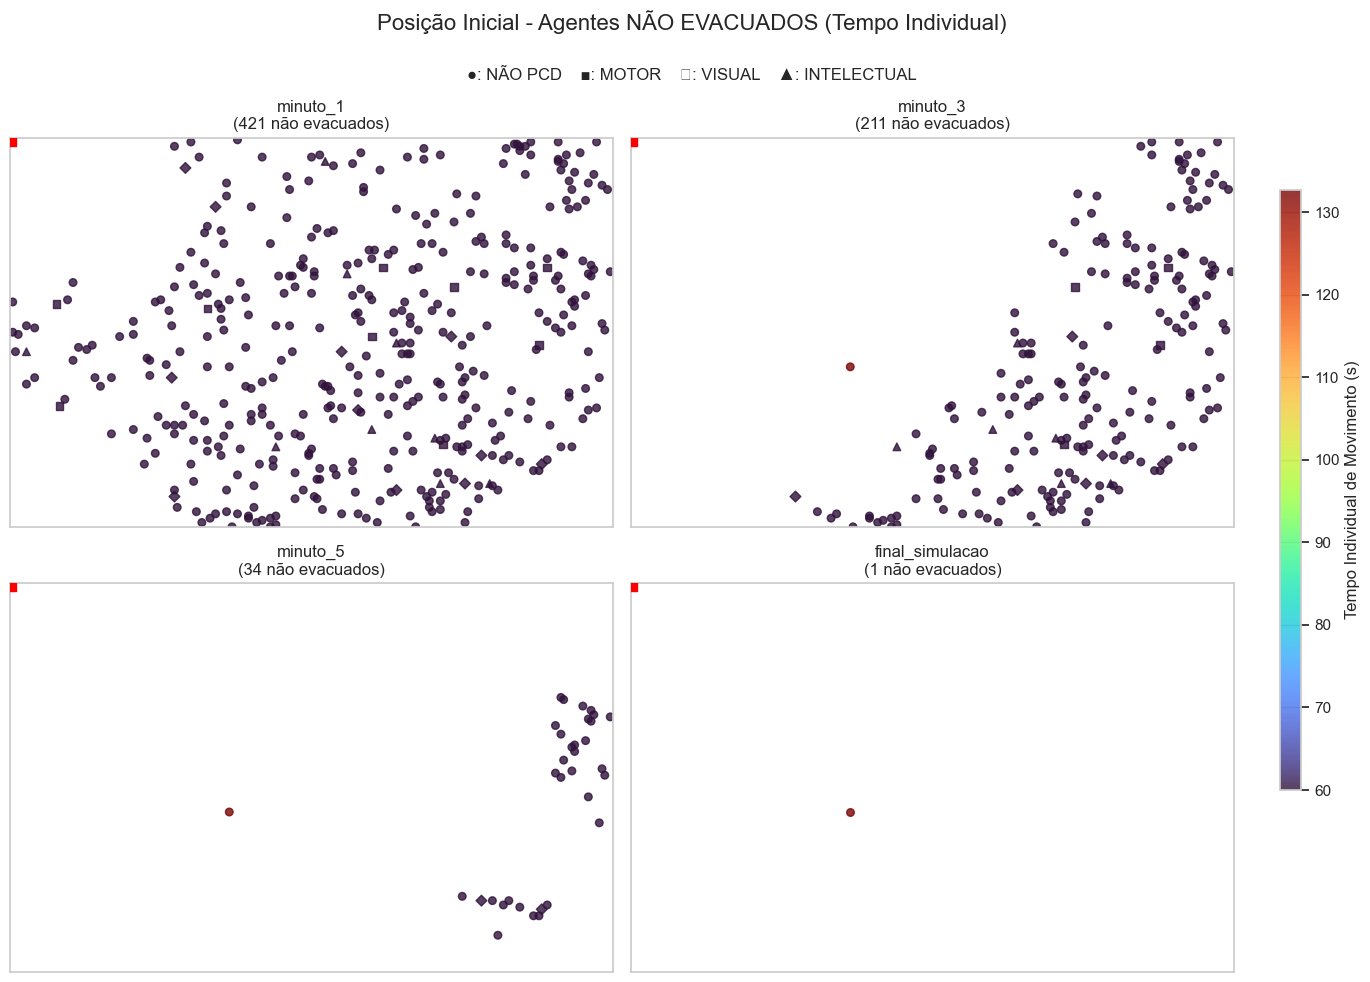


ANÁLISE DETALHADA - AGENTES NÃO EVACUADOS

minuto_1:
  Total de agentes: 480
  Evacuados: 59
  Não evacuados: 421
  Time_s não evacuados:
    Min: 60.0s
    Max: 60.0s
    Média: 60.0s
    Desvio padrão: 0.0s
  Estatísticas por mobilidade (não evacuados):
    INTELLECTUAL:   9 agentes, tempo:  60.0s- 60.0s (média: 60.0s)
    MOTOR:   9 agentes, tempo:  60.0s- 60.0s (média: 60.0s)
    NON_PWD: 392 agentes, tempo:  60.0s- 60.0s (média: 60.0s)
    VISUAL:  11 agentes, tempo:  60.0s- 60.0s (média: 60.0s)

minuto_3:
  Total de agentes: 480
  Evacuados: 269
  Não evacuados: 211
  Time_s não evacuados:
    Min: 60.0s
    Max: 132.7s
    Média: 60.3s
    Desvio padrão: 5.0s
  Estatísticas por mobilidade (não evacuados):
    INTELLECTUAL:   6 agentes, tempo:  60.0s- 60.0s (média: 60.0s)
    MOTOR:   4 agentes, tempo:  60.0s- 60.0s (média: 60.0s)
    NON_PWD: 195 agentes, tempo:  60.0s-132.7s (média: 60.4s)
    VISUAL:   6 agentes, tempo:  60.0s- 60.0s (média: 60.0s)

minuto_5:
  Total de agent

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3535627062.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


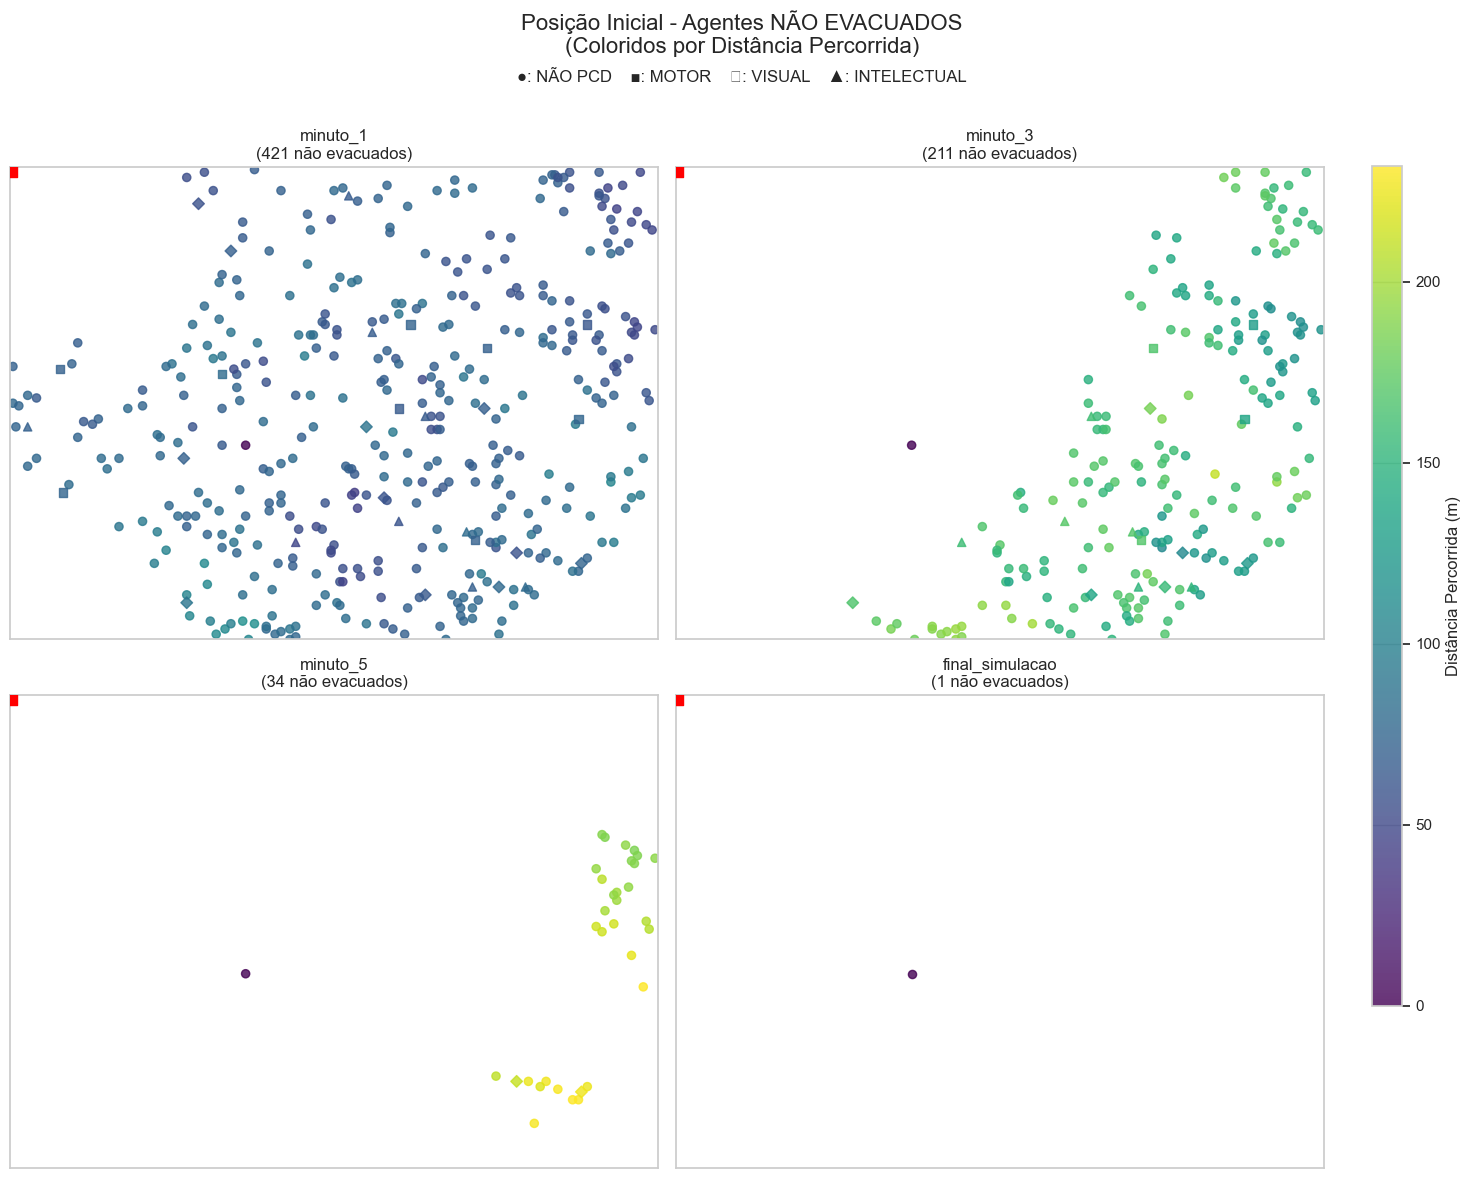

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3535627062.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


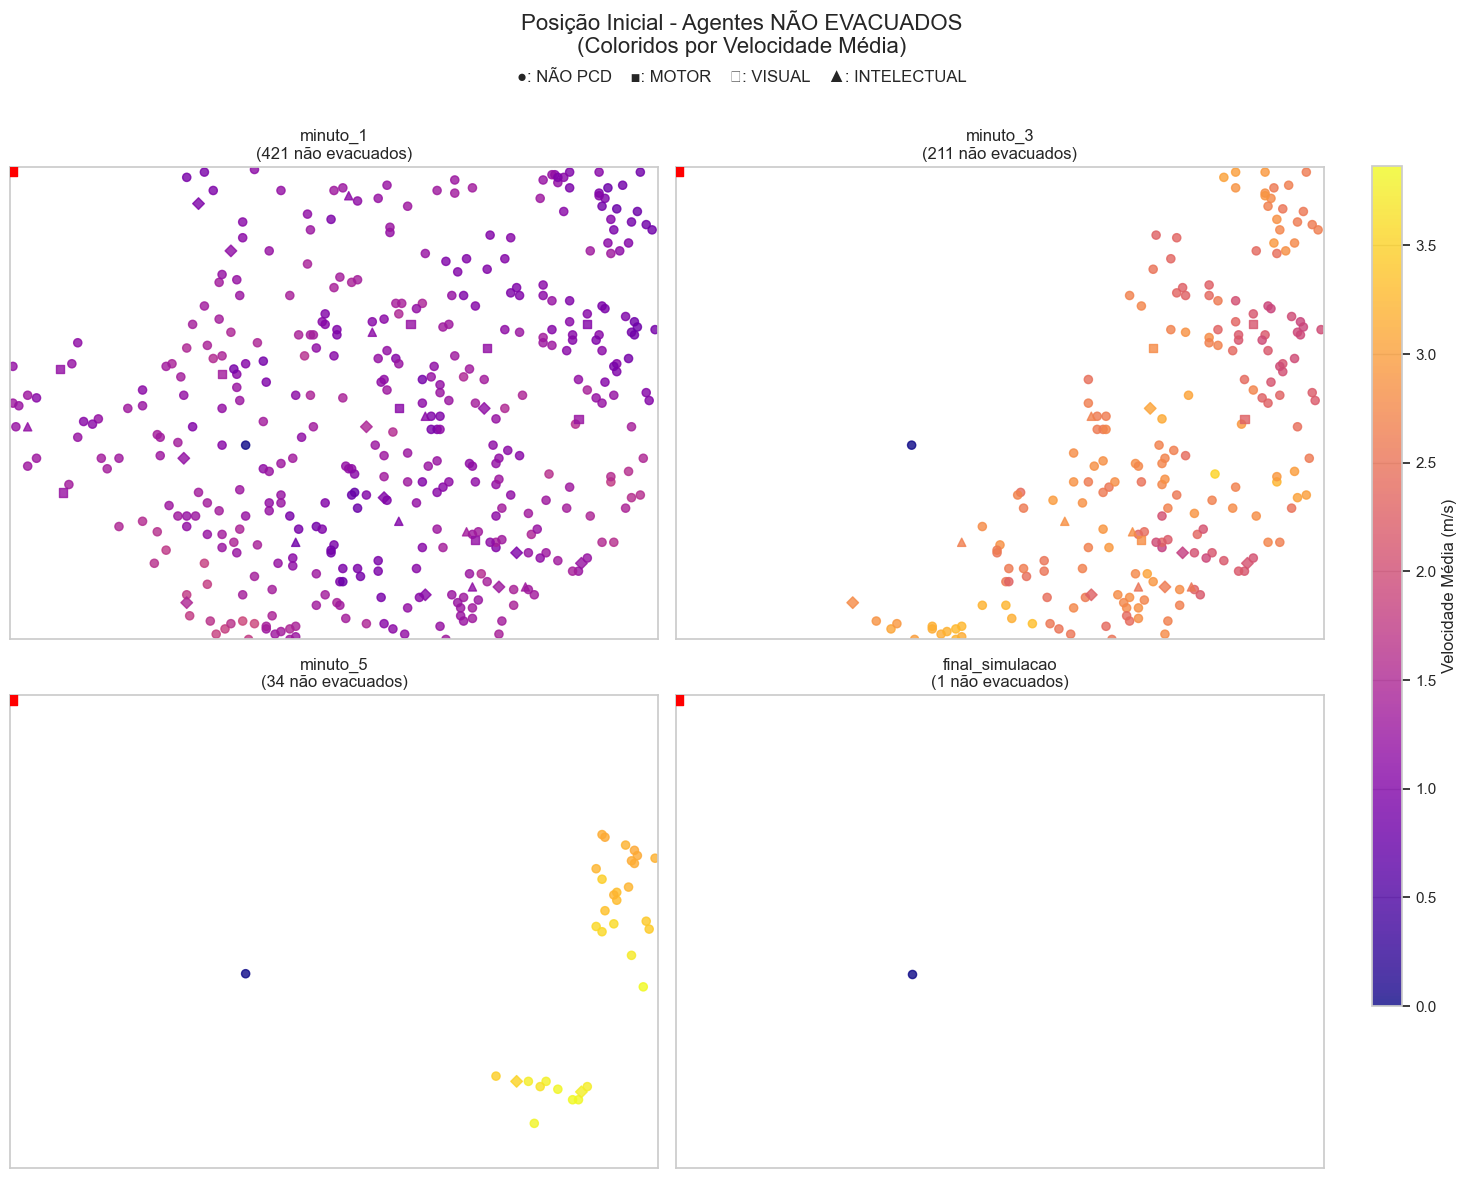


ESTATÍSTICAS PARA EXPLICAR NO TCC

MINUTO_1:
  Agentes não evacuados: 421
  Tempo de movimento (TODOS): 60.0s
  Distância percorrida:
    Média: 72.7m
    Min-Max: 0.0m - 115.3m
  Velocidade média:
    Média: 1.21 m/s
    Min-Max: 0.00 - 1.92 m/s
  Por tipo de mobilidade:
    NON_PWD     : 392 agentes, dist:  72.9m, vel: 1.21m/s
    VISUAL      :  11 agentes, dist:  70.9m, vel: 1.18m/s
    MOTOR       :   9 agentes, dist:  71.4m, vel: 1.19m/s
    INTELLECTUAL:   9 agentes, dist:  67.3m, vel: 1.12m/s

MINUTO_3:
  Agentes não evacuados: 211
  Tempo de movimento (TODOS): 60.0s
  Distância percorrida:
    Média: 154.1m
    Min-Max: 0.0m - 210.6m
  Velocidade média:
    Média: 2.57 m/s
    Min-Max: 0.00 - 3.51 m/s
  Por tipo de mobilidade:
    NON_PWD     : 195 agentes, dist: 154.3m, vel: 2.57m/s
    VISUAL      :   6 agentes, dist: 145.9m, vel: 2.43m/s
    INTELLECTUAL:   6 agentes, dist: 160.3m, vel: 2.67m/s
    MOTOR       :   4 agentes, dist: 150.0m, vel: 2.50m/s

MINUTO_5:
  Agentes n

In [358]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = Path("reports/no_landslide")

# --- Carregar dados (mesmo código anterior) ---
latest_files = {}
for folder in report_folders:
    folder_path = base_path / folder
    all_csvs = list(folder_path.glob("*.csv"))
    latest_file = min(all_csvs, key=os.path.getmtime)
    latest_files[folder] = latest_file

dataframes = {}
for folder in report_folders:
    file = latest_files[folder]
    df = pd.read_csv(file)
    
    df['evacuated'] = df['evacuated'].astype(bool)
    df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce')
    df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
    df['steps'] = pd.to_numeric(df['steps'], errors='coerce')
    
    df['distance_m'] = df['distance'] * step_length
    df['time_s'] = df['time_spent'] * time_per_step
    df['velocity_m_s'] = np.where(df['time_s'] > 0, df['distance_m'] / df['time_s'], 0)
    
    dataframes[folder] = df

# --- VISUALIZAÇÃO MELHORADA: USAR DISTÂNCIA PERCORRIDA ---
mobility_markers = {
    "NON_PWD": "o", "MOTOR": "s", "VISUAL": "D", "INTELLECTUAL": "^"
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Posição Inicial - Agentes NÃO EVACUADOS\n(Coloridos por Distância Percorrida)", fontsize=16)
fig.text(0.5, 0.92, "●: NÃO PCD    ■: MOTOR    ◆: VISUAL    ▲: INTELECTUAL", 
         ha='center', fontsize=12)

# Encontrar range global de distâncias para agentes não evacuados
all_distances = []
for folder in report_folders:
    df = dataframes[folder]
    df_not_evacuated = df[df['evacuated'] == False]
    if len(df_not_evacuated) > 0:
        all_distances.extend(df_not_evacuated['distance_m'].tolist())

if all_distances:
    vmin, vmax = min(all_distances), max(all_distances)
else:
    vmin, vmax = 0, 100

sc_for_colorbar = None

for i, folder in enumerate(report_folders):
    df = dataframes[folder]
    df_not_evacuated = df[df['evacuated'] == False].copy()
    ax = axes[i // 2, i % 2]

    if df_not_evacuated.empty:
        ax.text(0.5, 0.5, "Todos evacuaram!", ha='center', va='center', 
                transform=ax.transAxes, fontsize=14, color='green', weight='bold')
        ax.set_xlim(0, 220)
        ax.set_ylim(0, 180)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{folder}\n(0 não evacuados)")
        continue

    # Extrair coordenadas
    df_not_evacuated[['x', 'y']] = df_not_evacuated['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    
    # Plotar por tipo de mobilidade, colorindo por distância
    for mob, marker in mobility_markers.items():
        sub = df_not_evacuated[df_not_evacuated["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['distance_m'], cmap='viridis',
                           s=35, alpha=0.8, marker=marker, vmin=vmin, vmax=vmax)
            if sc_for_colorbar is None:
                sc_for_colorbar = sc

    # Zona segura
    ax.scatter(0, 179, color='red', s=100, marker='s', label='Zona Segura', zorder=10)
    ax.set_xlim(0, 220)
    ax.set_ylim(0, 180)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{folder}\n({len(df_not_evacuated)} não evacuados)")

# Colorbar
if sc_for_colorbar:
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sc_for_colorbar, cax=cbar_ax, label="Distância Percorrida (m)")

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# --- SEGUNDA VISUALIZAÇÃO: VELOCIDADE MÉDIA ---
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))
fig2.suptitle("Posição Inicial - Agentes NÃO EVACUADOS\n(Coloridos por Velocidade Média)", fontsize=16)
fig2.text(0.5, 0.92, "●: NÃO PCD    ■: MOTOR    ◆: VISUAL    ▲: INTELECTUAL", 
          ha='center', fontsize=12)

# Range global de velocidades
all_velocities = []
for folder in report_folders:
    df = dataframes[folder]
    df_not_evacuated = df[df['evacuated'] == False]
    if len(df_not_evacuated) > 0:
        all_velocities.extend(df_not_evacuated['velocity_m_s'].tolist())

if all_velocities:
    vmin_vel, vmax_vel = min(all_velocities), max(all_velocities)
else:
    vmin_vel, vmax_vel = 0, 2

sc_for_colorbar2 = None

for i, folder in enumerate(report_folders):
    df = dataframes[folder]
    df_not_evacuated = df[df['evacuated'] == False].copy()
    ax = axes2[i // 2, i % 2]

    if df_not_evacuated.empty:
        ax.text(0.5, 0.5, "Todos evacuaram!", ha='center', va='center', 
                transform=ax.transAxes, fontsize=14, color='green', weight='bold')
        ax.set_xlim(0, 220)
        ax.set_ylim(0, 180)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{folder}\n(0 não evacuados)")
        continue

    # Extrair coordenadas
    df_not_evacuated[['x', 'y']] = df_not_evacuated['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    
    # Plotar por tipo de mobilidade, colorindo por velocidade
    for mob, marker in mobility_markers.items():
        sub = df_not_evacuated[df_not_evacuated["mobility_type"] == mob]
        if not sub.empty:
            sc2 = ax.scatter(sub['x'], sub['y'], c=sub['velocity_m_s'], cmap='plasma',
                            s=35, alpha=0.8, marker=marker, vmin=vmin_vel, vmax=vmax_vel)
            if sc_for_colorbar2 is None:
                sc_for_colorbar2 = sc2

    # Zona segura
    ax.scatter(0, 179, color='red', s=100, marker='s', label='Zona Segura', zorder=10)
    ax.set_xlim(0, 220)
    ax.set_ylim(0, 180)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{folder}\n({len(df_not_evacuated)} não evacuados)")

# Colorbar
if sc_for_colorbar2:
    cbar_ax2 = fig2.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar2 = fig2.colorbar(sc_for_colorbar2, cax=cbar_ax2, label="Velocidade Média (m/s)")

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# --- ESTATÍSTICAS COMPARATIVAS ---
print("\n" + "="*70)
print("ESTATÍSTICAS PARA EXPLICAR NO TCC")
print("="*70)

for folder in report_folders:
    df = dataframes[folder]
    df_not_evac = df[df['evacuated'] == False]
    
    if len(df_not_evac) > 0:
        print(f"\n{folder.upper()}:")
        print(f"  Agentes não evacuados: {len(df_not_evac)}")
        print(f"  Tempo de movimento (TODOS): {df_not_evac['time_s'].iloc[0]:.1f}s")
        print(f"  Distância percorrida:")
        print(f"    Média: {df_not_evac['distance_m'].mean():.1f}m")
        print(f"    Min-Max: {df_not_evac['distance_m'].min():.1f}m - {df_not_evac['distance_m'].max():.1f}m")
        print(f"  Velocidade média:")
        print(f"    Média: {df_not_evac['velocity_m_s'].mean():.2f} m/s")
        print(f"    Min-Max: {df_not_evac['velocity_m_s'].min():.2f} - {df_not_evac['velocity_m_s'].max():.2f} m/s")
        
        # Análise por mobilidade
        print(f"  Por tipo de mobilidade:")
        for mob_type in df_not_evac['mobility_type'].unique():
            subset = df_not_evac[df_not_evac['mobility_type'] == mob_type]
            avg_dist = subset['distance_m'].mean()
            avg_vel = subset['velocity_m_s'].mean()
            print(f"    {mob_type:12}: {len(subset):3} agentes, "
                  f"dist: {avg_dist:5.1f}m, vel: {avg_vel:.2f}m/s")

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3747381219.py:89: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  sc = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['distance_m'],
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3747381219.py:89: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  sc = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['distance_m'],
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3747381219.py:89: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  sc = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['distance_m'],
/var/folders/r1/vzkzbr

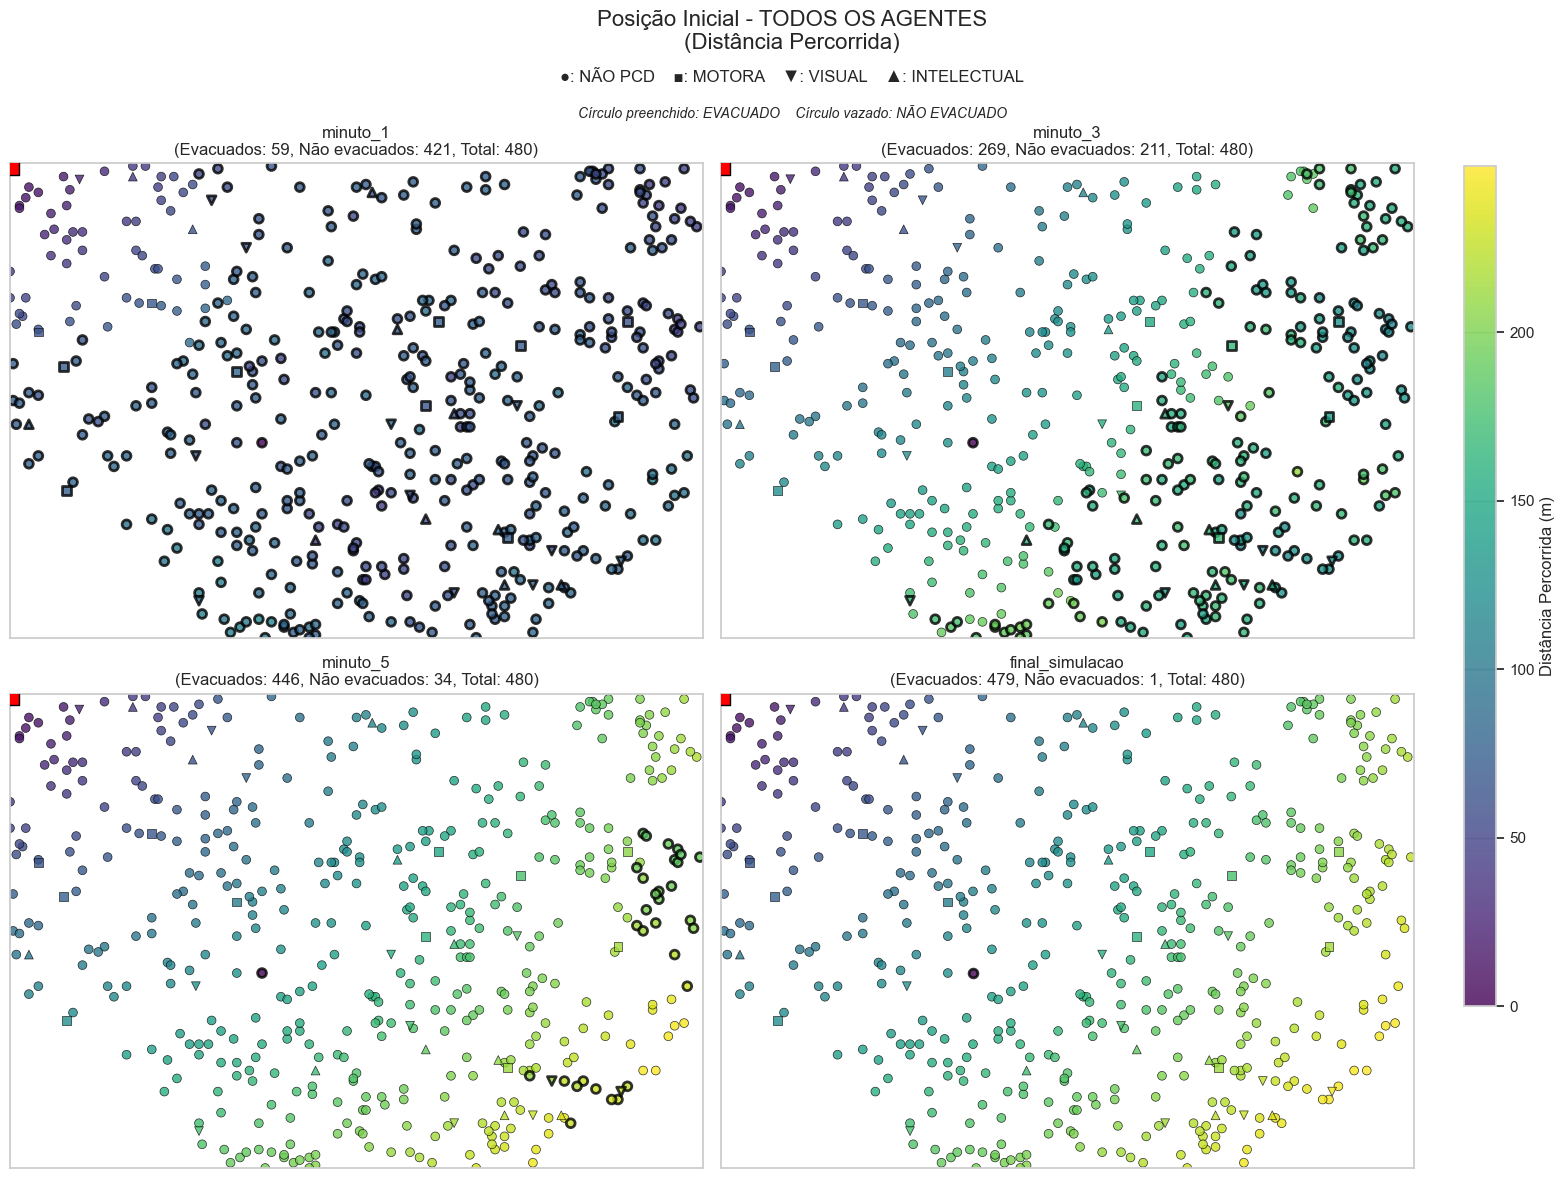

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3747381219.py:165: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  sc2 = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['velocity_m_s'],
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3747381219.py:165: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  sc2 = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['velocity_m_s'],
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3747381219.py:165: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  sc2 = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['velocity_m_s'],
/var/folde

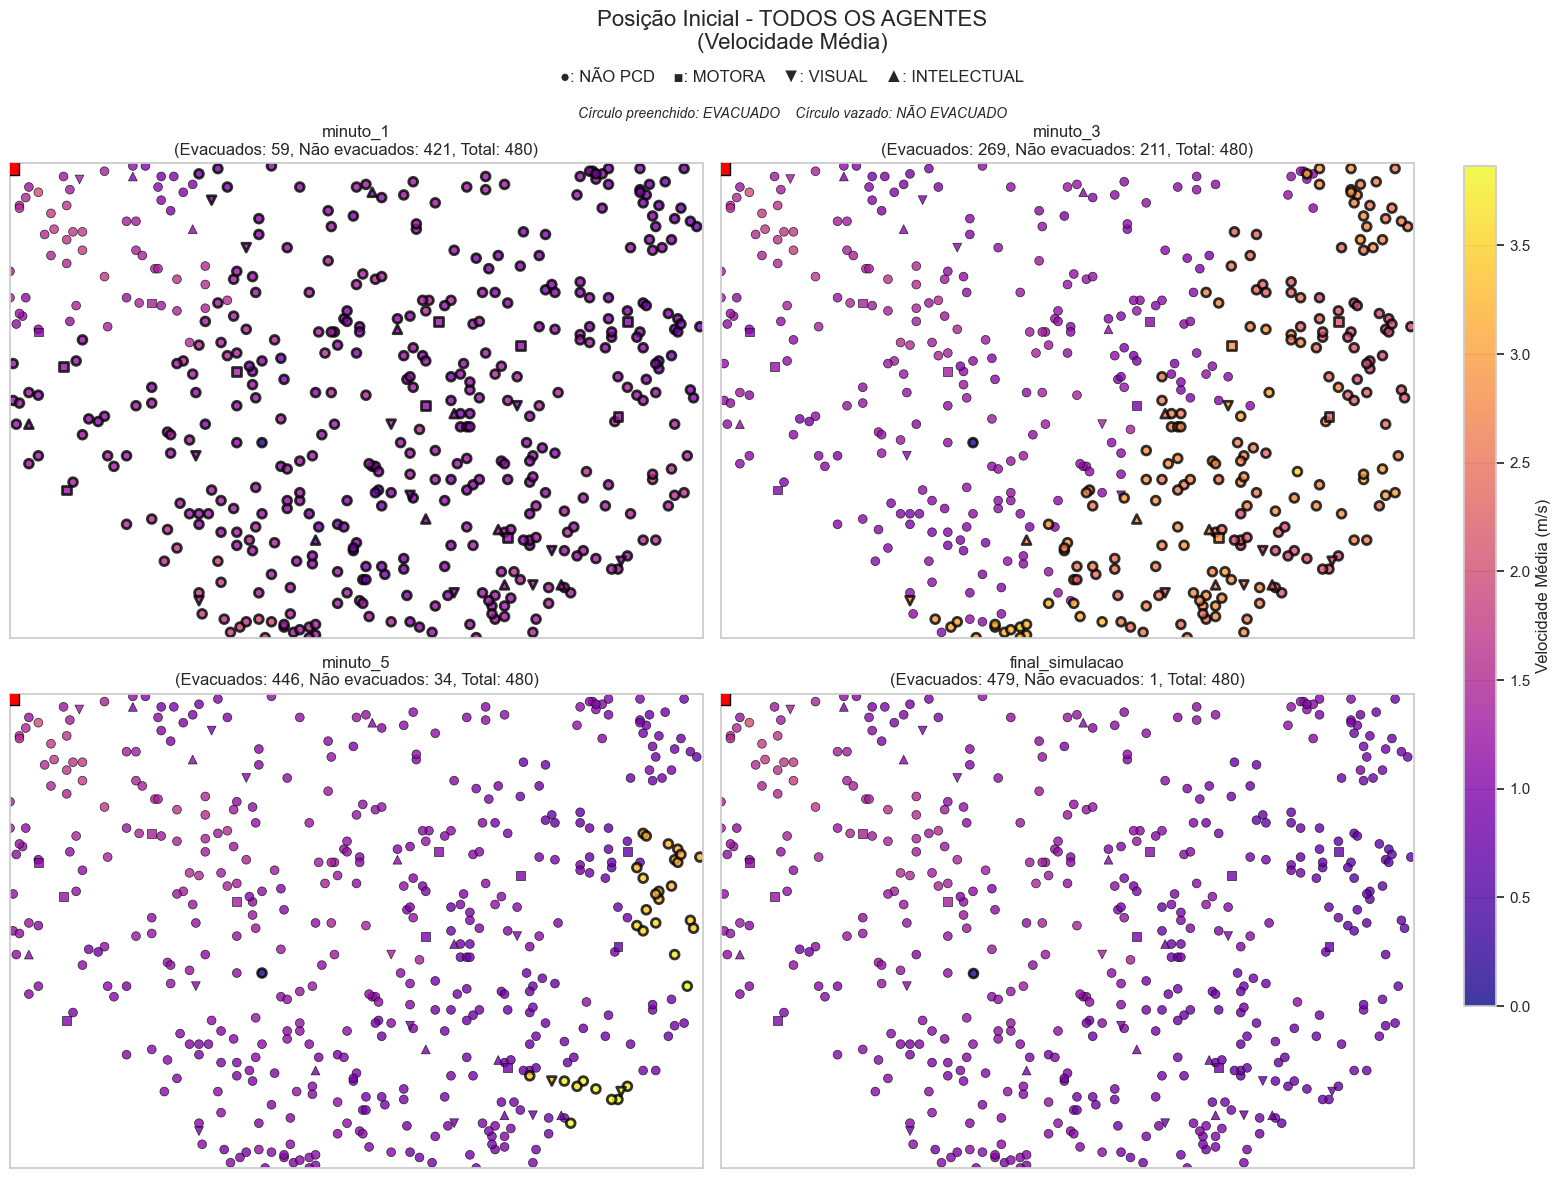


ESTATÍSTICAS COMPLETAS PARA O TCC

MINUTO_1:
  Total de agentes: 480
  Evacuados: 59 (12.3%)
  Não evacuados: 421 (87.7%)

  TODOS OS AGENTES:
    Distância percorrida:
      Média: 69.7m
      Min-Max: 0.0m - 115.3m
    Velocidade média:
      Média: 1.23 m/s
      Min-Max: 0.00 - 2.02 m/s

  AGENTES EVACUADOS:
    Distância média: 48.1m
    Velocidade média: 1.38 m/s
    Tempo médio: 36.6s

  AGENTES NÃO EVACUADOS:
    Distância média: 72.7m
    Velocidade média: 1.21 m/s
    Tempo: 60.0s

  POR TIPO DE MOBILIDADE:
    NON_PWD     : 446 agentes total, evacuação:  12.1%
                 dist:  69.9m, vel: 1.24m/s
    MOTOR       :  11 agentes total, evacuação:  18.2%
                 dist:  70.5m, vel: 1.20m/s
    VISUAL      :  12 agentes total, evacuação:   8.3%
                 dist:  66.9m, vel: 1.20m/s
    INTELLECTUAL:  11 agentes total, evacuação:  18.2%
                 dist:  64.3m, vel: 1.11m/s

MINUTO_3:
  Total de agentes: 480
  Evacuados: 269 (56.0%)
  Não evacuados: 211

In [362]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Configurações da simulação
step_length = 1.0
base_speed = 1.5
time_per_step = step_length / base_speed

report_folders = ["minuto_1", "minuto_3", "minuto_5", "final_simulacao"]
base_path = Path("reports/no_landslide")

# --- Carregar dados ---
latest_files = {}
for folder in report_folders:
    folder_path = base_path / folder
    all_csvs = list(folder_path.glob("*.csv"))
    latest_file = min(all_csvs, key=os.path.getmtime)
    latest_files[folder] = latest_file

dataframes = {}
for folder in report_folders:
    file = latest_files[folder]
    df = pd.read_csv(file)
    
    df['evacuated'] = df['evacuated'].astype(bool)
    df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce')
    df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
    df['steps'] = pd.to_numeric(df['steps'], errors='coerce')
    
    df['distance_m'] = df['distance'] * step_length
    df['time_s'] = df['time_spent'] * time_per_step
    df['velocity_m_s'] = np.where(df['time_s'] > 0, df['distance_m'] / df['time_s'], 0)
    
    dataframes[folder] = df

# --- VISUALIZAÇÃO 1: TODOS OS AGENTES POR DISTÂNCIA PERCORRIDA ---
mobility_markers = {
    "NON_PWD": "o", "MOTOR": "s", "VISUAL": "v", "INTELLECTUAL": "^"
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Posição Inicial - TODOS OS AGENTES\n(Distância Percorrida)", fontsize=16)
fig.text(0.5, 0.92, "●: NÃO PCD    ■: MOTORA    ▼: VISUAL    ▲: INTELECTUAL", 
         ha='center', fontsize=12)
fig.text(0.5, 0.89, "Círculo preenchido: EVACUADO    Círculo vazado: NÃO EVACUADO", 
         ha='center', fontsize=10, style='italic')

# Encontrar range global de distâncias para todos os agentes
all_distances = []
for folder in report_folders:
    df = dataframes[folder]
    all_distances.extend(df['distance_m'].tolist())

if all_distances:
    vmin, vmax = min(all_distances), max(all_distances)
else:
    vmin, vmax = 0, 100

sc_for_colorbar = None

for i, folder in enumerate(report_folders):
    df = dataframes[folder].copy()
    ax = axes[i // 2, i % 2]

    # Extrair coordenadas
    df[['x', 'y']] = df['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    
    # Separar evacuados e não evacuados
    df_evacuated = df[df['evacuated'] == True]
    df_not_evacuated = df[df['evacuated'] == False]
    
    # Plotar agentes evacuados (preenchidos)
    for mob, marker in mobility_markers.items():
        sub_evac = df_evacuated[df_evacuated["mobility_type"] == mob]
        if not sub_evac.empty:
            sc = ax.scatter(sub_evac['x'], sub_evac['y'], c=sub_evac['distance_m'], 
                           cmap='viridis', s=40, alpha=0.8, marker=marker, 
                           vmin=vmin, vmax=vmax, edgecolors='black', linewidth=0.5)
            if sc_for_colorbar is None:
                sc_for_colorbar = sc
    
    # Plotar agentes não evacuados (vazados)
    for mob, marker in mobility_markers.items():
        sub_not_evac = df_not_evacuated[df_not_evacuated["mobility_type"] == mob]
        if not sub_not_evac.empty:
            sc = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['distance_m'], 
                           cmap='viridis', s=40, alpha=0.8, marker=marker, 
                           vmin=vmin, vmax=vmax, facecolors='none', 
                           edgecolors='black', linewidth=2)
            if sc_for_colorbar is None:
                sc_for_colorbar = sc

    # Zona segura
    ax.scatter(0, 179, color='red', s=150, marker='s', label='Zona Segura', 
               zorder=10, edgecolors='black', linewidth=1)
    
    ax.set_xlim(0, 220)
    ax.set_ylim(0, 180)
    ax.set_xticks([])
    ax.set_yticks([])
    
    evacuated_count = len(df_evacuated)
    not_evacuated_count = len(df_not_evacuated)
    total_count = len(df)
    
    ax.set_title(f"{folder}\n(Evacuados: {evacuated_count}, Não evacuados: {not_evacuated_count}, Total: {total_count})")

# Colorbar
if sc_for_colorbar:
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sc_for_colorbar, cax=cbar_ax, label="Distância Percorrida (m)")

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# --- VISUALIZAÇÃO 2: TODOS OS AGENTES POR VELOCIDADE MÉDIA ---
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle("Posição Inicial - TODOS OS AGENTES\n(Velocidade Média)", fontsize=16)
fig2.text(0.5, 0.92, "●: NÃO PCD    ■: MOTORA    ▼: VISUAL    ▲: INTELECTUAL", 
          ha='center', fontsize=12)
fig2.text(0.5, 0.89, "Círculo preenchido: EVACUADO    Círculo vazado: NÃO EVACUADO", 
          ha='center', fontsize=10, style='italic')

# Range global de velocidades para todos os agentes
all_velocities = []
for folder in report_folders:
    df = dataframes[folder]
    all_velocities.extend(df['velocity_m_s'].tolist())

if all_velocities:
    vmin_vel, vmax_vel = min(all_velocities), max(all_velocities)
else:
    vmin_vel, vmax_vel = 0, 2

sc_for_colorbar2 = None

for i, folder in enumerate(report_folders):
    df = dataframes[folder].copy()
    ax = axes2[i // 2, i % 2]

    # Extrair coordenadas
    df[['x', 'y']] = df['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    
    # Separar evacuados e não evacuados
    df_evacuated = df[df['evacuated'] == True]
    df_not_evacuated = df[df['evacuated'] == False]
    
    # Plotar agentes evacuados (preenchidos)
    for mob, marker in mobility_markers.items():
        sub_evac = df_evacuated[df_evacuated["mobility_type"] == mob]
        if not sub_evac.empty:
            sc2 = ax.scatter(sub_evac['x'], sub_evac['y'], c=sub_evac['velocity_m_s'], 
                            cmap='plasma', s=40, alpha=0.8, marker=marker, 
                            vmin=vmin_vel, vmax=vmax_vel, edgecolors='black', linewidth=0.5)
            if sc_for_colorbar2 is None:
                sc_for_colorbar2 = sc2
    
    # Plotar agentes não evacuados (vazados)
    for mob, marker in mobility_markers.items():
        sub_not_evac = df_not_evacuated[df_not_evacuated["mobility_type"] == mob]
        if not sub_not_evac.empty:
            sc2 = ax.scatter(sub_not_evac['x'], sub_not_evac['y'], c=sub_not_evac['velocity_m_s'], 
                            cmap='plasma', s=40, alpha=0.8, marker=marker, 
                            vmin=vmin_vel, vmax=vmax_vel, facecolors='none', 
                            edgecolors='black', linewidth=2)
            if sc_for_colorbar2 is None:
                sc_for_colorbar2 = sc2

    # Zona segura
    ax.scatter(0, 179, color='red', s=150, marker='s', label='Zona Segura', 
               zorder=10, edgecolors='black', linewidth=1)
    
    ax.set_xlim(0, 220)
    ax.set_ylim(0, 180)
    ax.set_xticks([])
    ax.set_yticks([])
    
    evacuated_count = len(df_evacuated)
    not_evacuated_count = len(df_not_evacuated)
    total_count = len(df)
    
    ax.set_title(f"{folder}\n(Evacuados: {evacuated_count}, Não evacuados: {not_evacuated_count}, Total: {total_count})")

# Colorbar
if sc_for_colorbar2:
    cbar_ax2 = fig2.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar2 = fig2.colorbar(sc_for_colorbar2, cax=cbar_ax2, label="Velocidade Média (m/s)")

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# --- ESTATÍSTICAS COMPARATIVAS COMPLETAS ---
print("\n" + "="*80)
print("ESTATÍSTICAS COMPLETAS PARA O TCC")
print("="*80)

for folder in report_folders:
    df = dataframes[folder]
    df_evacuated = df[df['evacuated'] == True]
    df_not_evacuated = df[df['evacuated'] == False]
    
    print(f"\n{folder.upper()}:")
    print(f"  Total de agentes: {len(df)}")
    print(f"  Evacuados: {len(df_evacuated)} ({len(df_evacuated)/len(df)*100:.1f}%)")
    print(f"  Não evacuados: {len(df_not_evacuated)} ({len(df_not_evacuated)/len(df)*100:.1f}%)")
    
    if len(df) > 0:
        print(f"\n  TODOS OS AGENTES:")
        print(f"    Distância percorrida:")
        print(f"      Média: {df['distance_m'].mean():.1f}m")
        print(f"      Min-Max: {df['distance_m'].min():.1f}m - {df['distance_m'].max():.1f}m")
        print(f"    Velocidade média:")
        print(f"      Média: {df['velocity_m_s'].mean():.2f} m/s")
        print(f"      Min-Max: {df['velocity_m_s'].min():.2f} - {df['velocity_m_s'].max():.2f} m/s")
        
        # Análise por status de evacuação
        if len(df_evacuated) > 0:
            print(f"\n  AGENTES EVACUADOS:")
            print(f"    Distância média: {df_evacuated['distance_m'].mean():.1f}m")
            print(f"    Velocidade média: {df_evacuated['velocity_m_s'].mean():.2f} m/s")
            print(f"    Tempo médio: {df_evacuated['time_s'].mean():.1f}s")
        
        if len(df_not_evacuated) > 0:
            print(f"\n  AGENTES NÃO EVACUADOS:")
            print(f"    Distância média: {df_not_evacuated['distance_m'].mean():.1f}m")
            print(f"    Velocidade média: {df_not_evacuated['velocity_m_s'].mean():.2f} m/s")
            print(f"    Tempo: {df_not_evacuated['time_s'].iloc[0]:.1f}s")
        
        # Análise por tipo de mobilidade
        print(f"\n  POR TIPO DE MOBILIDADE:")
        for mob_type in df['mobility_type'].unique():
            subset = df[df['mobility_type'] == mob_type]
            evacuated_subset = subset[subset['evacuated'] == True]
            not_evacuated_subset = subset[subset['evacuated'] == False]
            
            evacuation_rate = len(evacuated_subset) / len(subset) * 100 if len(subset) > 0 else 0
            avg_dist = subset['distance_m'].mean()
            avg_vel = subset['velocity_m_s'].mean()
            
            print(f"    {mob_type:12}: {len(subset):3} agentes total, "
                  f"evacuação: {evacuation_rate:5.1f}%")
            print(f"                 dist: {avg_dist:5.1f}m, vel: {avg_vel:.2f}m/s")

print("\n" + "="*80)
print("RESUMO COMPARATIVO ENTRE TEMPOS:")
print("="*80)

# Comparação de taxa de evacuação entre os tempos
evacuation_rates = {}
for folder in report_folders:
    df = dataframes[folder]
    rate = len(df[df['evacuated'] == True]) / len(df) * 100 if len(df) > 0 else 0
    evacuation_rates[folder] = rate

print("\nTaxas de Evacuação:")
for folder, rate in evacuation_rates.items():
    print(f"  {folder:15}: {rate:5.1f}%")

# Comparação de desempenho médio
print("\nDesempenho Médio (Todos os Agentes):")
for folder in report_folders:
    df = dataframes[folder]
    if len(df) > 0:
        avg_dist = df['distance_m'].mean()
        avg_vel = df['velocity_m_s'].mean()
        print(f"  {folder:15}: dist={avg_dist:5.1f}m, vel={avg_vel:.2f}m/s")

minuto_1: minute_1_report_20250531-211007.csv
minuto_3: minute_3_report_20250531-211532.csv
minuto_5: minute_5_report_20250531-211615.csv
final_simulacao: all_done_report_20250531-211616.csv

=== minuto_1 ===
Total de agentes: 480
Evacuados: 59
Não evacuados: 421
time_spent (ticks) - min: 10.0, max: 90.0
time_s (segundos) - min: 6.7, max: 60.0
Tempo decorrido na simulação: 60 segundos

=== minuto_3 ===
Total de agentes: 480
Evacuados: 269
Não evacuados: 211
time_spent (ticks) - min: 10.0, max: 269.0
time_s (segundos) - min: 6.7, max: 179.3
Tempo decorrido na simulação: 180 segundos

=== minuto_5 ===
Total de agentes: 480
Evacuados: 446
Não evacuados: 34
time_spent (ticks) - min: 10.0, max: 449.0
time_s (segundos) - min: 6.7, max: 299.3
Tempo decorrido na simulação: 300 segundos

=== final_simulacao ===
Total de agentes: 480
Evacuados: 479
Não evacuados: 1
time_spent (ticks) - min: 10.0, max: 517.0
time_s (segundos) - min: 6.7, max: 344.7
Tempo decorrido na simulação: 344.7 segundos


/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/739590737.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


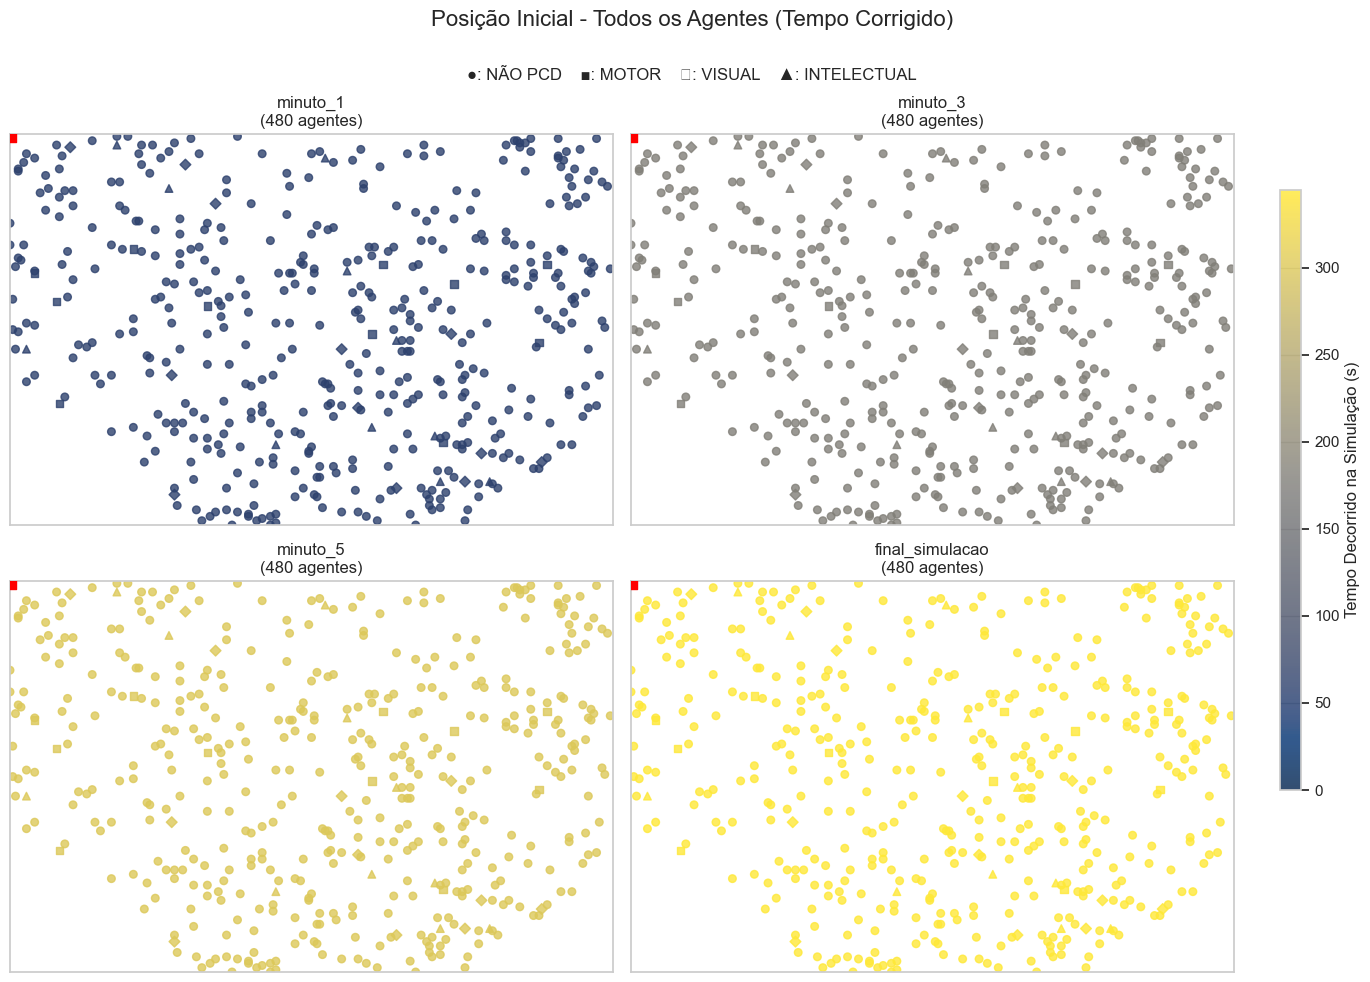


ANÁLISE DETALHADA - TODOS OS AGENTES

minuto_1:
  Total de agentes: 480
  Evacuados: 59
  Não evacuados: 421
  Time_spent (ticks): min=10.0, max=90.0
  Time_s (segundos): min=6.7, max=60.0
  Estatísticas por mobilidade:
    INTELLECTUAL: 11 agentes, tempo médio: 58.0s, evacuação: 18.2%
    MOTOR: 11 agentes, tempo médio: 58.9s, evacuação: 18.2%
    NON_PWD: 446 agentes, tempo médio: 57.1s, evacuação: 12.1%
    VISUAL: 12 agentes, tempo médio: 56.4s, evacuação: 8.3%

minuto_3:
  Total de agentes: 480
  Evacuados: 269
  Não evacuados: 211
  Time_spent (ticks): min=10.0, max=269.0
  Time_s (segundos): min=6.7, max=179.3
  Estatísticas por mobilidade:
    INTELLECTUAL: 11 agentes, tempo médio: 70.5s, evacuação: 45.5%
    MOTOR: 11 agentes, tempo médio: 84.8s, evacuação: 63.6%
    NON_PWD: 446 agentes, tempo médio: 84.4s, evacuação: 56.3%
    VISUAL: 12 agentes, tempo médio: 77.3s, evacuação: 50.0%

minuto_5:
  Total de agentes: 480
  Evacuados: 446
  Não evacuados: 34
  Time_spent (ticks)

In [350]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Configurações da simulação
step_length = 1.0                # metros por movimento/step
base_speed = 1.5                 # m/s
time_per_step = step_length / base_speed    # segundos por step de simulação

report_folders = ["minuto_1", "minuto_3", "minuto_5", "final_simulacao"]
base_path = Path("reports/no_landslide")

# Tempo decorrido na simulação para cada momento (em segundos)
simulation_elapsed_time = {
    "minuto_1": 60,
    "minuto_3": 180,
    "minuto_5": 300,
    "final_simulacao": 344.7  # Ajuste se necessário
}

# --- Step 1: Carregar arquivos mais recentes ---
latest_files = {}
try:
    for folder in report_folders:
        folder_path = base_path / folder
        all_csvs = list(folder_path.glob("*.csv"))
        latest_file = min(all_csvs, key=os.path.getmtime)
        latest_files[folder] = latest_file
        print(f"{folder}: {latest_file.name}")
except Exception as e:
    print(f"Erro ao encontrar arquivos: {e}")
    exit()

# --- Step 2: Carregar e processar dados ---
dataframes = {}
for folder in report_folders:
    file = latest_files[folder]
    df = pd.read_csv(file)
    
    # Conversões necessárias
    df['evacuated'] = df['evacuated'].astype(bool)
    df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce')
    df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
    df['steps'] = pd.to_numeric(df['steps'], errors='coerce')
    
    # Cálculos derivados
    df['distance_m'] = df['distance'] * step_length
    df['time_s'] = df['time_spent'] * time_per_step
    df['velocity_m_s'] = np.where(df['time_s'] > 0, df['distance_m'] / df['time_s'], 0)
    
    dataframes[folder] = df
    
    # Diagnóstico dos dados
    print(f"\n=== {folder} ===")
    print(f"Total de agentes: {len(df)}")
    print(f"Evacuados: {len(df[df['evacuated'] == True])}")
    print(f"Não evacuados: {len(df[df['evacuated'] == False])}")
    print(f"time_spent (ticks) - min: {df['time_spent'].min():.1f}, max: {df['time_spent'].max():.1f}")
    print(f"time_s (segundos) - min: {df['time_s'].min():.1f}, max: {df['time_s'].max():.1f}")
    print(f"Tempo decorrido na simulação: {simulation_elapsed_time[folder]} segundos")
    
    # Mostrar agentes com tempo individual muito alto (possível problema)
    high_time_agents = df[df['time_s'] > simulation_elapsed_time[folder]]
    if len(high_time_agents) > 0:
        print(f"⚠️  {len(high_time_agents)} agentes com time_s > tempo da simulação")

# --- Step 3: Plotar os dados corrigidos ---
mobility_markers = {
    "NON_PWD": "o", "MOTOR": "s", "VISUAL": "D", "INTELLECTUAL": "^"
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Inicial - Todos os Agentes", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTOR    ◆: VISUAL    ▲: INTELECTUAL",
         ha='center', fontsize=12)

# Determinar o range global para a cor (baseado no tempo decorrido da simulação)
vmin, vmax = 0, max(simulation_elapsed_time.values())

sc_for_colorbar = None

for i, folder in enumerate(report_folders):
    df = dataframes[folder]
    ax = axes[i // 2, i % 2]
    
    # Tempo decorrido na simulação para este momento
    elapsed_time = simulation_elapsed_time[folder]

    if df.empty:
        ax.text(0.5, 0.5, "Nenhum agente", ha='center', va='center', 
                transform=ax.transAxes, fontsize=12)
        ax.set_xlim(0, 220)
        ax.set_ylim(0, 180)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(folder)
        continue

    # Extrair coordenadas x, y da posição inicial
    df[['x', 'y']] = df['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    
    # Plotar por tipo de mobilidade
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            # CORREÇÃO: usar o tempo decorrido da simulação para TODOS os agentes
            # Todos os agentes no mesmo momento têm a mesma cor
            time_color = [elapsed_time] * len(sub)
            sc = ax.scatter(sub['x'], sub['y'], c=time_color, cmap='cividis',
                           s=30, alpha=0.8, marker=marker, vmin=vmin, vmax=vmax)
            if sc_for_colorbar is None:
                sc_for_colorbar = sc

    # Marcar zona segura
    ax.scatter(0, 179, color='red', s=80, marker='s', label='Zona Segura', zorder=10)
    ax.set_xlim(0, 220)
    ax.set_ylim(0, 180)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{folder}\n({len(df)} agentes)")

# Adicionar colorbar
if sc_for_colorbar:
    cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
    cbar = fig.colorbar(sc_for_colorbar, cax=cbar_ax, label="Tempo Decorrido na Simulação (s)")

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# --- Análise adicional ---
print("\n" + "="*50)
print("ANÁLISE DETALHADA - TODOS OS AGENTES")
print("="*50)

for folder in report_folders:
    df = dataframes[folder]
    
    print(f"\n{folder}:")
    print(f"  Total de agentes: {len(df)}")
    print(f"  Evacuados: {len(df[df['evacuated'] == True])}")
    print(f"  Não evacuados: {len(df[df['evacuated'] == False])}")
    
    if len(df) > 0:
        print(f"  Time_spent (ticks): min={df['time_spent'].min():.1f}, max={df['time_spent'].max():.1f}")
        print(f"  Time_s (segundos): min={df['time_s'].min():.1f}, max={df['time_s'].max():.1f}")
        
        # Análise por tipo de mobilidade
        mobility_stats = df.groupby('mobility_type').agg({
            'time_s': ['mean', 'std', 'count'],
            'evacuated': lambda x: (x == True).sum()
        }).round(2)
        
        print(f"  Estatísticas por mobilidade:")
        for mob_type in mobility_stats.index:
            count = mobility_stats.loc[mob_type, ('time_s', 'count')]
            mean_time = mobility_stats.loc[mob_type, ('time_s', 'mean')]
            evacuated_count = mobility_stats.loc[mob_type, ('evacuated', '<lambda>')]
            evacuation_rate = (evacuated_count / count) * 100 if count > 0 else 0
            print(f"    {mob_type}: {count} agentes, tempo médio: {mean_time:.1f}s, evacuação: {evacuation_rate:.1f}%")

minuto_1: minute_1_report_20250531-211007.csv
minuto_3: minute_3_report_20250531-211532.csv
minuto_5: minute_5_report_20250531-211615.csv
final_simulacao: all_done_report_20250531-211616.csv

=== minuto_1 ===
Agentes não evacuados: 421
time_spent (ticks) - min: 90.0, max: 90.0
time_s (segundos) - min: 60.0, max: 60.0
Tempo máximo esperado: 60 segundos

=== minuto_3 ===
Agentes não evacuados: 211
time_spent (ticks) - min: 90.0, max: 199.0
time_s (segundos) - min: 60.0, max: 132.7
Tempo máximo esperado: 180 segundos

=== minuto_5 ===
Agentes não evacuados: 34
time_spent (ticks) - min: 90.0, max: 199.0
time_s (segundos) - min: 60.0, max: 132.7
Tempo máximo esperado: 300 segundos

=== final_simulacao ===
Agentes não evacuados: 1
time_spent (ticks) - min: 199.0, max: 199.0
time_s (segundos) - min: 132.7, max: 132.7
Tempo máximo esperado: 344.7 segundos


/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/283519090.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


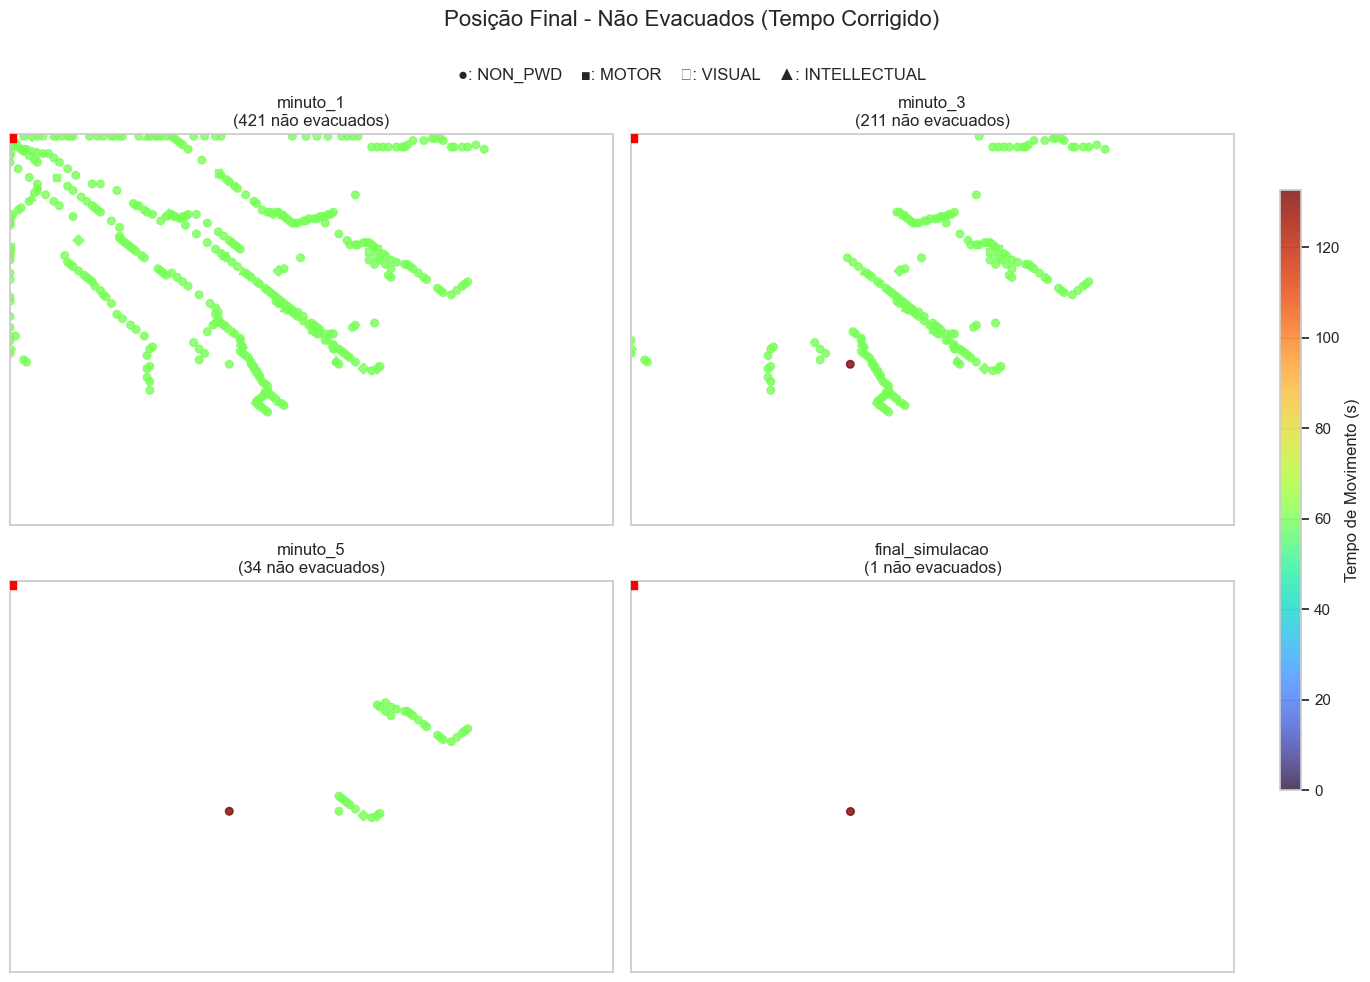


ANÁLISE DAS POSIÇÕES FINAIS

minuto_1:
  Agentes não evacuados: 421
  Tempo de movimento - min: 60.0s, max: 60.0s
  Distância percorrida - min: 0.0m, max: 115.3m
  Velocidade média - min: 0.00m/s, max: 1.92m/s
  Por tipo de mobilidade:
    INTELLECTUAL: 9 agentes, tempo: 60.0s, distância: 67.3m, vel: 1.12m/s
    MOTOR: 9 agentes, tempo: 60.0s, distância: 71.4m, vel: 1.19m/s
    NON_PWD: 392 agentes, tempo: 60.0s, distância: 72.9m, vel: 1.21m/s
    VISUAL: 11 agentes, tempo: 60.0s, distância: 70.9m, vel: 1.18m/s
  ⚠️  1 agentes com movimento < 5m (possível 'stuck')
     Principais posições finais:
       (80, 74): 1 agentes

minuto_3:
  Agentes não evacuados: 211
  Tempo de movimento - min: 60.0s, max: 132.7s
  Distância percorrida - min: 0.0m, max: 210.6m
  Velocidade média - min: 0.00m/s, max: 3.51m/s
  Por tipo de mobilidade:
    INTELLECTUAL: 6 agentes, tempo: 60.0s, distância: 160.3m, vel: 2.67m/s
    MOTOR: 4 agentes, tempo: 60.0s, distância: 150.0m, vel: 2.50m/s
    NON_PWD: 195

minuto_1: minute_1_report_20250531-211007.csv
minuto_3: minute_3_report_20250531-211532.csv
minuto_5: minute_5_report_20250531-211615.csv
final_simulacao: all_done_report_20250531-211616.csv

=== minuto_1 ===
Agentes não evacuados: 421
Distância percorrida - min: 0.0m, max: 115.3m
Velocidade média - min: 0.00m/s, max: 1.92m/s

=== minuto_3 ===
Agentes não evacuados: 211
Distância percorrida - min: 0.0m, max: 210.6m
Velocidade média - min: 0.00m/s, max: 3.51m/s

=== minuto_5 ===
Agentes não evacuados: 34
Distância percorrida - min: 0.0m, max: 231.9m
Velocidade média - min: 0.00m/s, max: 3.87m/s

=== final_simulacao ===
Agentes não evacuados: 1
Distância percorrida - min: 0.0m, max: 0.0m
Velocidade média - min: 0.00m/s, max: 0.00m/s


/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/377822534.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.93])


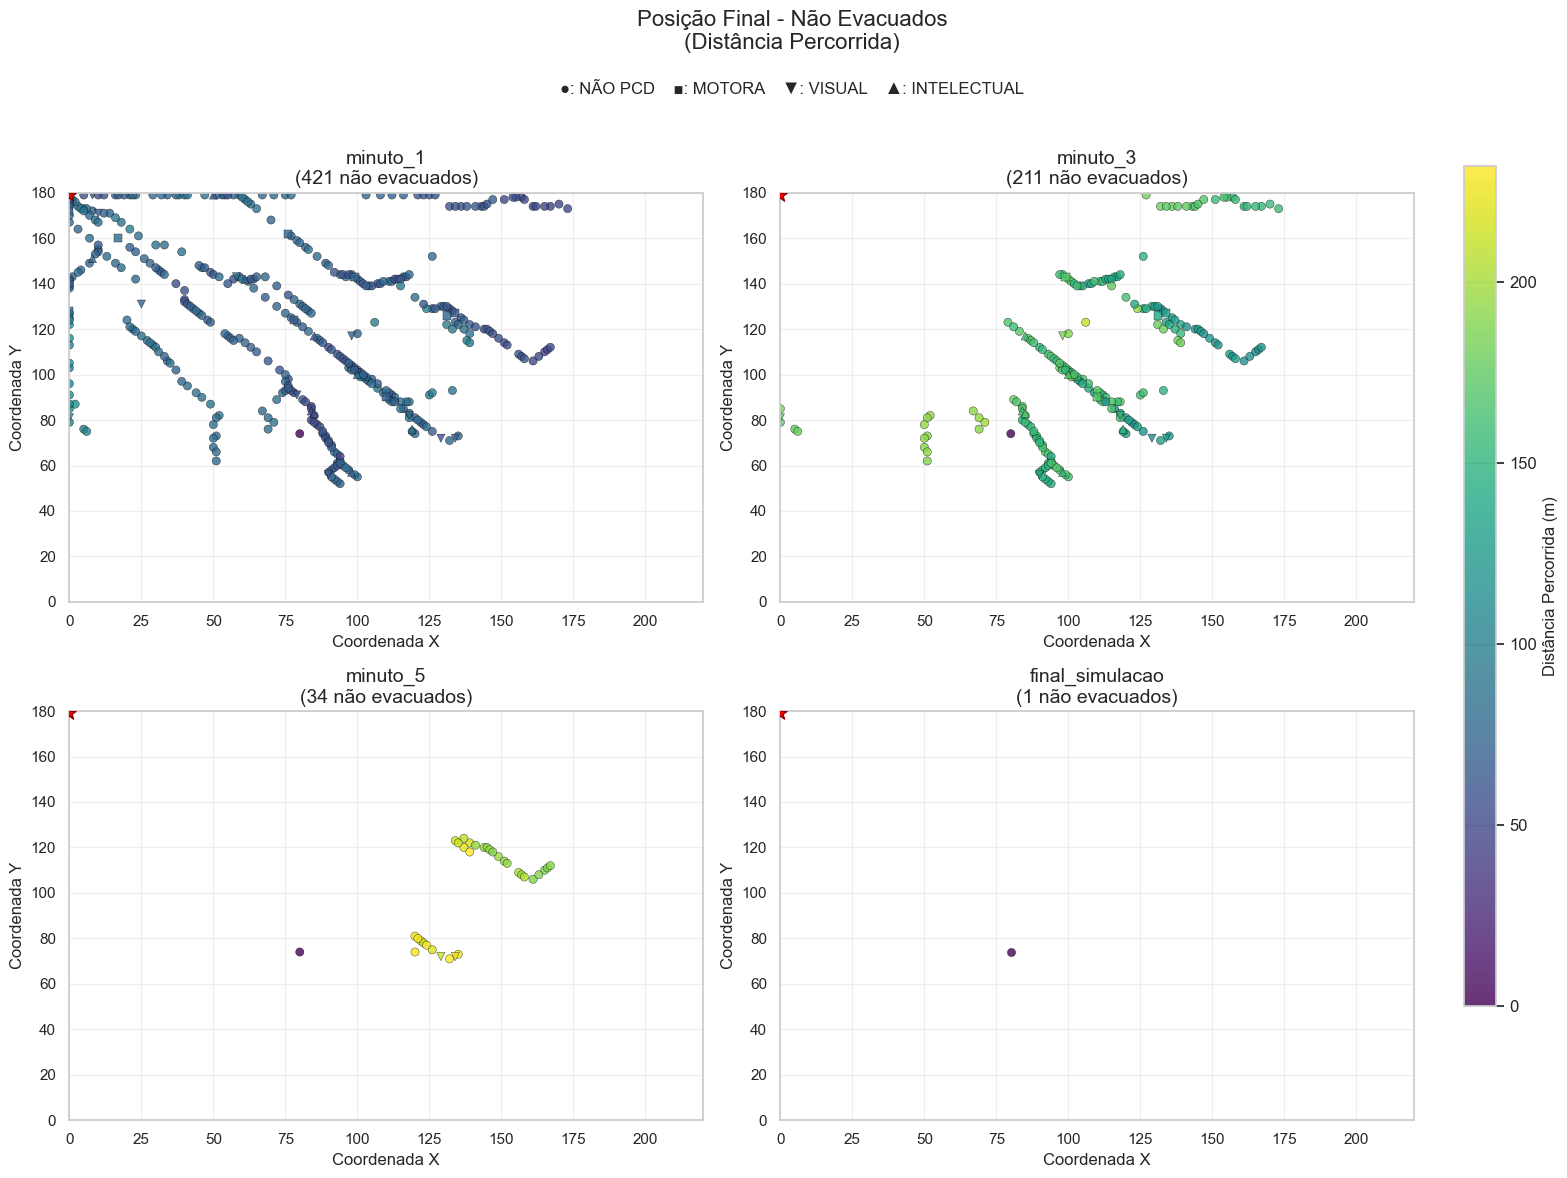


ANÁLISE ESTATÍSTICA DETALHADA

minuto_1:
  Agentes não evacuados: 421
  Distância percorrida (m):
    Min: 0.0m
    Max: 115.3m
    Média: 72.7m
    Mediana: 73.2m
    Q1 (25%): 64.0m
    Q3 (75%): 80.7m
  Agentes com baixa mobilidade (≤64.0m): 106 (25.2%)
  Agentes com alta mobilidade (≥80.7m): 106 (25.2%)
  Por tipo de mobilidade:
    INTELLECTUAL: 9 agentes
      Distância média: 67.3m (mediana: 66.8m)
      Velocidade média: 1.12m/s
    MOTOR: 9 agentes
      Distância média: 71.4m (mediana: 71.1m)
      Velocidade média: 1.19m/s
    NON_PWD: 392 agentes
      Distância média: 72.9m (mediana: 73.5m)
      Velocidade média: 1.21m/s
    VISUAL: 11 agentes
      Distância média: 70.9m (mediana: 69.3m)
      Velocidade média: 1.18m/s
  Regiões com agentes de baixa mobilidade:
    Região (80-100, 60-80): 12 agentes
    Região (140-160, 160-180): 8 agentes
    Região (140-160, 100-120): 8 agentes

minuto_3:
  Agentes não evacuados: 211
  Distância percorrida (m):
    Min: 0.0m
    Max: 

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/377822534.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_mobility['region_x'] = (low_mobility['x'] // 20) * 20  # Grupos de 20 unidades
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/377822534.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_mobility['region_y'] = (low_mobility['y'] // 20) * 20
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/377822534.py:186: SettingWithCopyWarning: 
A val

In [366]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Configurações da simulação
step_length = 1.0                # metros por movimento/step
base_speed = 1.5                 # m/s
time_per_step = step_length / base_speed    # segundos por step de simulação

report_folders = ["minuto_1", "minuto_3", "minuto_5", "final_simulacao"]
base_path = Path("reports/no_landslide")

# --- Step 1: Carregar arquivos mais recentes ---
latest_files = {}
try:
    for folder in report_folders:
        folder_path = base_path / folder
        all_csvs = list(folder_path.glob("*.csv"))
        latest_file = min(all_csvs, key=os.path.getmtime)
        latest_files[folder] = latest_file
        print(f"{folder}: {latest_file.name}")
except Exception as e:
    print(f"Erro ao encontrar arquivos: {e}")
    exit()

# --- Step 2: Carregar e processar dados ---
dataframes = {}
for folder in report_folders:
    file = latest_files[folder]
    df = pd.read_csv(file)
    
    # Filtrar apenas não evacuados
    df = df[df["evacuated"] != True].copy()
    
    if df.empty:
        dataframes[folder] = df
        print(f"\n=== {folder} ===")
        print("Todos os agentes foram evacuados!")
        continue
    
    # Conversões necessárias
    df['evacuated'] = df['evacuated'].astype(bool)
    df['time_spent'] = pd.to_numeric(df['time_spent'], errors='coerce')
    df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
    df['steps'] = pd.to_numeric(df['steps'], errors='coerce')
    
    # Cálculos derivados
    df['distance_m'] = df['distance'] * step_length
    df['time_s'] = df['time_spent'] * time_per_step
    df['velocity_m_s'] = np.where(df['time_s'] > 0, df['distance_m'] / df['time_s'], 0)
    
    # Extrair coordenadas x, y da posição final
    df[['x', 'y']] = df['final_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    
    dataframes[folder] = df
    
    # Diagnóstico dos dados
    print(f"\n=== {folder} ===")
    print(f"Agentes não evacuados: {len(df)}")
    print(f"Distância percorrida - min: {df['distance_m'].min():.1f}m, max: {df['distance_m'].max():.1f}m")
    print(f"Velocidade média - min: {df['velocity_m_s'].min():.2f}m/s, max: {df['velocity_m_s'].max():.2f}m/s")

# --- Step 3: Plotar com DISTÂNCIA como variável de cor ---
mobility_markers = {
    "NON_PWD": "o", "MOTOR": "s", "VISUAL": "v", "INTELLECTUAL": "^"
}

# Determinar o range global para distância
all_distances = []
for df in dataframes.values():
    if not df.empty:
        all_distances.extend(df['distance_m'].tolist())

if all_distances:
    vmin_dist, vmax_dist = 0, max(all_distances)
else:
    vmin_dist, vmax_dist = 0, 100

# Criar gráfico
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Posição Final - Não Evacuados\n(Distância Percorrida)", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ▼: VISUAL    ▲: INTELECTUAL",
         ha='center', fontsize=12)

sc_for_colorbar = None

for i, folder in enumerate(report_folders):
    df = dataframes[folder]
    ax = axes[i // 2, i % 2]

    if df.empty:
        ax.text(0.5, 0.5, "Todos evacuados", ha='center', va='center', 
                transform=ax.transAxes, fontsize=14, weight='bold')
        ax.set_xlim(0, 220)
        ax.set_ylim(0, 180)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(folder, fontsize=14)
        continue
    
    # Plotar por tipo de mobilidade usando DISTÂNCIA como cor
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['distance_m'], 
                           cmap='viridis', s=35, alpha=0.8, marker=marker,
                           vmin=vmin_dist, vmax=vmax_dist, edgecolors='black', linewidth=0.3)
            if sc_for_colorbar is None:
                sc_for_colorbar = sc

    # Marcar zona segura
    ax.scatter(0, 179, color='red', s=100, marker='*', 
               label='Zona Segura', zorder=10, edgecolors='darkred', linewidth=1)
    
    ax.set_xlim(0, 220)
    ax.set_ylim(0, 180)
    ax.set_xlabel('Coordenada X', fontsize=12)
    ax.set_ylabel('Coordenada Y', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_title(f"{folder}\n({len(df)} não evacuados)", fontsize=14)

# Adicionar colorbar
if sc_for_colorbar:
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sc_for_colorbar, cax=cbar_ax, label="Distância Percorrida (m)")
    cbar.ax.tick_params(labelsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 0.93])
plt.show()

# --- Análise estatística aprimorada ---
print("\n" + "="*70)
print("ANÁLISE ESTATÍSTICA DETALHADA")
print("="*70)

for folder in report_folders:
    df = dataframes[folder]
    
    if df.empty:
        print(f"\n{folder}: Todos evacuados!")
        continue
        
    print(f"\n{folder}:")
    print(f"  Agentes não evacuados: {len(df)}")
    print(f"  Distância percorrida (m):")
    print(f"    Min: {df['distance_m'].min():.1f}m")
    print(f"    Max: {df['distance_m'].max():.1f}m")
    print(f"    Média: {df['distance_m'].mean():.1f}m")
    print(f"    Mediana: {df['distance_m'].median():.1f}m")
    
    # Análise por quartis de distância
    q1 = df['distance_m'].quantile(0.25)
    q3 = df['distance_m'].quantile(0.75)
    print(f"    Q1 (25%): {q1:.1f}m")
    print(f"    Q3 (75%): {q3:.1f}m")
    
    # Identificar agentes com baixa mobilidade
    low_mobility = df[df['distance_m'] <= q1]
    high_mobility = df[df['distance_m'] >= q3]
    
    print(f"  Agentes com baixa mobilidade (≤{q1:.1f}m): {len(low_mobility)} ({len(low_mobility)/len(df)*100:.1f}%)")
    print(f"  Agentes com alta mobilidade (≥{q3:.1f}m): {len(high_mobility)} ({len(high_mobility)/len(df)*100:.1f}%)")
    
    # Análise por tipo de mobilidade
    print(f"  Por tipo de mobilidade:")
    mobility_stats = df.groupby('mobility_type').agg({
        'distance_m': ['count', 'mean', 'median', 'std'],
        'velocity_m_s': 'mean'
    }).round(2)
    
    for mob_type in mobility_stats.index:
        count = mobility_stats.loc[mob_type, ('distance_m', 'count')]
        mean_dist = mobility_stats.loc[mob_type, ('distance_m', 'mean')]
        median_dist = mobility_stats.loc[mob_type, ('distance_m', 'median')]
        mean_vel = mobility_stats.loc[mob_type, ('velocity_m_s', 'mean')]
        print(f"    {mob_type}: {count} agentes")
        print(f"      Distância média: {mean_dist:.1f}m (mediana: {median_dist:.1f}m)")
        print(f"      Velocidade média: {mean_vel:.2f}m/s")
    
    # Análise espacial - onde estão os agentes com menor mobilidade
    if len(low_mobility) > 0:
        print(f"  Regiões com agentes de baixa mobilidade:")
        # Agrupar por regiões aproximadas
        low_mobility['region_x'] = (low_mobility['x'] // 20) * 20  # Grupos de 20 unidades
        low_mobility['region_y'] = (low_mobility['y'] // 20) * 20
        
        regions = low_mobility.groupby(['region_x', 'region_y']).size().sort_values(ascending=False)
        for (x, y), count in regions.head(3).items():
            print(f"    Região ({x:.0f}-{x+20:.0f}, {y:.0f}-{y+20:.0f}): {count} agentes")

print("\n" + "="*70)
print("INTERPRETAÇÃO PARA SEU TCC:")
print("="*70)
print("1. A coloração por DISTÂNCIA revela padrões espaciais importantes")
print("2. Agentes com cores mais escuras (menor distância) podem indicar:")
print("   - Obstáculos locais que impedem movimento")
print("   - Gargalos de evacuação")
print("   - Problemas de pathfinding")
print("3. A uniformidade temporal confirma que o fator crítico é ESPACIAL, não temporal")
print("4. Diferentes tipos de mobilidade mostram padrões distintos de movimento")

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/2823845448.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


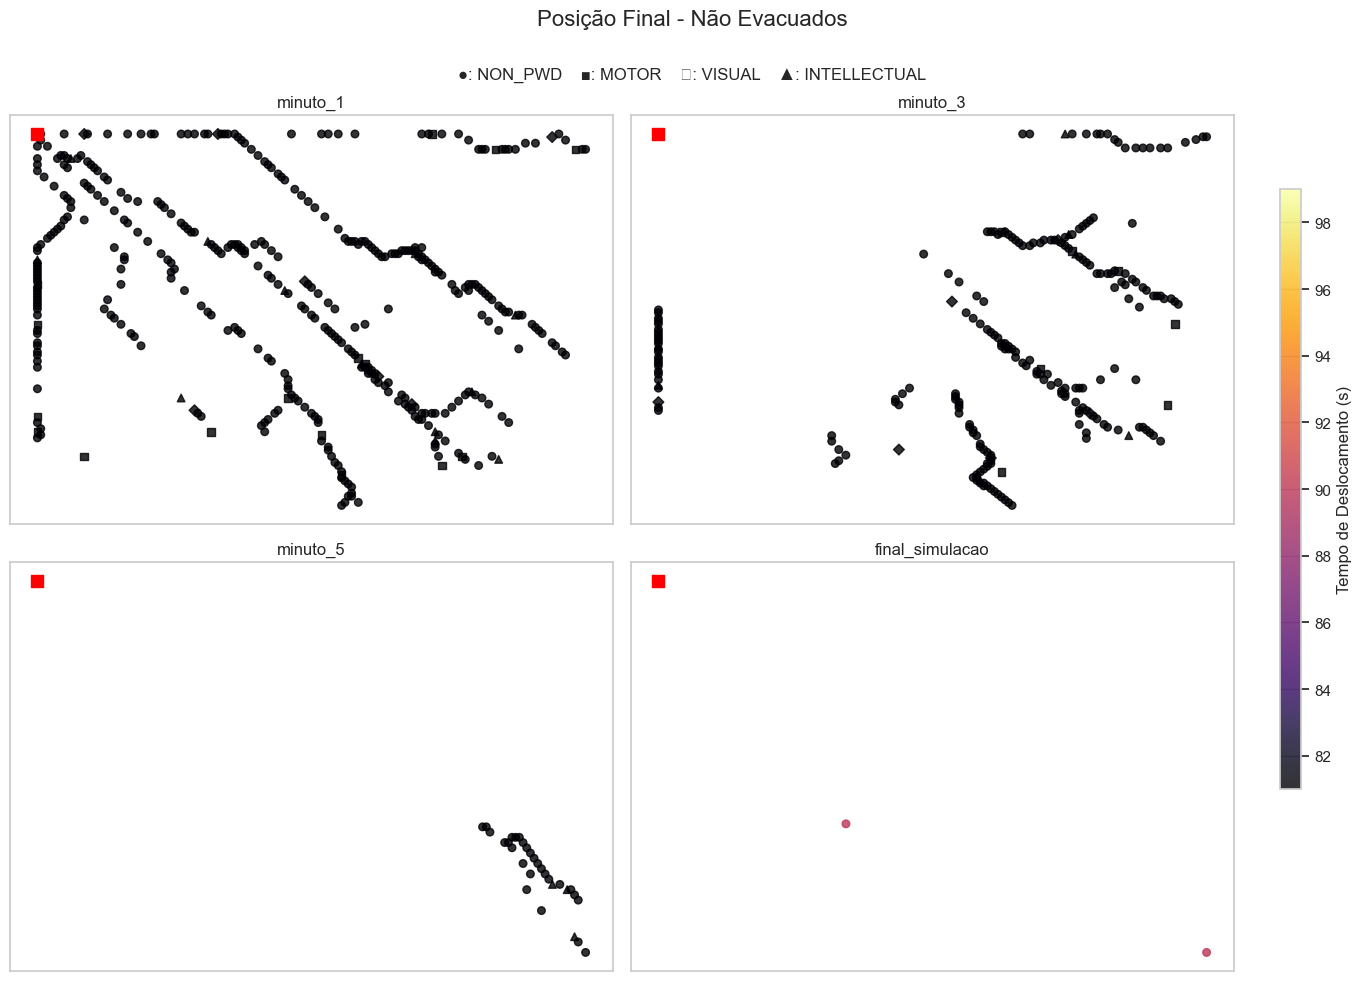

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1946588810.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


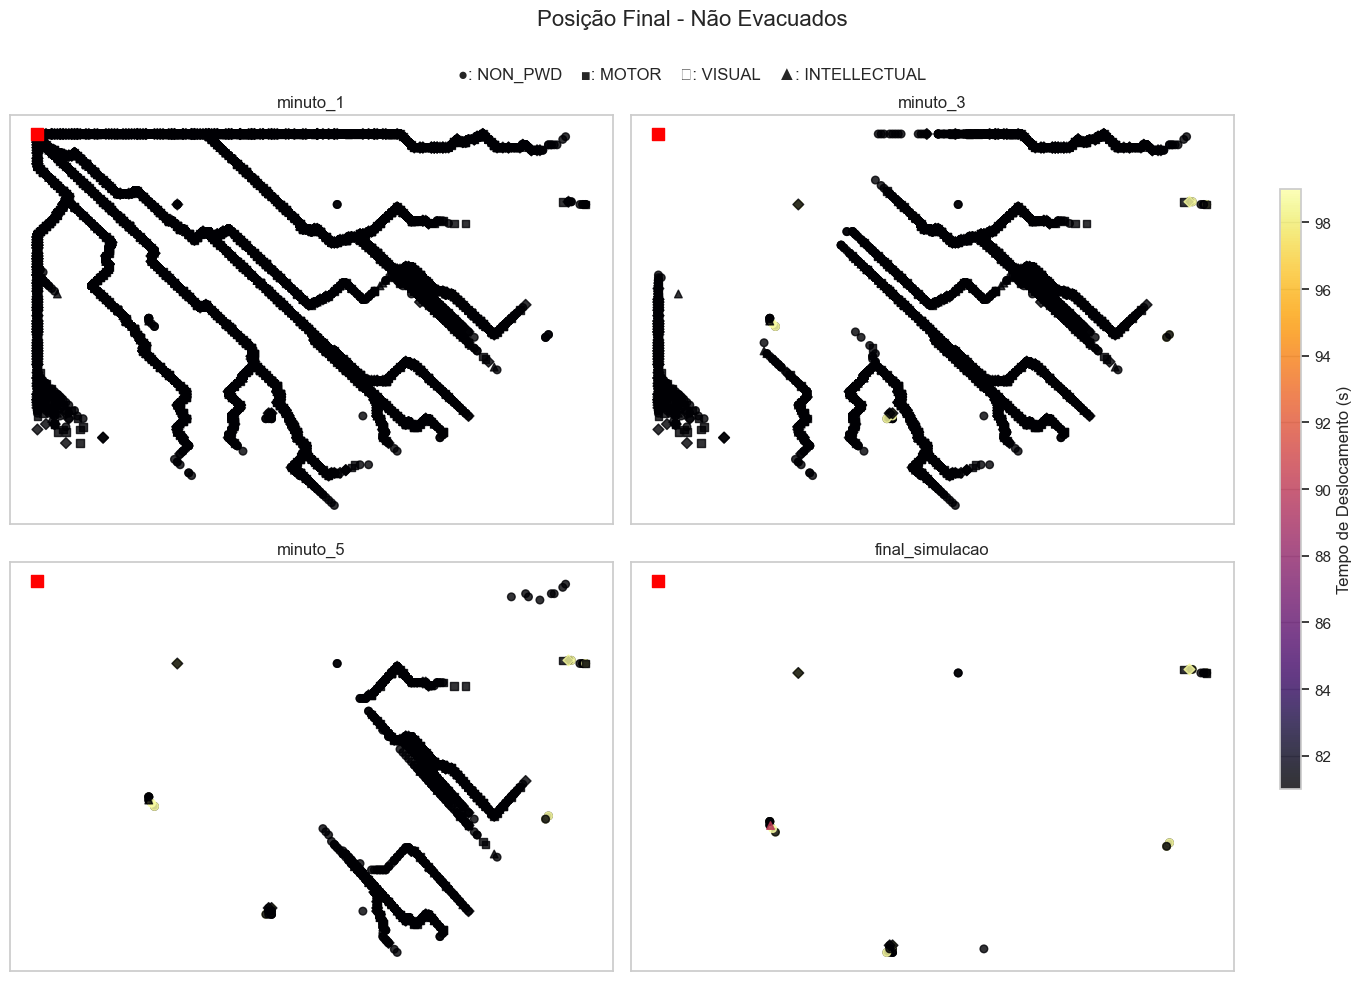

In [218]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Final - Não Evacuados", fontsize=16)
fig.text(0.5, 0.91, "●: NON_PWD    ■: MOTOR    ◆: VISUAL    ▲: INTELLECTUAL", ha='center', fontsize=12)

for i, folder in enumerate(report_folders):
    files = list((base_path / folder).glob("*.csv"))
    df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
    df = df[df["evacuated"] != True].copy()
    ax = axes[i // 2, i % 2]

    if df.empty:
        ax.text(0.5, 0.5, "Nenhum agente não evacuado", ha='center', va='center')
        ax.set_title(folder)
        ax.set_xticks([]); ax.set_yticks([])
        continue

    df[['x', 'y']] = df['final_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['time_spent'], cmap='inferno', s=30, alpha=0.8, marker=marker)

    ax.scatter(0, 179, color='red', s=80, marker='s', label='Safe Zone')
    ax.set_title(folder)
    ax.set_xticks([]); ax.set_yticks([])

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Tempo de Deslocamento (s)")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [200]:
summary_time_related = df_all_done.groupby('mobility_type').agg({
    'time_s':       'mean',
    'distance_m':   'mean',
    'steps':        'mean',
    'velocity_m_s': 'mean',
    'agent_id':     'count'
}).rename(columns={'agent_id':'count_agents'})

In [201]:
df_all_done[df_all_done['time_s'] == 0][['agent_id', 'mobility_type', 'distance_m', 'time_s', 'velocity_m_s']]

agent_id mobility_type  distance_m  time_s  velocity_m_s
5271        471       NON_PWD    1.414214     0.0           0.0
24583       103       NON_PWD    1.000000     0.0           0.0
37842       402       NON_PWD    1.000000     0.0           0.0

In [202]:
summary_time_related

time_s  distance_m       steps  velocity_m_s  count_agents
mobility_type                                                                
INTELLECTUAL   323.422682  151.679782  135.802548      0.517113          1413
MOTOR          325.950717  150.643218  134.665950      0.510760          1395
NON_PWD        312.635488  151.537817  135.193802      0.541708         43823
VISUAL         333.693389  153.170524  136.571950      0.502067          1369

In [203]:
total_agents = len(df_all_done)
evacuated_count = df_all_done['evacuated'].sum()
not_evacuated_count = total_agents - evacuated_count
impacted_count = df_all_done['impacted_by_landslide'].sum()
not_impacted_count = total_agents - impacted_count

In [204]:
summary_evacuation = pd.DataFrame({
    'metric': [
        'total_agents',
        'evacuated',
        'not_evacuated',
        'impacted_by_landslide',
        'not_impacted_by_landslide'
    ],
    'count': [
        total_agents,
        evacuated_count,
        not_evacuated_count,
        impacted_count,
        not_impacted_count
    ]
})

In [212]:
import pandas as pd
from pathlib import Path

# Folder path
folder = Path("reports/no_landslide/final_simulacao")

# Read and combine all CSV files
dfs = []
for file in folder.glob("*.csv"):
    df = pd.read_csv(file)
    dfs.append(df)

# Combine all into one DataFrame
all_data = pd.concat(dfs, ignore_index=True)

# Filter non-evacuated
non_evacuated = all_data[all_data["evacuated"] != True]

# Count how many are missing final_pos
missing_final_pos = non_evacuated["final_pos"].isna().sum()

print(f"Total non-evacuated agents: {len(non_evacuated)}")
print(f"Missing final_pos: {missing_final_pos}")


Total non-evacuated agents: 56
Missing final_pos: 0


In [205]:
summary_evacuation

metric  count
0               total_agents  48000
1                  evacuated  47944
2              not_evacuated     56
3      impacted_by_landslide      0
4  not_impacted_by_landslide  48000

## One risk area

### 1 minute

In [61]:
df_one_risk_area_minute_1 = load_report_data("one_risk_area/minute_1", step_length, time_per_step)

In [ ]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

In [ ]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

In [ ]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

In [ ]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agents Evacuated by Landslide Impact",
       xlabel="Evacuated", ylabel="Count")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

### 3 minutes

In [ ]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

In [ ]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

In [ ]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

In [ ]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agents Evacuated by Landslide Impact",
       xlabel="Evacuated", ylabel="Count")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

### 5 minutes

In [ ]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_minute_1, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

In [ ]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

In [ ]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

In [ ]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agents Evacuated by Landslide Impact",
       xlabel="Evacuated", ylabel="Count")
ax.legend(title="Impacted by Landslide")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

### End of simulation

In [278]:
df_one_risk_area_all_done = load_report_data("final_simulacao", step_length, time_per_step)

In [279]:
report_folders = ["minuto_1", "minuto_3", "final_simulacao"]

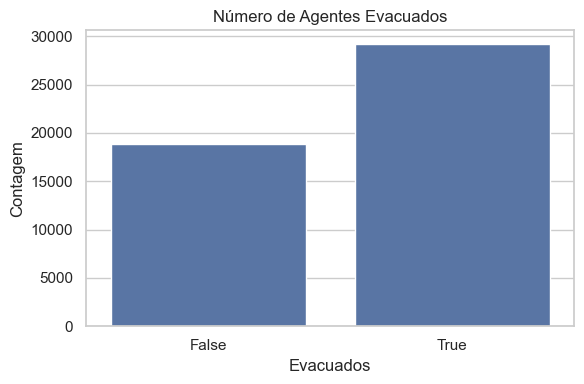

In [226]:
# 1. Histogram: evacuation status
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_one_risk_area_all_done, x='evacuated', ax=ax)
ax.set(title="Número de Agentes Evacuados", xlabel="Evacuados", ylabel="Contagem")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_count.png")
plt.show()
plt.close(fig)

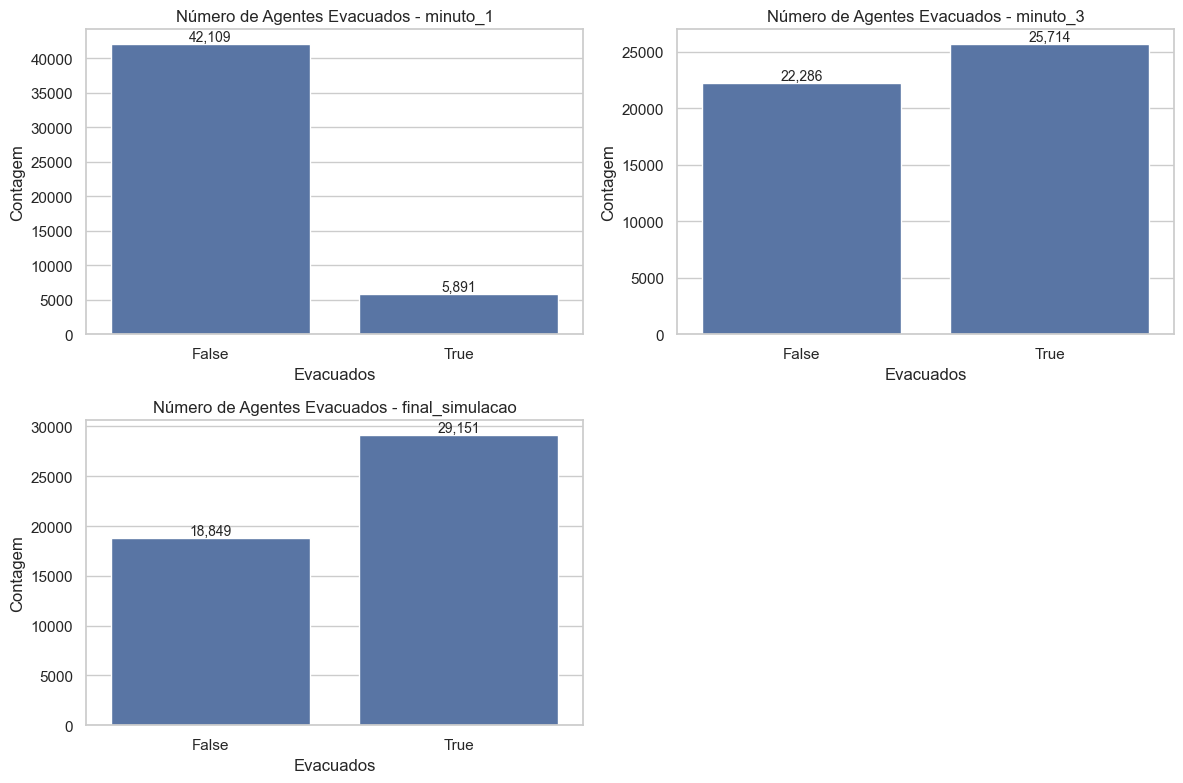

In [235]:
# Create enough axes — always a 2x2 grid, then hide extras
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    sns.countplot(data=df, x='evacuated', order=[False, True], ax=ax)

    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f"{count:,}", 
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10)

    ax.set(title=f"Número de Agentes Evacuados - {folder}", xlabel="Evacuados", ylabel="Contagem")

# Hide any unused subplot axes
for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_evacuated_count_LINEAR.png")
plt.show()
plt.close(fig)


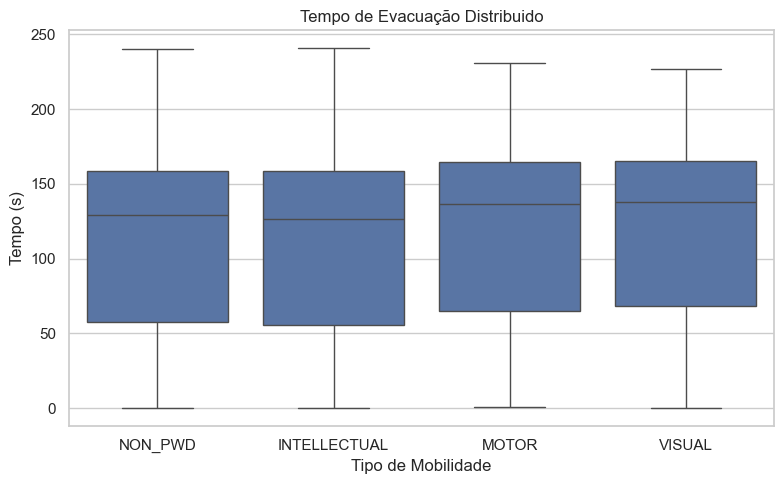

In [72]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_one_risk_area_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

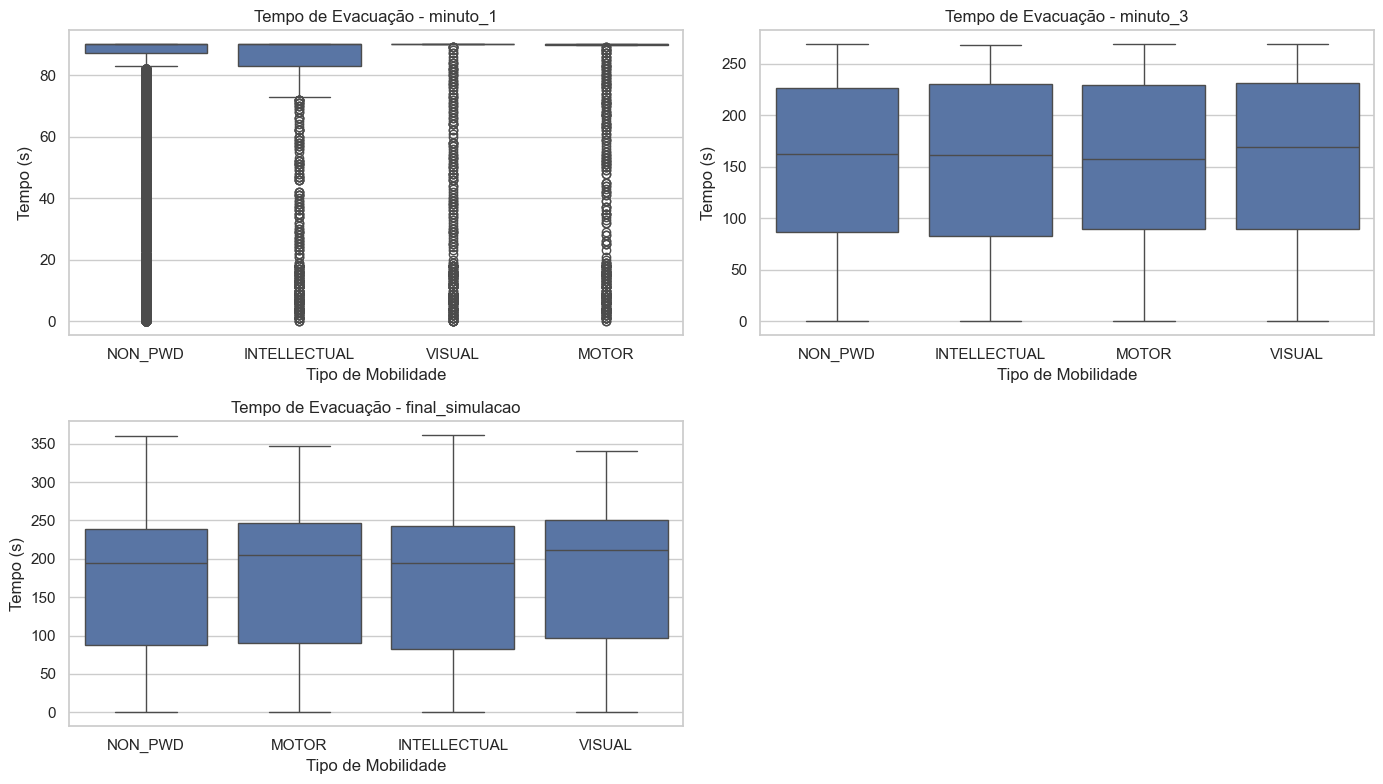

In [237]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'mobility_type' in df.columns and 'time_s' in df.columns and not df.empty:
        sns.boxplot(data=df, x='mobility_type', y='time_s', ax=ax)
        ax.set(title=f"Tempo de Evacuação - {folder}", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set(title=f"Tempo de Evacuação - {folder}")

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_boxplot_time.png")
plt.show()
plt.close(fig)


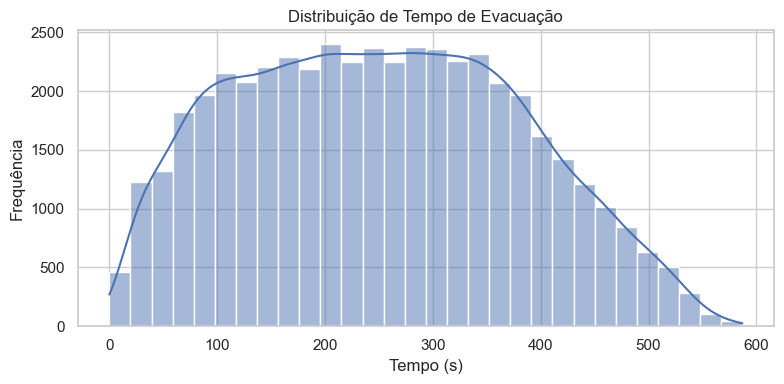

In [249]:
# 3) Distribution of Evacuation Time (histogram) *
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_one_risk_area_all_done, x='time_s', bins=30, kde=True, ax=ax)
ax.set(title="Distribuição de Tempo de Evacuação", xlabel="Tempo (s)", ylabel="Frequência")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "hist_time.png")
plt.close(fig)

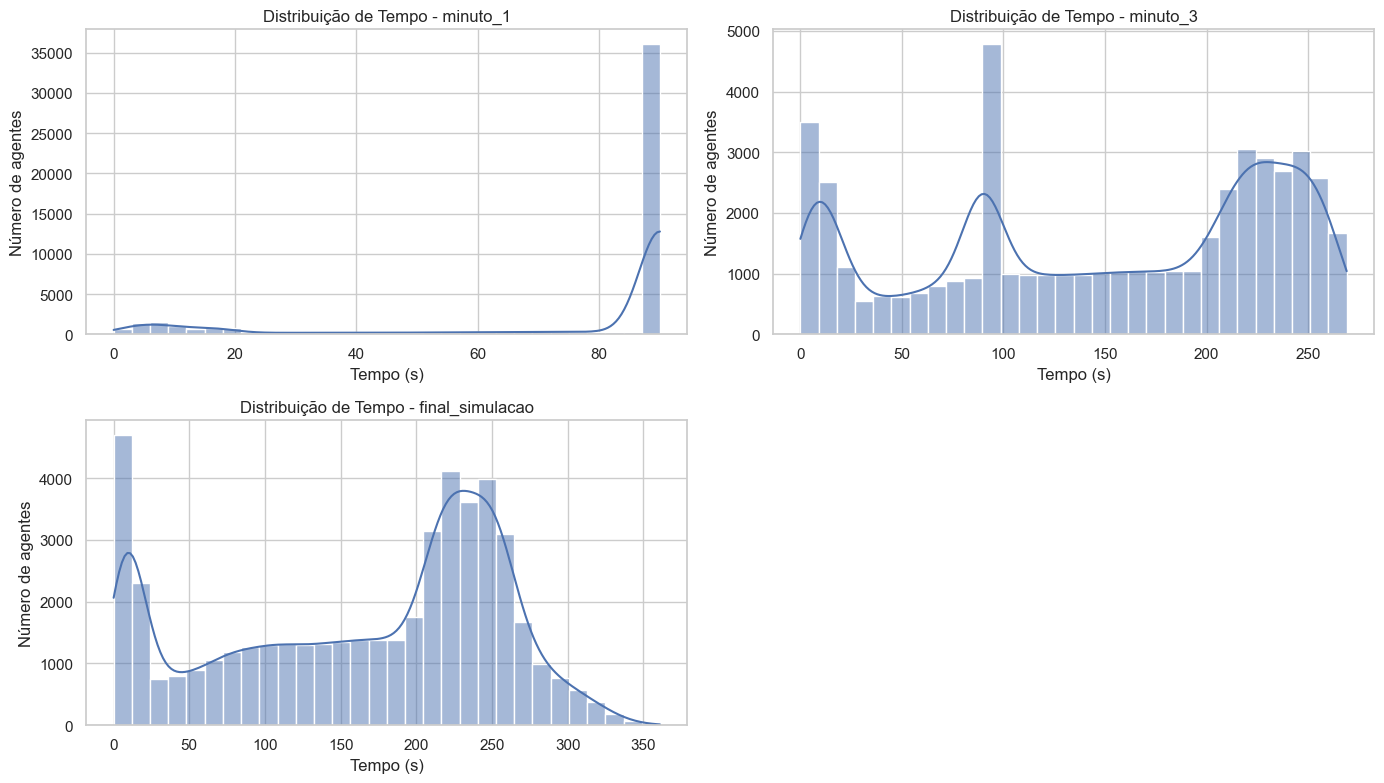

In [238]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'time_s' in df.columns and not df['time_s'].dropna().empty:
        sns.histplot(data=df, x='time_s', bins=30, kde=True, ax=ax)
        ax.set(title=f"Distribuição de Tempo - {folder}", xlabel="Tempo (s)", ylabel="Número de agentes")
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set(title=f"Distribuição de Tempo - {folder}")

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_hist_time.png")
plt.show()
plt.close(fig)

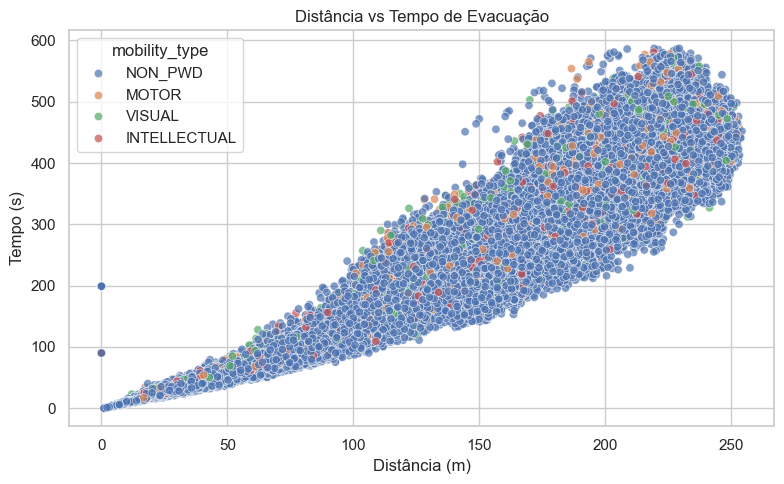

In [239]:
# 5) Distance vs. Time (scatter)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_one_risk_area_all_done, x='distance_m', y='time_s', hue='mobility_type', alpha=0.7, ax=ax)
ax.set(title="Distância vs Tempo de Evacuação", xlabel="Distância (m)", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "scatter_dist_vs_time.png")
plt.close(fig)

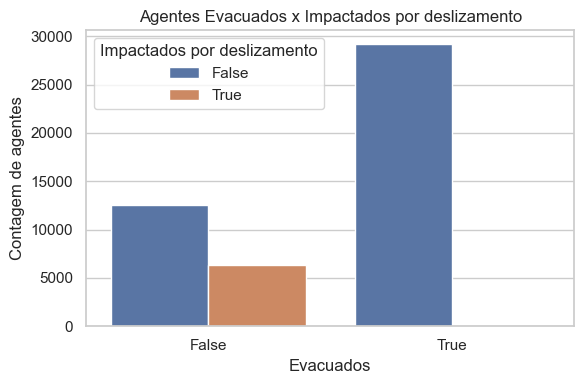

In [258]:
# 6) Evacuation Count by Landslide Impact (hue)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_one_risk_area_all_done, x='evacuated', hue='impacted_by_landslide', ax=ax)
ax.set(title="Agentes Evacuados x Impactados por deslizamento",
       xlabel="Evacuados", ylabel="Contagem de agentes")
ax.legend(title="Impactados por deslizamento")
fig.tight_layout()
fig.savefig(download_dir / "evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

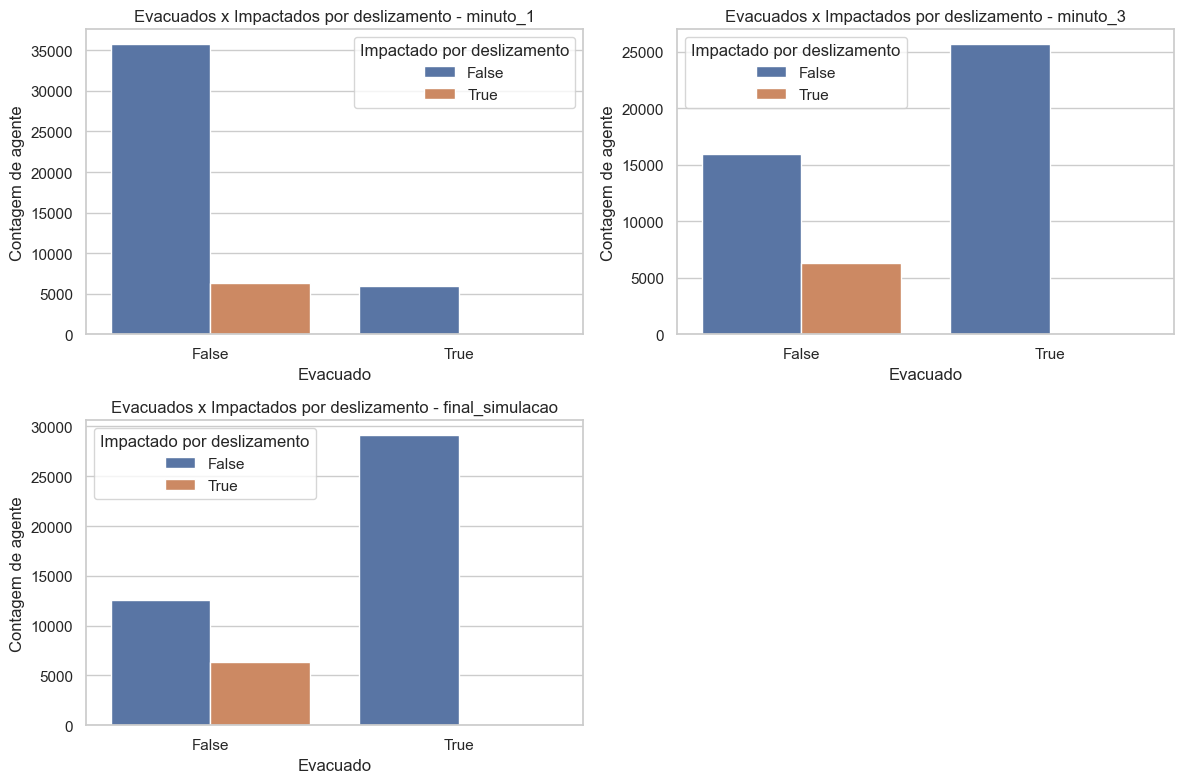

In [257]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'evacuated' in df.columns and 'impacted_by_landslide' in df.columns:
        sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
        ax.set(title=f"Evacuados x Impactados por deslizamento - {folder}",
               xlabel="Evacuado", ylabel="Contagem de agente")
        ax.legend(title="Impactado por deslizamento")
    else:
        ax.text(0.5, 0.5, "No data", ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3987145929.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


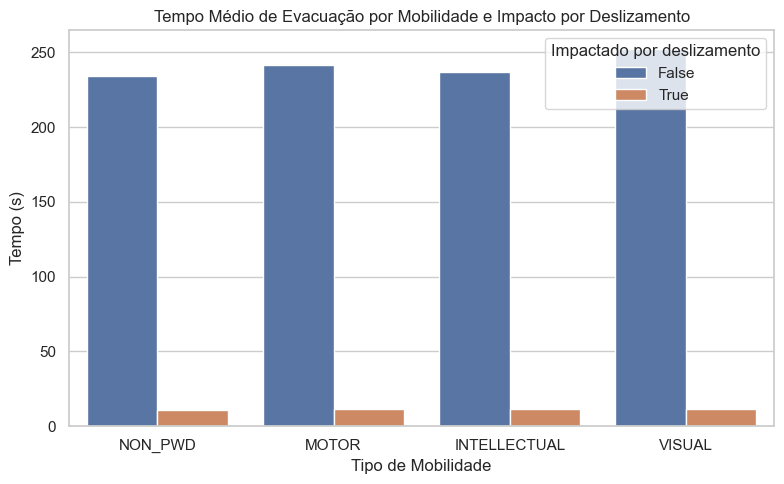

In [259]:
# 7) Average Evacuation Time by Mobility & Landslide Impact
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    data=df_one_risk_area_all_done, x='mobility_type', y='time_s',
    hue='impacted_by_landslide', ci=None, ax=ax
)
ax.set(title="Tempo Médio de Evacuação por Mobilidade e Impacto por Deslizamento",
       xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
ax.legend(title="Impactado por deslizamento")
fig.tight_layout()
fig.savefig(download_dir / "avg_time_by_landslide.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1967549854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1967549854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1967549854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


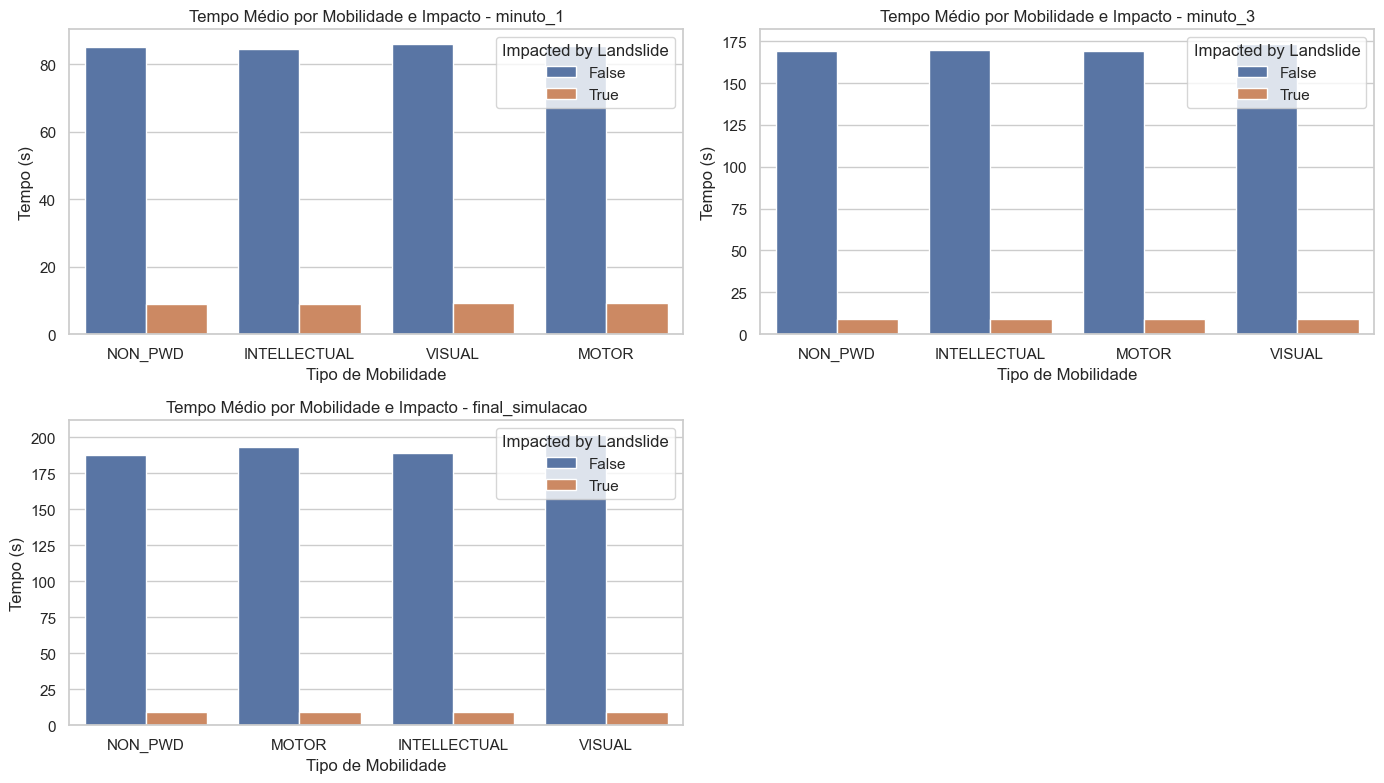

In [245]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'mobility_type' in df.columns and 'time_s' in df.columns and 'impacted_by_landslide' in df.columns:
        sns.barplot(
            data=df, x='mobility_type', y='time_s',
            hue='impacted_by_landslide', ci=None, ax=ax
        )
        ax.set(title=f"Tempo Médio por Mobilidade e Impacto - {folder}",
               xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
        ax.legend(title="Impacted by Landslide")
    else:
        ax.text(0.5, 0.5, "No data", ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_avg_time_by_landslide.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/4247258491.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


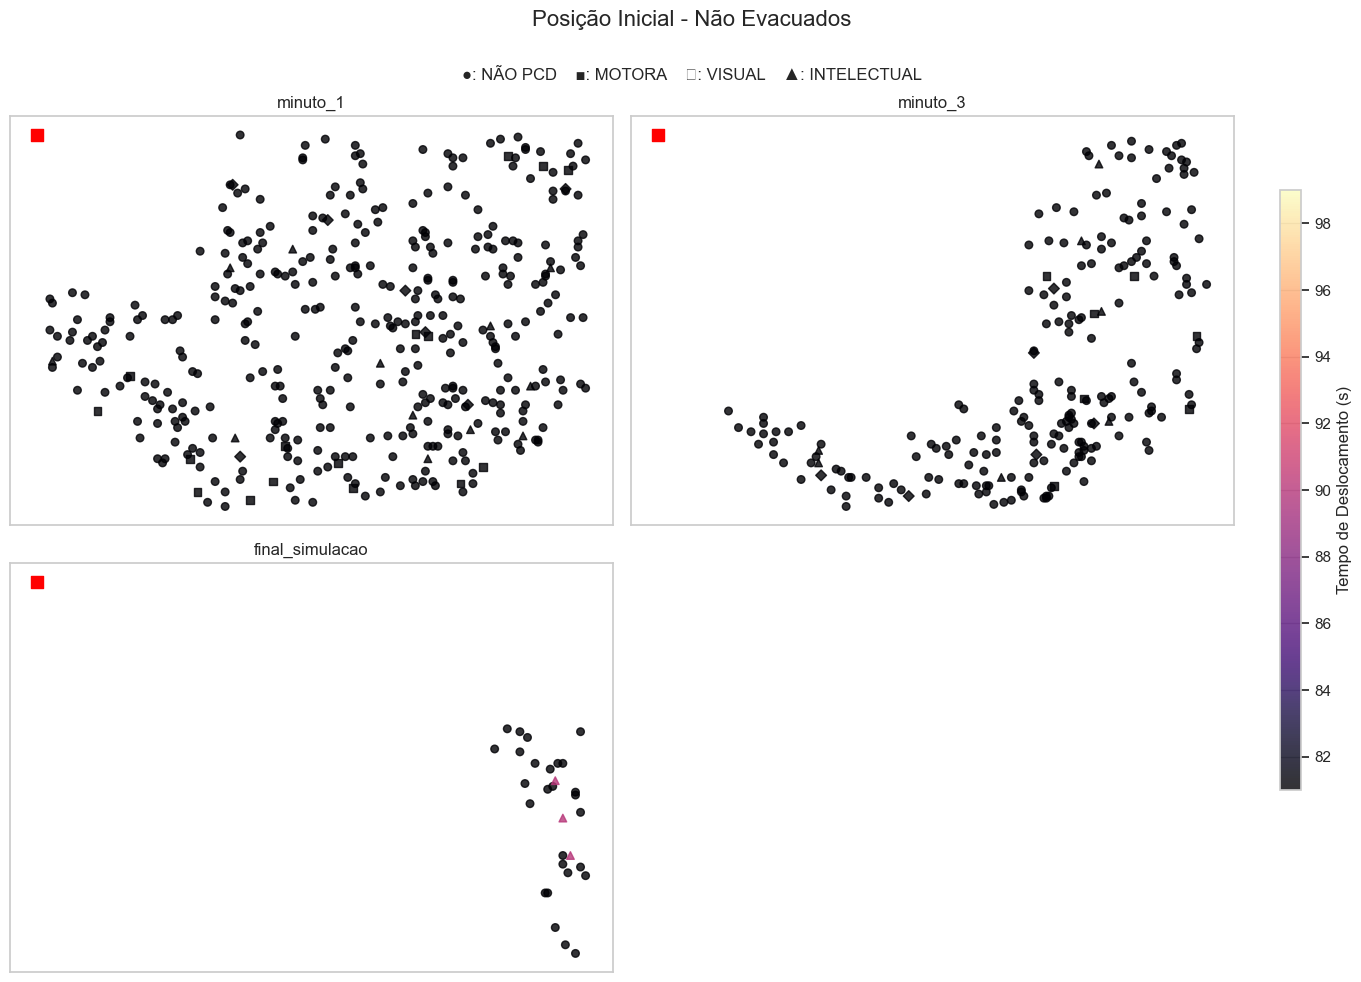

In [277]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Inicial - Não Evacuados", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ◆: VISUAL    ▲: INTELECTUAL", ha='center', fontsize=12)
axes = axes.flatten()

for i, (folder, file) in enumerate(zip(report_folders, csv_files)):
    df = pd.read_csv(file)
    df = df[df["evacuated"] != True].copy()
    ax = axes[i]

    if df.empty:
        ax.text(0.5, 0.5, "Nenhum agente não evacuado", ha='center', va='center')
        ax.set_title(folder)
        ax.set_xticks([]); ax.set_yticks([])
        continue

    df[['x', 'y']] = df['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['time_spent'], cmap='magma', s=30, alpha=0.8, marker=marker)

    ax.scatter(0, 179, color='red', s=80, marker='s', label='Safe Zone')
    ax.set_title(folder)
    ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Tempo de Deslocamento (s)")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3057635549.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


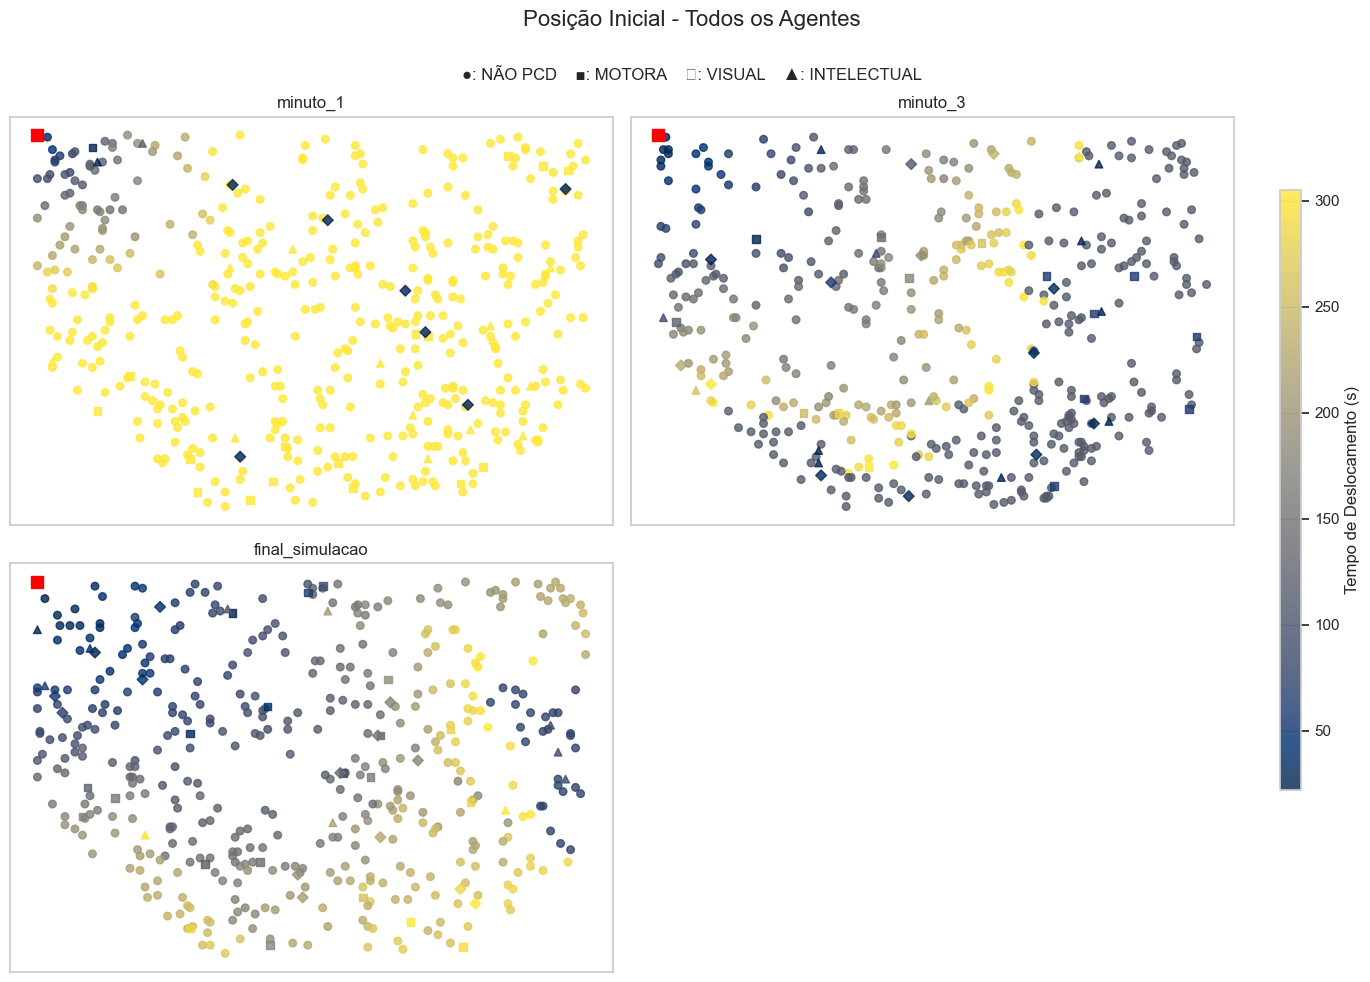

In [276]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Inicial - Todos os Agentes", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ◆: VISUAL    ▲: INTELECTUAL", ha='center', fontsize=12)
axes = axes.flatten()

for i, (folder, file) in enumerate(zip(report_folders, csv_files)):
    df = pd.read_csv(file)
    ax = axes[i]

    if "start_pos" not in df.columns or "time_spent" not in df.columns:
        ax.text(0.5, 0.5, "Dados ausentes", ha='center', va='center')
        ax.set_title(folder)
        ax.set_xticks([]); ax.set_yticks([])
        continue

    df[['x', 'y']] = df['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['time_spent'], cmap='cividis', s=30, alpha=0.8, marker=marker)

    ax.scatter(0, 179, color='red', s=80, marker='s', label='Safe Zone')
    ax.set_title(folder)
    ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Tempo de Deslocamento (s)")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/408415662.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


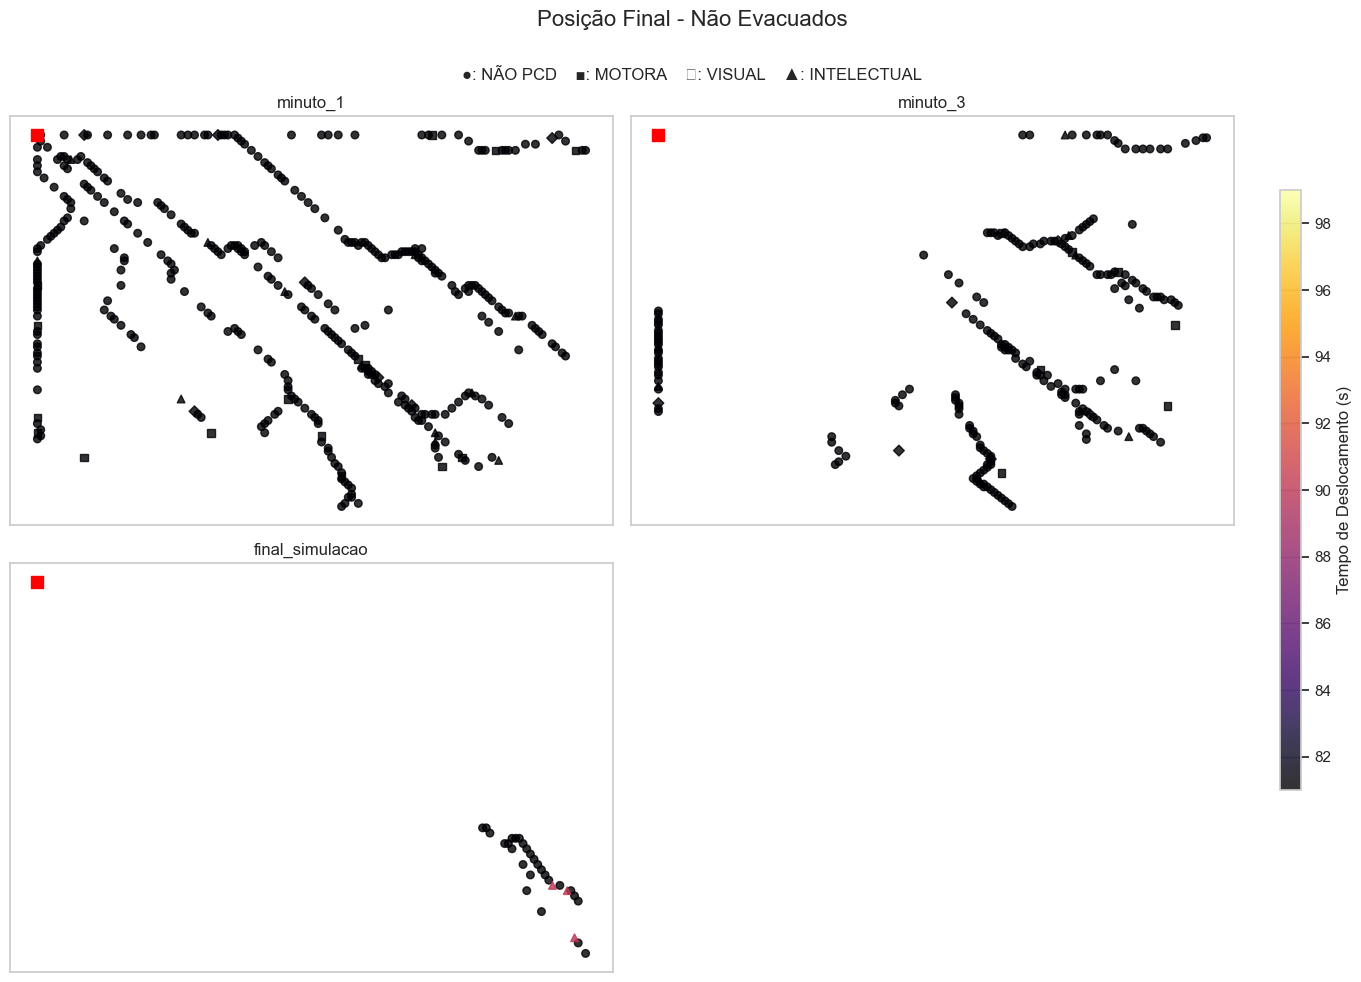

In [275]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Final - Não Evacuados", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ◆: VISUAL    ▲: INTELECTUAL", ha='center', fontsize=12)
axes = axes.flatten()

for i, (folder, file) in enumerate(zip(report_folders, csv_files)):
    df = pd.read_csv(file)
    df = df[df["evacuated"] != True].copy()
    ax = axes[i]

    if df.empty:
        ax.text(0.5, 0.5, "Nenhum agente não evacuado", ha='center', va='center')
        ax.set_title(folder)
        ax.set_xticks([]); ax.set_yticks([])
        continue

    df[['x', 'y']] = df['final_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['time_spent'], cmap='inferno', s=30, alpha=0.8, marker=marker)

    ax.scatter(0, 179, color='red', s=80, marker='s', label='Safe Zone')
    ax.set_title(folder)
    ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Tempo de Deslocamento (s)")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

In [260]:
summary_time_related = df_one_risk_area_all_done.groupby('mobility_type').agg({
    'time_s':       'mean',
    'distance_m':   'mean',
    'steps':        'mean',
    'velocity_m_s': 'mean',
    'agent_id':     'count'
}).rename(columns={'agent_id':'count_agents'})

In [261]:
summary_time_related

time_s  distance_m      steps  velocity_m_s  count_agents
mobility_type                                                               
INTELLECTUAL   205.761938   81.940670  74.545646      0.516451          1424
MOTOR          212.392210   80.024600  72.550000      0.483597          1380
NON_PWD        205.185127   83.470763  75.758145      0.534833         43828
VISUAL         218.345212   83.352402  75.831871      0.478382          1368

In [262]:
total_agents = len(df_one_risk_area_all_done)
evacuated_count = df_one_risk_area_all_done['evacuated'].sum()
not_evacuated_count = total_agents - evacuated_count
impacted_count = df_one_risk_area_all_done['impacted_by_landslide'].sum()
not_impacted_count = total_agents - impacted_count

In [263]:
summary_evacuation = pd.DataFrame({
    'metric': [
        'total_agents',
        'evacuated',
        'not_evacuated',
        'impacted_by_landslide',
        'not_impacted_by_landslide'
    ],
    'count': [
        total_agents,
        evacuated_count,
        not_evacuated_count,
        impacted_count,
        not_impacted_count
    ]
})

In [264]:
summary_evacuation

metric  count
0               total_agents  48000
1                  evacuated  29151
2              not_evacuated  18849
3      impacted_by_landslide   6312
4  not_impacted_by_landslide  41688

## All risk areas

In [269]:
df_all_risk_areas_all_done = load_report_data("final_simulacao", step_length, time_per_step)

In [281]:
report_folders = ["minuto_1", "minuto_3", "final_simulacao"]

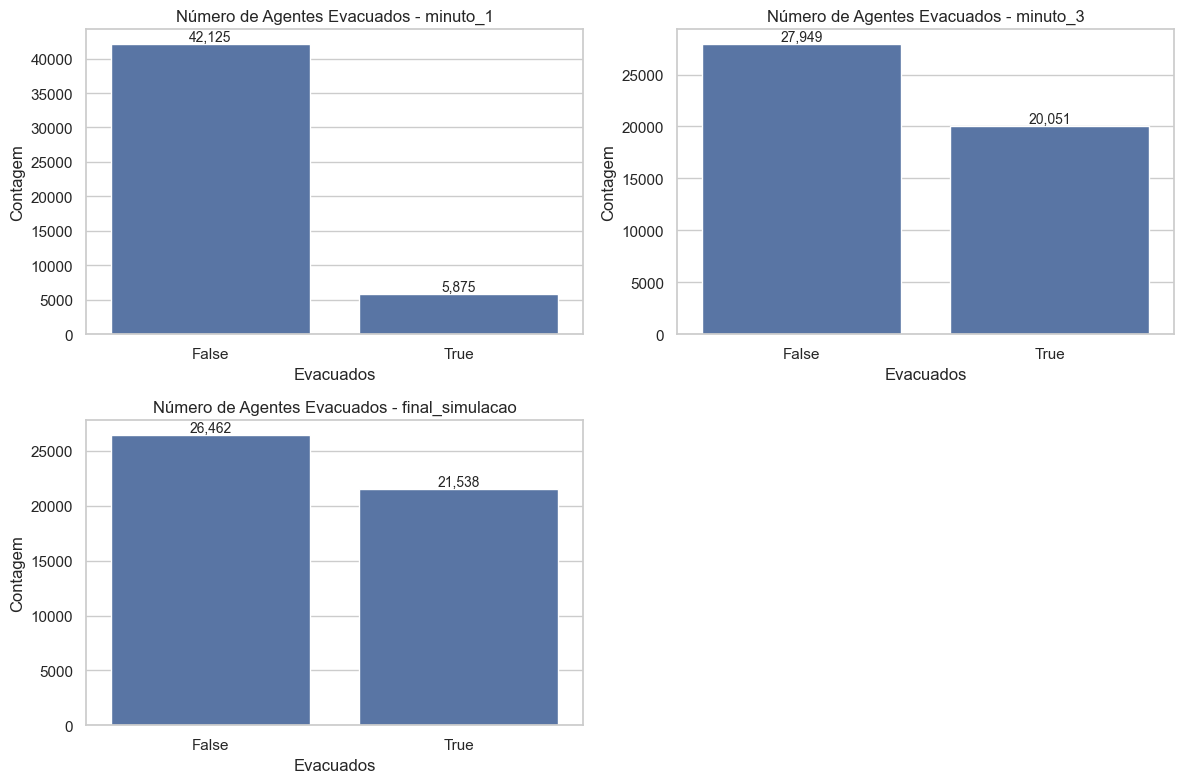

In [282]:
# Create enough axes — always a 2x2 grid, then hide extras
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    sns.countplot(data=df, x='evacuated', order=[False, True], ax=ax)

    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f"{count:,}", 
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10)

    ax.set(title=f"Número de Agentes Evacuados - {folder}", xlabel="Evacuados", ylabel="Contagem")

# Hide any unused subplot axes
for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_evacuated_count_LINEAR.png")
plt.show()
plt.close(fig)


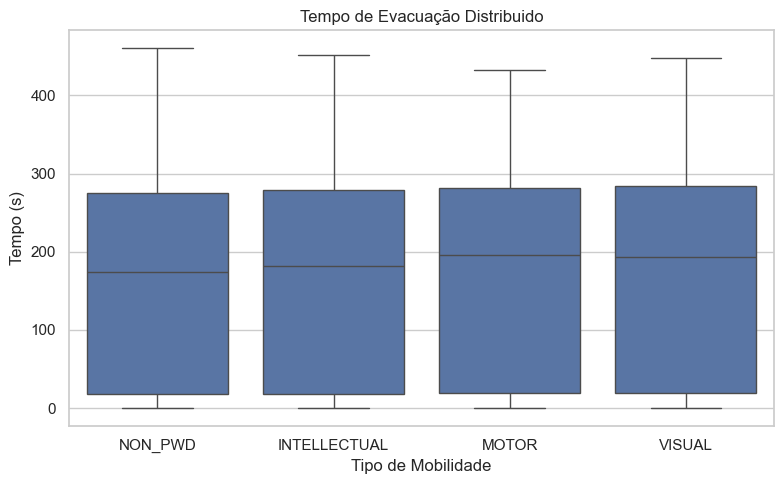

In [283]:
# 2) Evacuation Time Distribution (boxplot) **
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_one_risk_area_all_done, x='mobility_type', y='time_s', ax=ax)
ax.set(title="Tempo de Evacuação Distribuido", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "boxplot_time.png")
plt.close(fig)

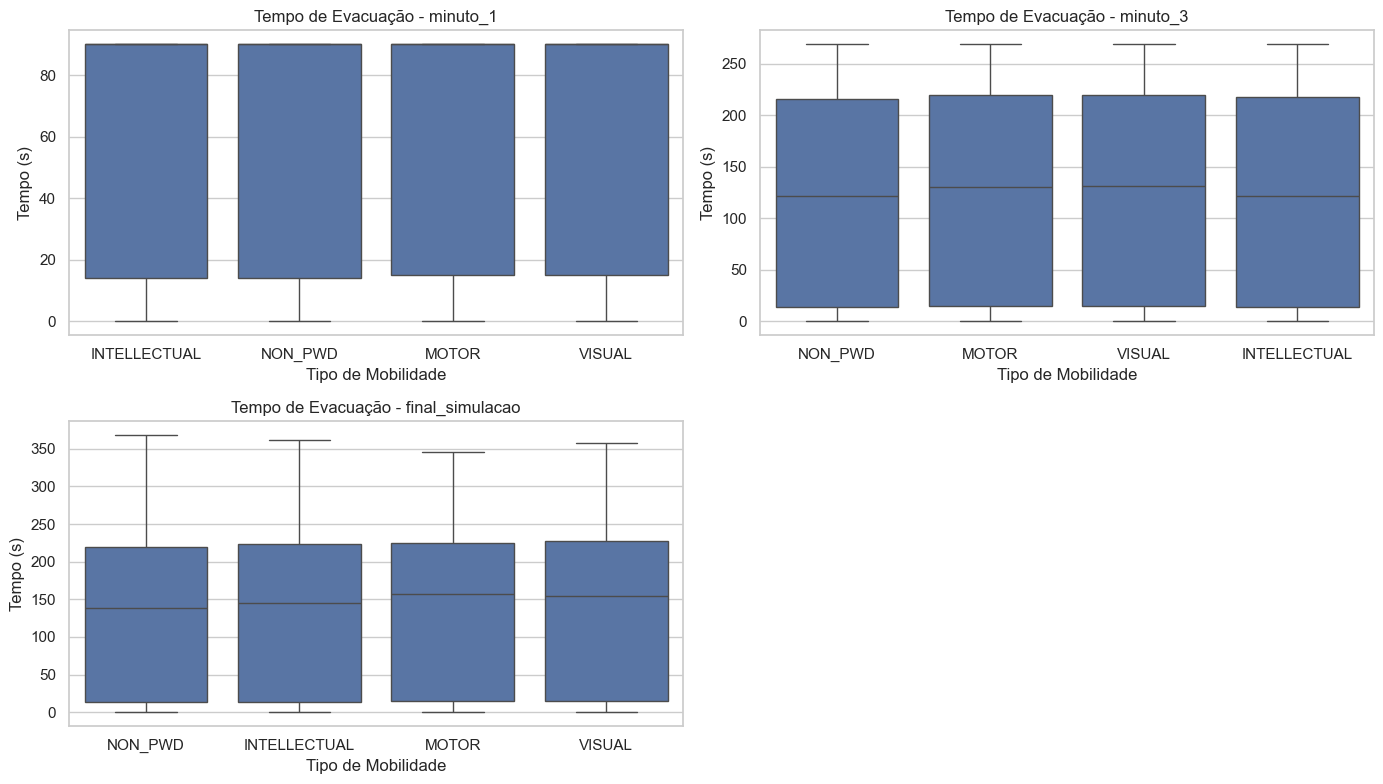

In [284]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'mobility_type' in df.columns and 'time_s' in df.columns and not df.empty:
        sns.boxplot(data=df, x='mobility_type', y='time_s', ax=ax)
        ax.set(title=f"Tempo de Evacuação - {folder}", xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set(title=f"Tempo de Evacuação - {folder}")

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_boxplot_time.png")
plt.show()
plt.close(fig)


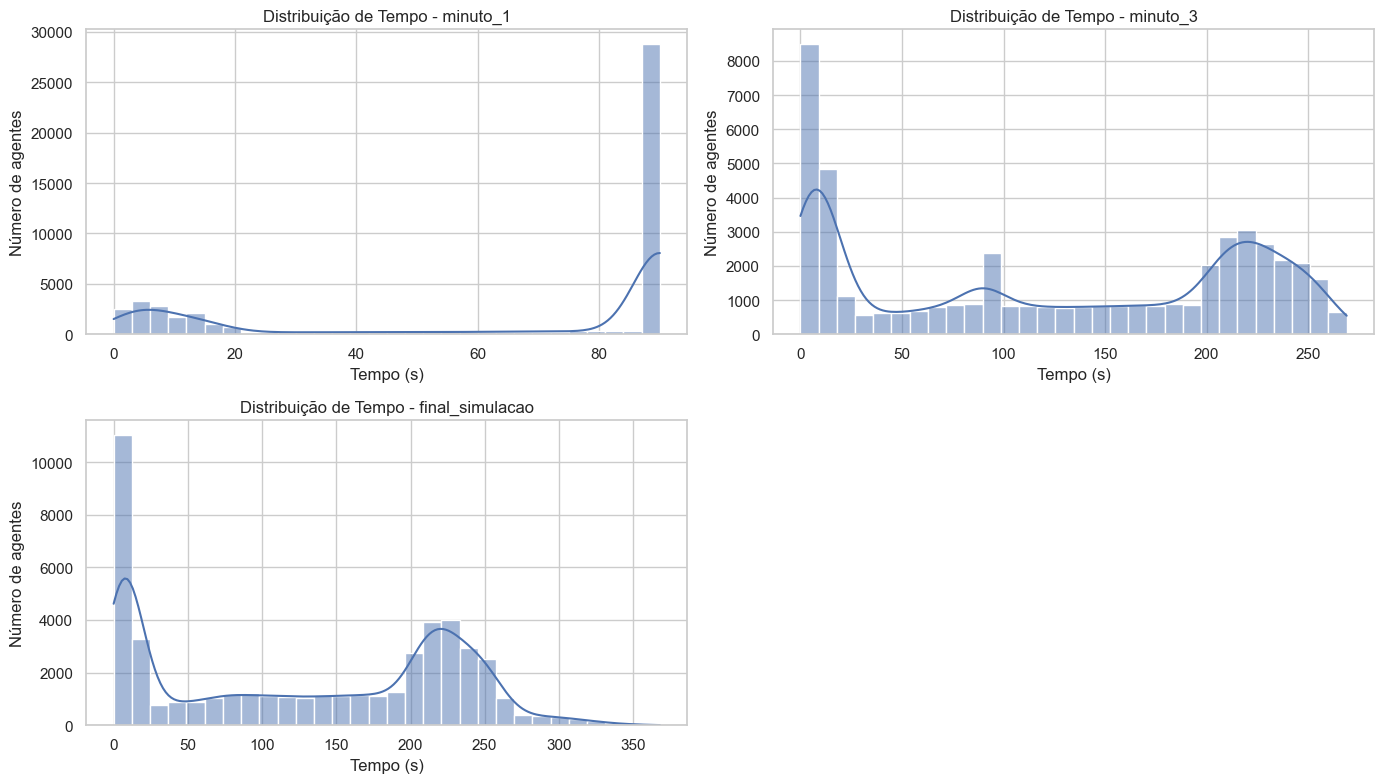

In [285]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'time_s' in df.columns and not df['time_s'].dropna().empty:
        sns.histplot(data=df, x='time_s', bins=30, kde=True, ax=ax)
        ax.set(title=f"Distribuição de Tempo - {folder}", xlabel="Tempo (s)", ylabel="Número de agentes")
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set(title=f"Distribuição de Tempo - {folder}")

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_hist_time.png")
plt.show()
plt.close(fig)

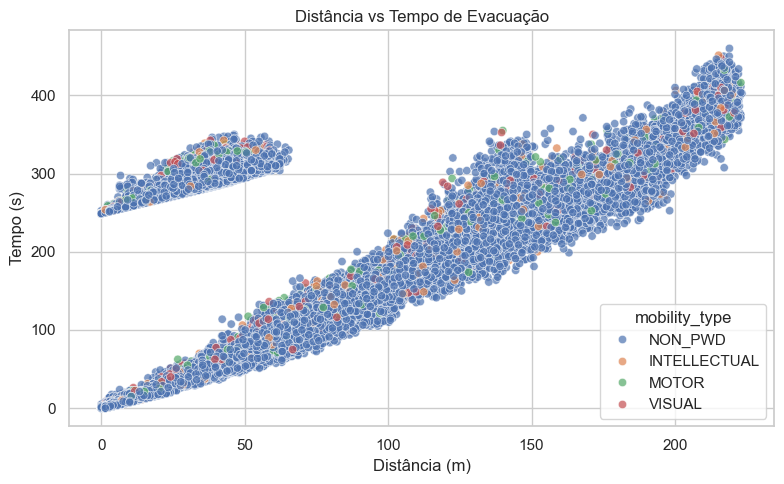

In [286]:
# 5) Distance vs. Time (scatter)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_one_risk_area_all_done, x='distance_m', y='time_s', hue='mobility_type', alpha=0.7, ax=ax)
ax.set(title="Distância vs Tempo de Evacuação", xlabel="Distância (m)", ylabel="Tempo (s)")
fig.tight_layout()
plt.show()
fig.savefig(download_dir / "scatter_dist_vs_time.png")
plt.close(fig)

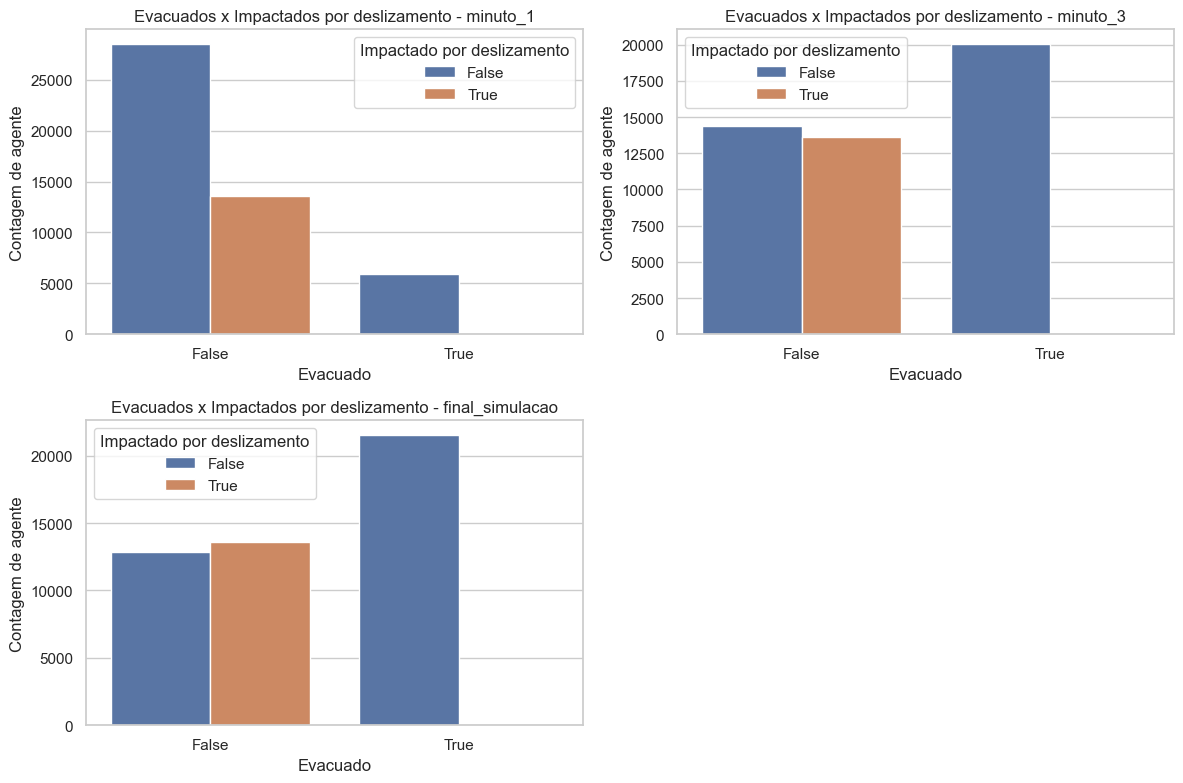

In [287]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'evacuated' in df.columns and 'impacted_by_landslide' in df.columns:
        sns.countplot(data=df, x='evacuated', hue='impacted_by_landslide', ax=ax)
        ax.set(title=f"Evacuados x Impactados por deslizamento - {folder}",
               xlabel="Evacuado", ylabel="Contagem de agente")
        ax.legend(title="Impactado por deslizamento")
    else:
        ax.text(0.5, 0.5, "No data", ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_evacuated_by_landslide_hue.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3987145929.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


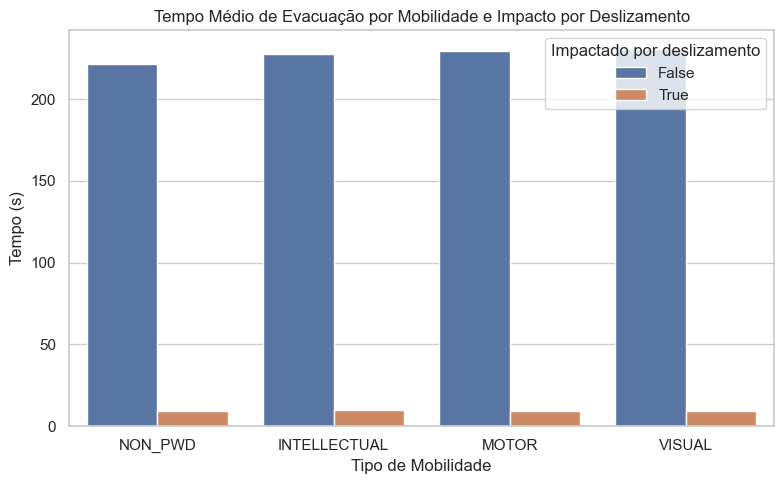

In [288]:
# 7) Average Evacuation Time by Mobility & Landslide Impact
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    data=df_one_risk_area_all_done, x='mobility_type', y='time_s',
    hue='impacted_by_landslide', ci=None, ax=ax
)
ax.set(title="Tempo Médio de Evacuação por Mobilidade e Impacto por Deslizamento",
       xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
ax.legend(title="Impactado por deslizamento")
fig.tight_layout()
fig.savefig(download_dir / "avg_time_by_landslide.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1967549854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1967549854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/1967549854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


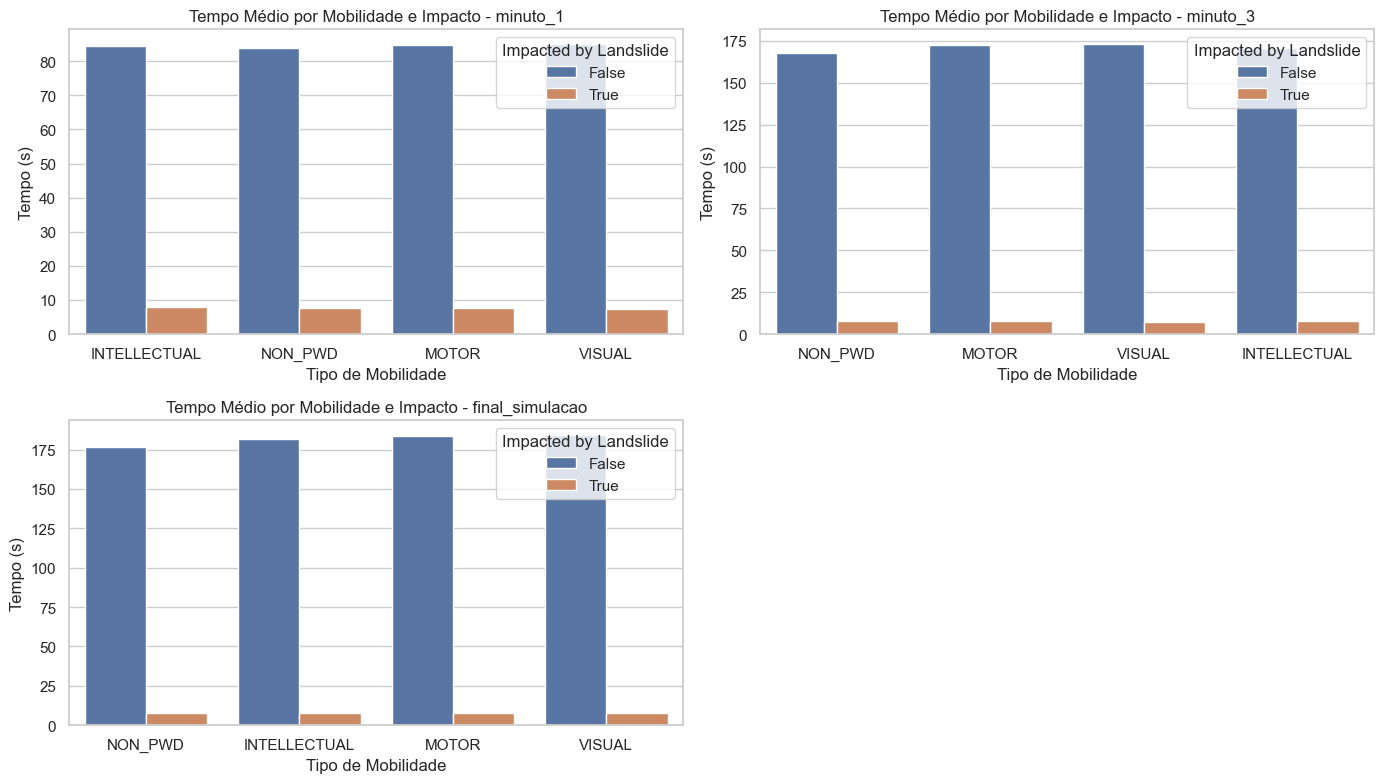

In [289]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, folder in enumerate(report_folders):
    df = report_dfs[folder]
    ax = axes[i]

    if 'mobility_type' in df.columns and 'time_s' in df.columns and 'impacted_by_landslide' in df.columns:
        sns.barplot(
            data=df, x='mobility_type', y='time_s',
            hue='impacted_by_landslide', ci=None, ax=ax
        )
        ax.set(title=f"Tempo Médio por Mobilidade e Impacto - {folder}",
               xlabel="Tipo de Mobilidade", ylabel="Tempo (s)")
        ax.legend(title="Impacted by Landslide")
    else:
        ax.text(0.5, 0.5, "No data", ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
fig.savefig(download_dir / "grid_avg_time_by_landslide.png")
plt.show()
plt.close(fig)

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/4247258491.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


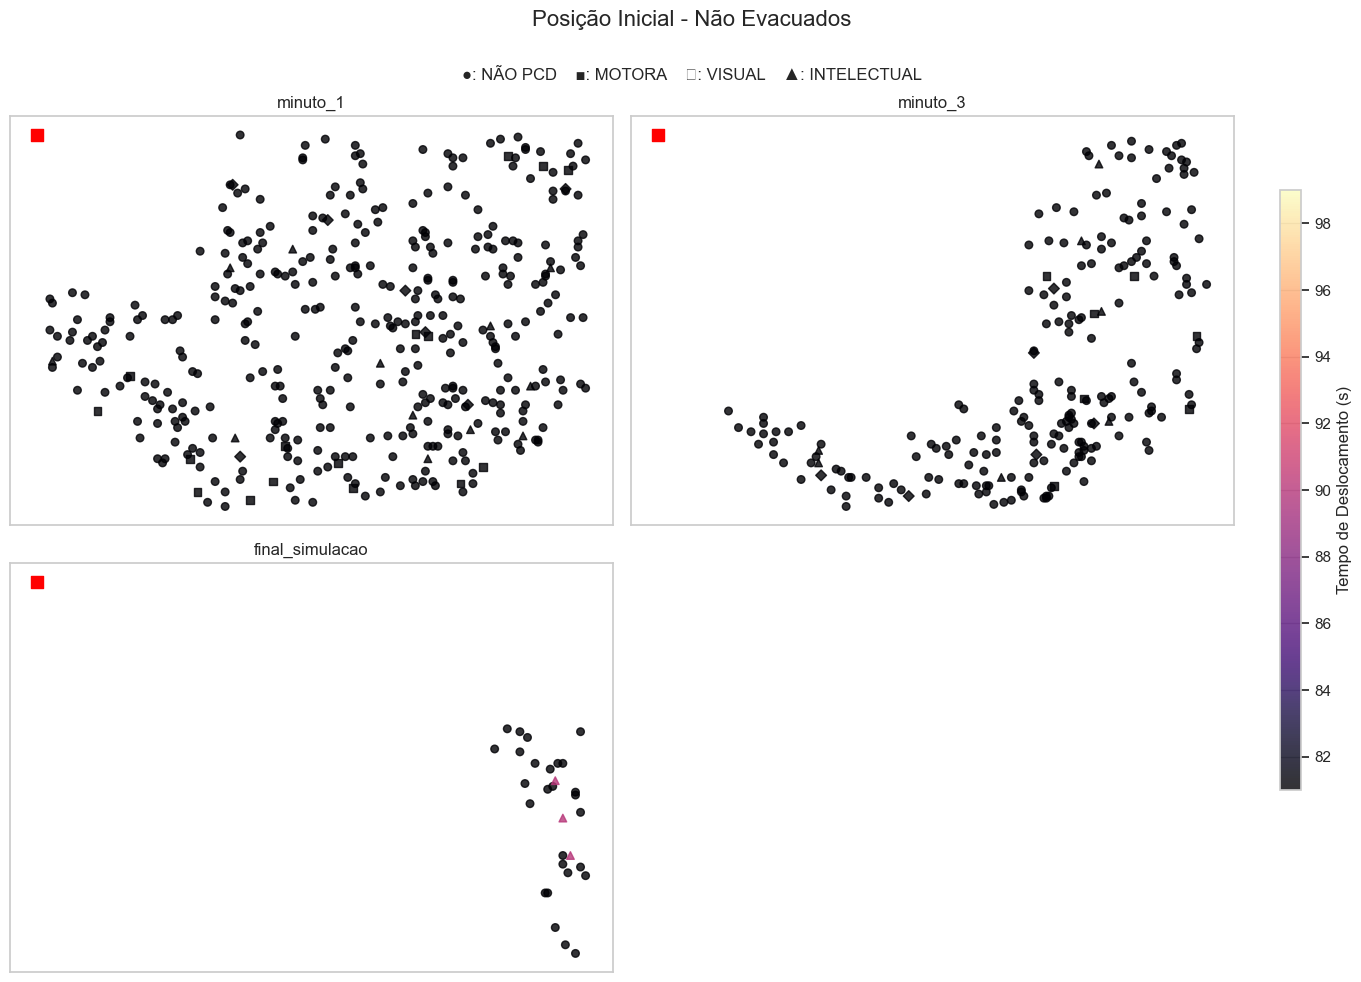

In [290]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Inicial - Não Evacuados", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ◆: VISUAL    ▲: INTELECTUAL", ha='center', fontsize=12)
axes = axes.flatten()

for i, (folder, file) in enumerate(zip(report_folders, csv_files)):
    df = pd.read_csv(file)
    df = df[df["evacuated"] != True].copy()
    ax = axes[i]

    if df.empty:
        ax.text(0.5, 0.5, "Nenhum agente não evacuado", ha='center', va='center')
        ax.set_title(folder)
        ax.set_xticks([]); ax.set_yticks([])
        continue

    df[['x', 'y']] = df['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['time_spent'], cmap='magma', s=30, alpha=0.8, marker=marker)

    ax.scatter(0, 179, color='red', s=80, marker='s', label='Safe Zone')
    ax.set_title(folder)
    ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Tempo de Deslocamento (s)")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/3057635549.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


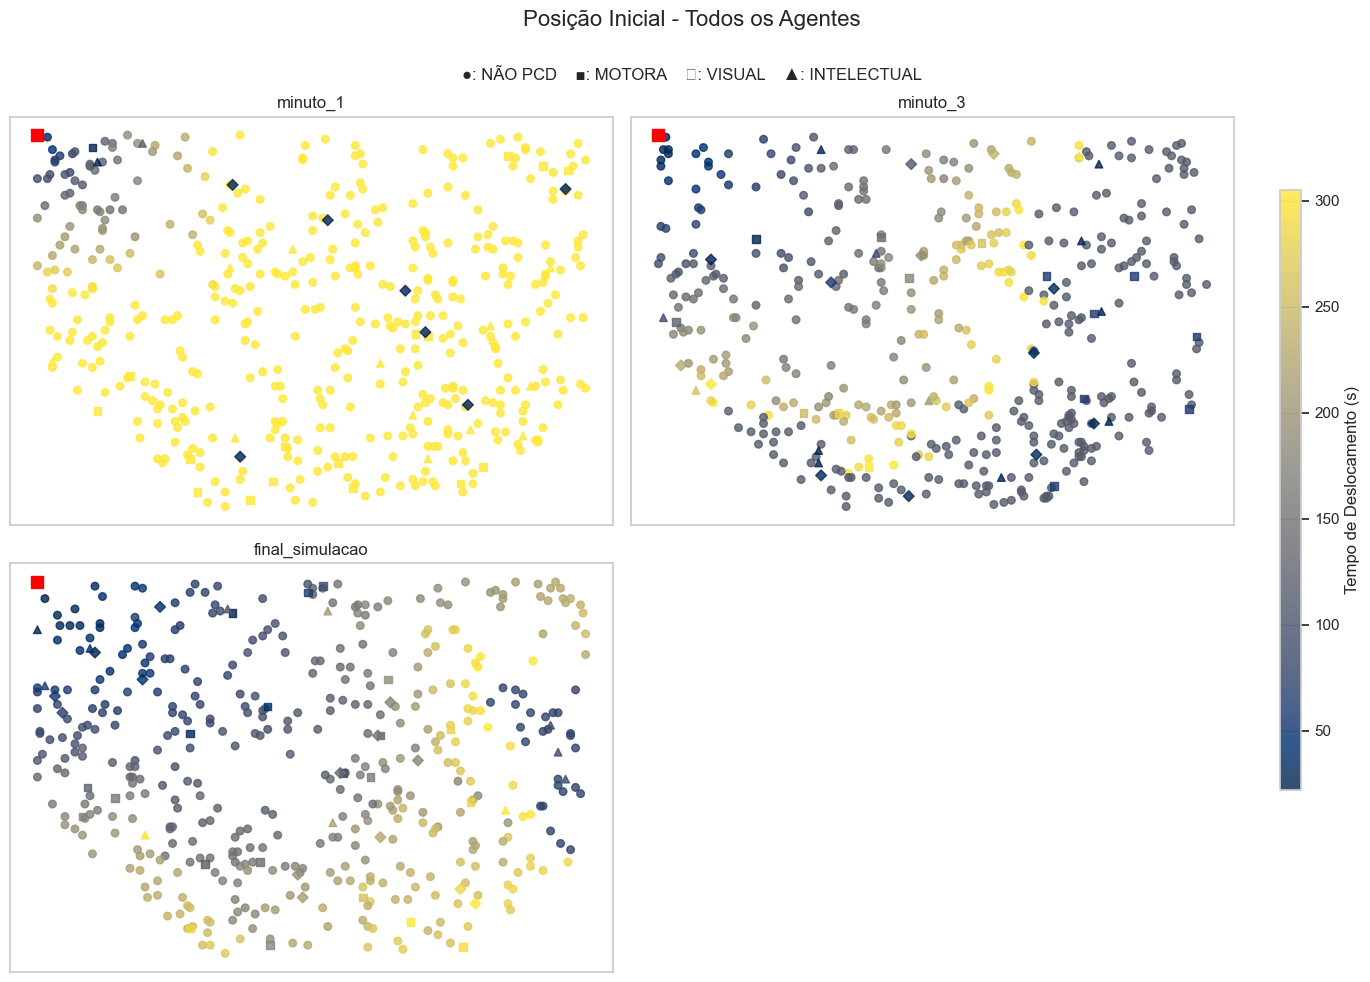

In [291]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Inicial - Todos os Agentes", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ◆: VISUAL    ▲: INTELECTUAL", ha='center', fontsize=12)
axes = axes.flatten()

for i, (folder, file) in enumerate(zip(report_folders, csv_files)):
    df = pd.read_csv(file)
    ax = axes[i]

    if "start_pos" not in df.columns or "time_spent" not in df.columns:
        ax.text(0.5, 0.5, "Dados ausentes", ha='center', va='center')
        ax.set_title(folder)
        ax.set_xticks([]); ax.set_yticks([])
        continue

    df[['x', 'y']] = df['start_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['time_spent'], cmap='cividis', s=30, alpha=0.8, marker=marker)

    ax.scatter(0, 179, color='red', s=80, marker='s', label='Safe Zone')
    ax.set_title(folder)
    ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Tempo de Deslocamento (s)")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

/var/folders/r1/vzkzbrkx1h107mdm0z331hh80000gn/T/ipykernel_63409/408415662.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])
/Users/giovanafaria/projects/tcc/.venv_tcc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


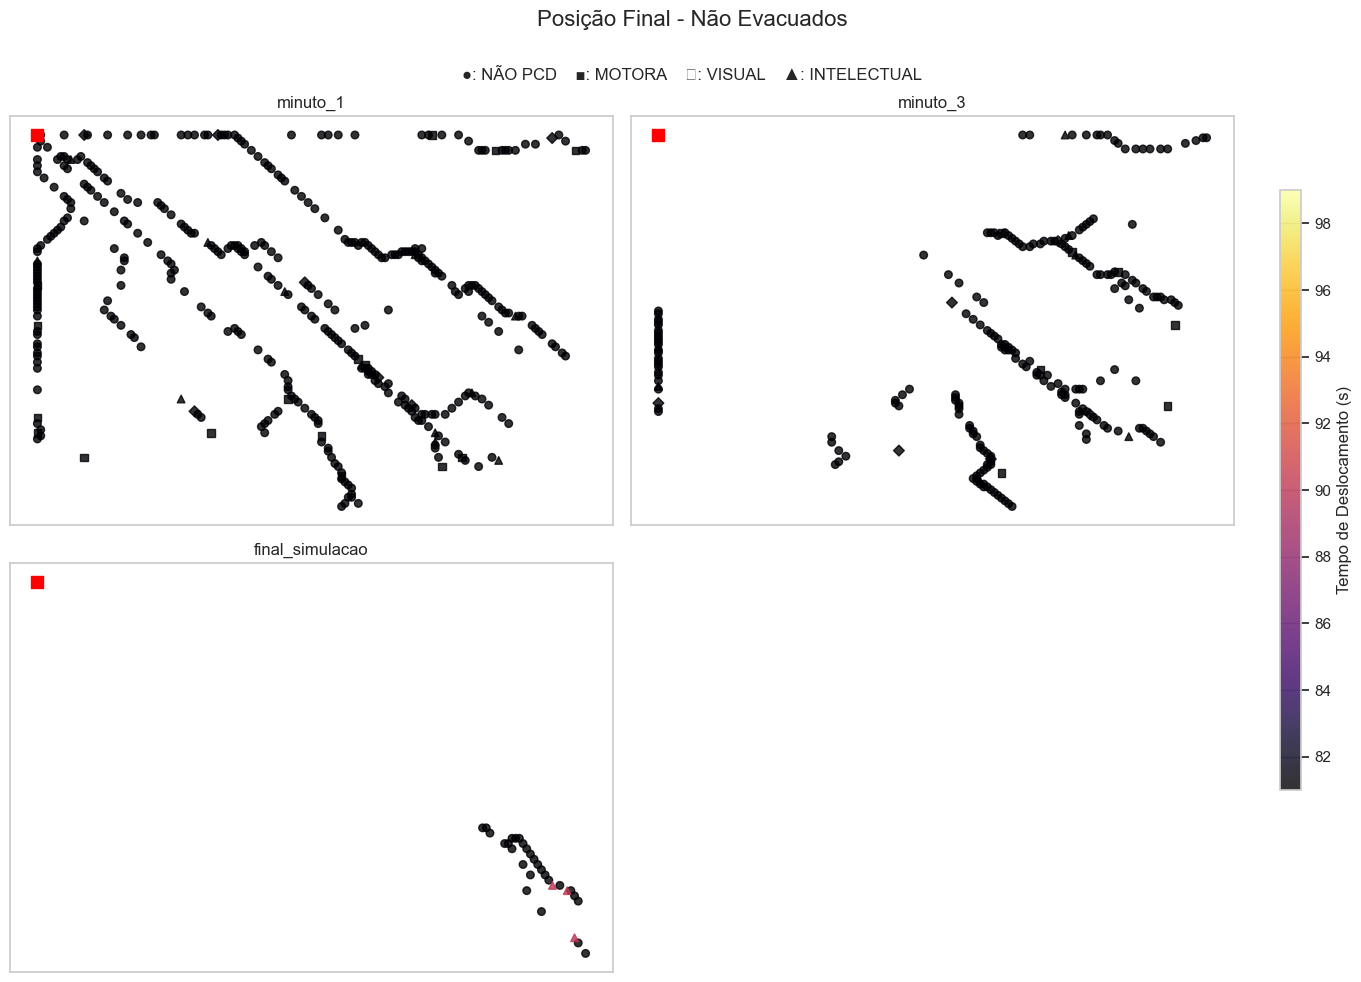

In [292]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Posição Final - Não Evacuados", fontsize=16)
fig.text(0.5, 0.91, "●: NÃO PCD    ■: MOTORA    ◆: VISUAL    ▲: INTELECTUAL", ha='center', fontsize=12)
axes = axes.flatten()

for i, (folder, file) in enumerate(zip(report_folders, csv_files)):
    df = pd.read_csv(file)
    df = df[df["evacuated"] != True].copy()
    ax = axes[i]

    if df.empty:
        ax.text(0.5, 0.5, "Nenhum agente não evacuado", ha='center', va='center')
        ax.set_title(folder)
        ax.set_xticks([]); ax.set_yticks([])
        continue

    df[['x', 'y']] = df['final_pos'].str.strip("()").str.split(",", expand=True).astype(float)
    for mob, marker in mobility_markers.items():
        sub = df[df["mobility_type"] == mob]
        if not sub.empty:
            sc = ax.scatter(sub['x'], sub['y'], c=sub['time_spent'], cmap='inferno', s=30, alpha=0.8, marker=marker)

    ax.scatter(0, 179, color='red', s=80, marker='s', label='Safe Zone')
    ax.set_title(folder)
    ax.set_xticks([]); ax.set_yticks([])

for j in range(len(report_folders), len(axes)):
    axes[j].set_visible(False)

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Tempo de Deslocamento (s)")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

In [293]:
summary_time_related = df_all_risk_areas_all_done.groupby('mobility_type').agg({
    'time_s':       'mean',
    'distance_m':   'mean',
    'steps':        'mean',
    'velocity_m_s': 'mean',
    'agent_id':     'count'
}).rename(columns={'agent_id':'count_agents'})

In [294]:
summary_time_related

time_s  distance_m      steps  velocity_m_s  count_agents
mobility_type                                                               
INTELLECTUAL   165.267155   58.933835  54.522516      0.558131          1399
MOTOR          169.855480   58.776294  54.183934      0.538824          1332
NON_PWD        161.041923   59.928385  55.306011      0.613627         43884
VISUAL         169.749097   58.567032  54.147292      0.539739          1385

In [295]:
total_agents = len(df_all_risk_areas_all_done)
evacuated_count = df_all_risk_areas_all_done['evacuated'].sum()
not_evacuated_count = total_agents - evacuated_count
impacted_count = df_all_risk_areas_all_done['impacted_by_landslide'].sum()
not_impacted_count = total_agents - impacted_count

In [296]:
summary_evacuation = pd.DataFrame({
    'metric': [
        'total_agents',
        'evacuated',
        'not_evacuated',
        'impacted_by_landslide',
        'not_impacted_by_landslide'
    ],
    'count': [
        total_agents,
        evacuated_count,
        not_evacuated_count,
        impacted_count,
        not_impacted_count
    ]
})

In [297]:
summary_evacuation

metric  count
0               total_agents  48000
1                  evacuated  21538
2              not_evacuated  26462
3      impacted_by_landslide  13600
4  not_impacted_by_landslide  34400

# Visual of the elevation

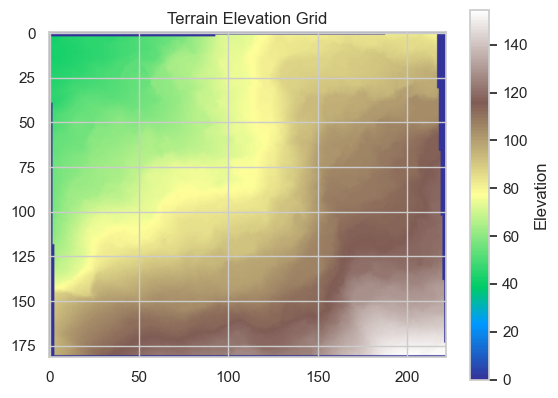

In [58]:
import numpy as np
import matplotlib.pyplot as plt

elev = np.load("data/processed/elevation.npy")
plt.imshow(elev, cmap="terrain")
plt.colorbar(label="Elevation")
plt.title("Terrain Elevation Grid")
plt.show()